* https://www.clarifai.com/developer/guide/
* https://github.com/Clarifai/clarifai-python

`pip install clarifai --upgrade`
Version 2.4.0

In [1]:
from clarifai.rest import ClarifaiApp, ApiError
#from clarifai.rest import ApiError
import requests as rq
import os
import io
import base64
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']


def encode_image(image):
    """base64 encode an image stream."""
    base64_img = base64.b64encode(image)
    return base64_img

3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
encode_image(b'test')

b'dGVzdA=='

## API key
https://clarifai-python.readthedocs.io/en/latest/install/#configuration

api_key can be passed to the constructor (https://clarifai-python.readthedocs.io/en/latest/clarifai.rest/#clarifai.rest.client.ClarifaiApp). First validate the key.

In [3]:
API_key_filepath = 'Clarifai_API_key.json'
bad_API_key = load_api_secrets(API_key_filepath)
bad_API_key

'123456'

In [4]:
CLASSIFIER = 'clarifai'

def validate_api_key(api_key):
    """Check that an API key is valid, if yes return the app."""
    try:
        from clarifai.rest import ClarifaiApp, ApiError
        app = ClarifaiApp(api_key=api_key)
        return app
    except ApiError as exc:
        error = json.loads(exc.response.content)
        print(
            "%s error: %s", CLASSIFIER, error['status']['description'])
        return None

In [5]:
error = validate_api_key(bad_API_key)
error

%s error: %s clarifai API key not found


To load my private key from desktop

In [6]:
API_key_filepath = '/Users/robincole/Desktop/Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
#API_key

In [7]:
app = ClarifaiApp(api_key=API_key)  # the constructor with valid api_key
#app = ClarifaiApp()  # the constructor with api_key as an environment variable

In [8]:
# List all models
for model in app.models.get_all():
    print(model.model_name)

the/model
我的新模型
pets
Portrait Quality
Landscape Quality
Textures & Patterns
moderation
logo
focus
demographics
apparel
celeb-v1.3
face-v1.3
face-v1.3
weddings-v1.0
travel-v1.0
nsfw-v1.0
food-items-v1.0
general-v1.3
color
general-v1.3


In [9]:
general_model = app.models.get('general-v1.3')

In [10]:
file_name = 'dog.jpg'

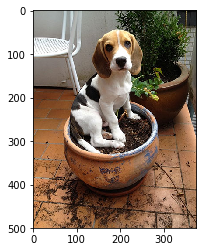

In [11]:
img = plt.imread(file_name)  # Creates an ndarray
plt.imshow(img)
plt.show()

Predict by base 64 encoded image

In [12]:
with open(file_name, "rb") as image_file:
    #encoded_string = base64.b64encode(image_file.read())
    encoded_string = encode_image(image_file.read())

In [13]:
def parse_concepts(api_concepts):
    """Parse the API concepts data."""
    return {concept['name']: round(100.0*concept['value'], 2) 
            for concept in api_concepts}

In [18]:
%%time
response = general_model.predict_by_base64(encoded_string)

ApiError: b'POST https://api.clarifai.com/v2//v2/https://api.clarifai.com/v2/models/aaa03c23b3724a16a56b629203edc62c/outputs FAILED(1539750397.235671). status_code: N/A, reason: N/A, error_code: N/A, error_description: N/A, error_details: N/A\n >> Python client 2.4.0 with Python 3.6.5 on darwin\n >> POST https://api.clarifai.com/v2//v2/https://api.clarifai.com/v2/models/aaa03c23b3724a16a56b629203edc62c/outputs\n >> REQUEST(1539750397.235671) {\n  "model_id": "aaa03c23b3724a16a56b629203edc62c",\n  "inputs": [\n    {\n      "data": {\n        "image": {\n          "base64": "/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAA8AAD/4QMxaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjYtYzEzOCA3OS4xNTk4MjQsIDIwMTYvMDkvMTQtMDE6MDk6MDEgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCBDQyAyMDE3IChNYWNpbnRvc2gpIiB4bXBNTTpJbnN0YW5jZUlEPSJ4bXAuaWlkOjJEM0Q1RkNFRjkyNTExRTc4QzFFQjg3RTRFREVCMTU1IiB4bXBNTTpEb2N1bWVudElEPSJ4bXAuZGlkOjJEM0Q1RkNGRjkyNTExRTc4QzFFQjg3RTRFREVCMTU1Ij4gPHhtcE1NOkRlcml2ZWRGcm9tIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6QTg4QzVFRkZGOTI0MTFFNzhDMUVCODdFNEVERUIxNTUiIHN0UmVmOmRvY3VtZW50SUQ9InhtcC5kaWQ6QTg4QzVGMDBGOTI0MTFFNzhDMUVCODdFNEVERUIxNTUiLz4gPC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+IDw/eHBhY2tldCBlbmQ9InIiPz7/7gAOQWRvYmUAZMAAAAAB/9sAhAAGBAQEBQQGBQUGCQYFBgkLCAYGCAsMCgoLCgoMEAwMDAwMDBAMDg8QDw4MExMUFBMTHBsbGxwfHx8fHx8fHx8fAQcHBw0MDRgQEBgaFREVGh8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx//wAARCAH0AXcDAREAAhEBAxEB/8QAqQAAAQUBAQEBAAAAAAAAAAAABQIDBAYHAQAICQEAAwEBAQEAAAAAAAAAAAAAAQIDAAQFBhAAAgECBAQDBQYEBAQEBQMFAQIDEQQAIRIFMUETBlFhInGBMhQHkaFCUiMVscFiM9FyJAjw4YIWkqJDNPGyU2MlwtKDNZNUF0URAAICAgICAgICAgIDAQEBAAABEQIhAzESQQRRE2EicRQyUoFCkSMFocFy/9oADAMBAAIRAxEAPwC21bVxPPnhQSKVm8TljAkUGbhX78Y0nQzePvxjHdR8SffggOgnxOMY8zGnH78aDDDl/E0xjCbYM1zEtfxjn54KWQMN9ymlugqRUgYawqIXbhb5/icxjVCwn3WG6lnQ8n/ljMFSLDVYifAYmVY9ExFs+Z+A/wAMMSK+GbSM/fhR0cYvp4nhgGG6vQCvLlUYwRtmYVzPnjBQkM1OJFRnnjGOA0IJJB05n2Z4xhBciVQGrxLVOYB/ljGHi5BqWr4CtMYwnXJ40AwTELcTbNAevMYXSjRyoSZUY5BlAqxHjlTC2FZStseFu6N73DfHiu9uvY4I4ZAjT2pZKFtekOsekL+KnHEq8mqFe2JLOws7mxt7kXNpHOZrBoqyaracakoUrXSysp9mKVUBbA/1Av4L/YHtYkuFuFngeJ5LeZEqZNBAYgAltdKA1xrZQIKdcm/2namszfCS5u5BdJt8JaWNVDlXa4Ugn1aRozFKcMSeEKyd27tT7ttOmO6axv4nISaOUS6wKkyNESrxAcPSc8GrQapFOv5dw2zeZwZXS7glLdWNvTJRqiVKE5P8WWWC0Foj31zcT3FxeyFY7gsJZoWLIxZznoT7yPDBRlJ03kyxgWdxKHU6+k1Sddaagc6ih4HCozY5F13cM88kDSqQ+o+ljWra6cB4CnHATA2SobGCeXQ+5JAWygDlmUtXINT4QeFThGxHYMW0Pcjpc2lsysIYlee2QhWmq2YRiKt029RAOJ8i9iwbLNBZx/JX1xNHuFxGdCPGRDq06wiSEMjEjxODWigySH5t5k3S9srGzSZXKo1zcRpqgo6jVGSeC6cjgy7YQXLJm+S2FlZrrgZY49ZVLeq6anUB4BS/EcsT2V6vA7cLIjZA7WdwrEq8+lYCppUmtM/HFNbZqNsr89ncSXys8fTT1/qg1ZnCNpVSeCoKFqHPPD2cBs4Lnt9oLPt2MTOWZIVkZh6CxUVP/mw1V+pkZv3ze7ge6LqPQD0Vhi1Fmr6YUJyHmxx0V4HAPzm5V4Rj3sf54ZmCvbNzfHcp2lAZI7C9f9OoIK27aWzPAE545va/xX8orp5K7FNuSqCpC+kZZnl7cdPkmSYX3J0DGeleQHKuCYdjG4FjW5b4W4ADgDgAPqrV6j7TgAFVzHjgwY6Dy8MCDCq55Yxjqn7MEAsGuMYS5pjAGnORHPGCObbHr3CAf1Vwa8gfAU7oyWFT41+wYawlSH25T9w86cT7cCozDPdCgtZ+NW/ljWBRA9vTAfPLCIox6tLOQ/0N/A4YmV7gvhllhRxJIOY9mAYQfLiOGMwiCK58q4ARuppny/ngmPagOP8AzwDDfUpPpqKgcKZcMs+eMEWaajSlW+LzypjAOahw5UyP8sEwL3nZIdyCurmK6j/szUoV8tSgSD3NhbVkEFY3KaVrLdbBGtxdXdtJBLudmz0Z9NAtz6UTqGlFYHM5HjiTbQANtsN8vZW09w7bosr/AG2B+pbg9NLyzikI0PX4mNCwPPh4YdLEmQP7o7w2TebJzHBuO17sEjmspGDCCcowkCMK6CtfUjlcsF8BKyRfyT3F1eszLeAz3Vyq0LyMaKdSgL8XECgPtxJw+ScSN7dAt8J11RwpCD1ypkRFTh+pMTRQ59IFczhVWMoENDV9I0tpbq0yyE+qGNVqYY9OS6R6Ublp5YZNp5CgdbLLepMJXjhkXVItxOWHUKiph1n06mAJWvHhi2ChyISSKDGKK1CRWlA3OuJsEBnty222be4LC4caZupFFIueh2FFeh4muYwsC7CDc2b20s0EjArC7RO9KajESjMtc9NRgGSLZ27E13YP+4O1vDDEOpcxqXuJoWoaJpqVBjpqYZlffhHyIoD431dtsUfa3DbVKXt44J4lkjnfT/6bt+XjwwrxwLCklbHboNsKWNwslvAzB3aMhSwFWGsNWvLhlg1nkpVsEHcJN2vTFMXhUMjMpC/pxZalp+I154nezYjechPo3kdxEgkVYVeuksSi6vUM6eBoMNrcqCy4GO4ZLY7dElhC6SSuxhlcMOmsr6SuluCswrUZcRzxTZbBiT2pLvyQXEO85xm4eOAOQxRMhp1ClRz9mGrZRCAoKxuNpHuHdN7cXCFre8uLj5cIaO3SYKpB4UbTSuK22pKEa14K9cRRRzFUmSenxNHXSDU1UE01afEZYtXKGTwEO39Kz376mUrt15pZfFo9NG8jWhxze1wl+S2oDMiqmQppGOpkhyFaRIPIf44xhyP4ifJv4HGNJ9P6vUfacKYXqzxjHQcq88YwoEHGAKXyxjCtWCCBLuMYw05xjEzYEDbpGPAE4NQWJvdjDqQrzz/hg2FqQ+2z/wDkc/DlnjVDYMdyPqv7eP8AJFU+12/5Y1g0IE2SIPE4VBsOSmljP/kao9vngsUr5Jpkc+GEHEkgjy8RjGEt5V9nvwAjbCuZ4AEV5fZjBEM2ekZn8uXLGMJOXqIocywNPZWuMYYeTTMhI4kZDIZf44Bh8mrAAccExwtmRwbnjAIl/dyW0XUjtpbpq06cRGqp9vLAb+AMz7vaXcLyS2u932ncYO3rMgSQWkypUk6jLIFDCq09Jpl7cJZt+AS2U3de05LreIbS03SHcXnWF9ugSQiX5ZzqVHL6YoXWPMgtmcMmjFy3y63mO23bY5bBtt2cQObd7pPmIAzoWEENwjIE1MP08iAxK8KYI0GaSSXMDzbVbbj1LDQjSuxYQyOi9XSANQ1B2IUePHAhQBoI29rLbxx7PvcL2VjLOLuG5ZTGXk0hQpOl1caTVa0oa554WRQhBtGyJZXsN6yWd9F1bm23ASLJbTJRdKFkLfDzQZgnLGgMIrQuUa0T5u4YxIWNvb11BNWbaF5VIwMgIfUMoOkBFLHJjSngK4MDvglxwss9vJZt1J4mULHErO5Iz1DSD8JyzzwBCVELxrpRO/y99DrlgE6tSRpGq8X6g9NSK51GeMCQ5sd/ML64nsbQmKWNzFYyMTpABGlpDpWqknSeOOe6yJeo5cT3Cz2y3KQttkcwYWreqONggOgrHVg2Zq1KVwtbIFUS983iW3RbO1LQwTXE5iHqBEekZFDT8UlK+WDGDMjbdfzRSy262Ye6KiUTs9XkjPpAWooaHjnxwnSMhmCxdu9WaK16xEikNSXjGUIJqpB4rXT7eWDo5Y9HI3vO7v8AM7hZzMVjsnSFTx1K3rFa8K0plhdrawK3kfnv9umvLONncW2lJ3GoKYvhILk0ycChwHbiAWKlebhJa3ZVRHdGKSVYpJULIFMhYaUB08+FcdWqndthVZBl7eT3ly1zcFTKwAOhFjUBRQAKgCimOxVjBWCfsJC/ujGTQf2y6ANKhtSgaT7cc3s/9f5K6/IGuAREw5kU+3LHWTHgKCg4DL7MAAtKV9zfwOMaD6Y1+o4QIsMPsxjCtRxjCg2eMYUrHhX7cEwrUOf2DGMJLAHGkEDbuaZ4xoC3aqatzJP4U4+04agtkK7tb/WRr4AnLBuLUjdt/wD9Ty4kcffjVGsE93fqbzN4RhIx/wBKg/zwLsNCJM9Z0TyJwEZjl2QNvnqctGMzAAnzphBhBYVFOJ58MYwl6Eioz5csYI22ZrxBHH34xhLFa04eVMYw07AkDw4nw92MYjXTAtG2qnTfW60BJCjP2YUJJ1hlNPhNOHmK4ZAG2060bjkVB4ccYx5yuoc88gOY54wIKR3R2jut+Lu+uL+W/lU/6Db4l6UaAmmk1ah9PxeOJ2pIrqUq77QkuXlKxia5ShcWaOtpEIwWZTNQJ1QOCrWnNsKlCBBW7G8tY7yeJbJ92E6iK0aWWdgla6n0REa6jMBvCueKqYGUkeJ7iGAZt0Oqa0eimVVzOjx0njThhWjWQ7Y21ndWk8s14sEwzgtG1MZc/UdR9C0HDOpwrELNYdlNfbesrtHCsojEipb1l9OauSHAoR6ieYxkx0gD3Ttc1hulylzHFQPpi+WTRE/pGapVtHiw8cOgRkhW1pM9uJppF6MSaYFdvRmTkeOkV8cK7ZHSlSTLK13BCb2CGRkFCxjK1Vyaa/SQR5HhhWTcDsu6XW528g3+6uJjAGNrGoQ6ZaUAIalF864DfwCCbtbXc8H7Xd3RhsYFWeDUQEjOrU3EirS1y4nLwwjtg1x2Uo4s0vKvbu+iWCEGIniahgATwxFYyS4FWJVhHYWkfzcvUUMsmlsgKtqdgaKKUH4RnjTIewU3Lb2G729wjwSMf07RUZmaNoxqdSIh0yAPfhbYrBurgL7NfWkt2XlLQKQY5Y5yECvkobLSFOldNaZ+3A1fq4NWzQz3bLaC7idrdZBdJBcGMAqXI6ikVHxfD94wbuWFgq8uYLy6LmrR3DnShFCFA0IoHuzH2Ym5FbGO5rq8jmbZEuJJIbbR81bmJYl6wA+EAszquriceh69FVSVooUgZ7WWITGSitEyq6kg/GKgrStRTnjo7KR5JuytSHeDrC//AI2ZaMK6gzoNI8+YxD2Oa/yW18P+ARcUZkX8zgffXHSSHK5cOOMYchzc0/I5PuUnGYD6Ur6mp44mMKDCmMY6GwTCww41J9uAYUH8OODIBRcUyONJhBfPPGkI27kjL78YxYuyl1XM78aAAYpQnci92P8A/kwPBP4nAuCiG+2DXdUUn8P8xjUGsTpG6t7PKc9cjEewGmBYNSKW1biw/JGK+9saoGP35pt02fIfxGCzFfagPDLkBwr7MTHG5MwRUV4E8TnzxjCXYjIfEa092MYSxyyoPPyxgiGbL7OOMYaL5kEeeBJiPKKt8NTzr54DRiSHJReRpkPZ4UwUAQxeoIrl76+PswQke+klSFhFE8zlW06QG0mnpLKxXVRuWFbFYJ2LedyvbmeC5hRJrOGDrtGdWu5k1FtNSQo0rw8ThaXkCZTt43/c+2txutj2nZhJe3sou47aMy3EAWUZHpUU6jQ1T4Bxzw6qYq820XfbBH7jdxxPutsxuNrt1JkEZlB0pIQ0SSIw9DfhPDBYRjbVsLTdrW33O2S725gf22G6YB9NwxeKR5FAXTr+LVlhWwsb31zLPKkljbW9zbsyXCWyPDWh4aGJWvgRxHLEXbOSM5G7ved6260t7S1uykQPzAeIUOqgFDJxYZ0I8qcMPQpwL3yakltf7ldNud/f2/XFuKpFbJIKR6qA6jWpCigGKBkTtm3XCr/rZFMdxFqIlJCqqIekGYfDr4DwxK2QK8qBG0brum33g+VZVtgFWWGVBNpJWrgaqE86Z4ayQjSHxJYSSySNA81xcypLFMsmkR1bToIOfHPE3wYnbld7OotZLNq3SylHlIPUVlIDGQHL481I/CSML1Mz2yz2N1LPe7nJJIxQT3jUMr0qasoWgXE7ptwTaZGhNzul1PPZoYrMuqmDUAUThqb4dfiwXBdVwHEEja5761kSzpGbjrk2hYiQLqylMfCqUGXnhLpNydVbJ1jyTrm5u47txLfWt7bSqzR28auzBkqOlMrKCrPwpmCKYayrh+Tnsp/kG207ST9GJ2+VWiBWOUXUIdo0BPw6uFMsLsrIsNBjaIjcblDFI5SFXcRkGjkZGQDnTIgHljm2ODWRJ7usrCPfIbrboek97G176pK0QnphdH4FouqtamuL/c3SDKz4IH7WDbyyLIPnY1jFtaAAqGkap4j4QueeDrfZ+YQ1U5PbZtN70d3SQoJZ7RkPUObEzRsSp8RSuL7dk3ovz/8Aw66VwwRdbLNHMjdRDp9QAPkR446VsJ9Tx2yQOFZ0FfxVJAxntN1Htu22Z+s7lBpjlCqK/lIBwLbODdT6CLeonDmPBvbgAOh+Zxgiw+Wf8cYwsOcvt/8AhjAg8ZMsY0CDIMY0DbSeJxjFx7CjrDcyeLgV9gxWnBLYB+65P/y7j8qr/PC2GpwN9tyhNz1E/Cjt9meNUNglAKJqPGlT/HGZvBDtH6m5XJ/KoAPsOMjEjdCRt03up9oxmYAM5of4/wA8IMJL8RWtRw54xhoyg8MYJ4kHLjl7sYwz6gRzpn5192MYbY6mBDelahloMz4145eWAYQzMKDMOczlQZYDYUOIQUyzrnxrmcFAZM2jadx3i5e3223e4ljp1SBpVK82c0XAdkgpFmi+ku/TQMbm6tbQMpGlqzfEPxAUBp4VzxJ+wkFUANz/ALdN0t7dltt2gWwmoJbSzB27qEVIJaOtc+VRgd0sirW5AO4fSTuDt9VuWs7+4sLCOWSKK2uJLhySQSKqwZlIqQhNK4y2V5kPRmbfUPundIrm0t9sszDIEE/z01urTKxNemgkVuloYevnXhiytWMCurKxvIu33OFLt7bctz3a2SrLCdCyyuf7DhkVZPzNQDVXLG/gzIe4bbvHb6wreIUs7mRtEUrR9R9AGouELsnHCWomTtQi/Li7ilmkloIQTpJFEiNPhFdTUbjlgLGDLgdg7heCC4iirJc31oLGWQ5aYlPo0BfxaBpq2KoaR+3luodpePcI7l7I22qKlI1INAgDgVJ5/wCXE3zIa0WRqdpLe2soDKt1b9HVCGBjdYpGNNObVGoZe8UxrSJZHSTbTi6jTVCtDJEoojUIOjOuJVcgOU6dDG4pJx1g1U0q1ErmFrTBgGRsXVnCrGESG4I0VUUUl6qdXjUcMZpmZJhnhtraB9IuS/V60cpJjjCkBdKqQat4n3Ym1IjQT265243ERNDbwprmkoxJqtQ1CRo0txGFT6uBquAjM1/Y7It4zoY5bgfMAk64jIzMCkf5Sq0BqDqGDaGG8APTFZmQapJHmiU26RLqDq7VeQMQKKFHubKuDEoecBiCee2tEvTGtsLg9KESfGU0BW6ZX+k+qmeOS9ZJPIQ2Tbrae8to7lJJJZ4yqK7hYltwAyuNJ46myBPtw9XaqMrwE9m7Vub7qTJND01LpbxA5yFGIVpBUHSaYaqd8yOrNsc2iWwudxns3tUWG9hCC2Cl2jkibXIS3JVdSurmMPWyexFFfLJ91s/b0N4lrLDDE7wmbqSERxoiZVZicqk5Uzx0bLpWS+Qu+T1h21Y/LW5MKSF6nqEV1DUcxWnLyxSqkLsO3Oz2cd5a26RRqsurXQcVApn5Z4FllGkt7N6jnmDipjwf78YMHg/LljGFq9OGAYV1ME0CWlxjQIMoPPGk0CWkFa1wJMaB9Pk//ESSfmkb7ssXpwQ2clW7olrvtyK/DpH/AJcTtyPTgb2Nz861OJicD30xqhsHsljNeFMYzBezNruLpvGh+1jjIzJW8MRt705lR9/njPgC5K+WrQ8KDPCjiHYVoeWfuwDDbSZca+XHjjBg6XAAypjSYaLVyI48D/zxjDMiqzozUPSIdSfwtwrlzzwDBDaNh3XebkQbfAZWWhZuCqPFmOQwt7pDJF92P6X21vSbfLgSOMxawtRcvzvQfYMce33F4HrrLnG1pZWggtIUhgX4UjAAA8ccV9zOimnJFTcUW6jWUhlLAEHl54TVt/bJ0X0/rgl9y30a2ixqaaqcOWO33di6wjn9TX+2SLtdy00QQSEmmRrnUezHm0vJ0bqJZPT7Ht19q+esobr8xkjGuviGA1V864pS90znu0zFfrR9Dhf7ZLvPaokuLmCJo223QJZNJcM3SoNVciK1qMd+j2uzhkL6mj563683vdntNq3e2G3T7WumW4u1kiapGn9QEGldNKAZnHoJnM00Ks9hsTsq3F1b7jIJGUpcW0StVBUnRGxrob87c8AEAtNqliD7jbBZrW1kFXkVlXM6VDKaEN6vhwO2QSHodwkuUtJbeSMdDo24jlTjNEnoYrVuopGVR78JZFKvkEX8kU25yTSRrHJJQdBQEWOg9IjAqtBjS/JJsjichOgtzNLVQtwFGTAHKgrVhTiTTyxmgQFbXbNos+reX0/zsMBiX5aH0gySZsc8yiEgUyrnjBTwC7yMfMTzxuFSVgYsyAATlGPIcvLG7TgWSVtSXUrS/LI9zKqlmIEYCADiep6cvPE3WWKyVBf3tzcx3ckayXtEWdAlEk0spTUoBXOgHswt0jMkxbjebluDXE1zXpEG3ShaJpZGoYGElfTGWpwPlgOqqjdQjskFxLY31peKPmoybW31N/YaJ2laMAZhHLHSDx5YTdaIGeFAmdpAm3S3cLJCUBjlcV4U9S8QMuHkDiF6trDFrVeS1Qbh29ZrLDLbNcSxLoEkj9RHdMoz0xp0VVgdJJp4nEMpZO/prrEifn5I3vZJmTa9ukgkktYo00MzqMnjYZ1D0Fa+VMW13fBzbIV3HAnZ7uSy2q53mCONmBSO7aQdSWSWQLWjAgKtc6AfbidNtlZNfItYhlhtNs3CdFvb2KEXE0aLpkQ9VEUVCFvVpOdTQVx6lKWt+1kMkiT0tztLQMJodFugAHTPw14VJ44tDSGGLgXZ3qJZJEeeOJSjKmkAvmKrzwr/AMjFhFtdO50wytnnSNz/AAXFoCLFlfnhaTn/APhk/wD240BFCx3D/wDxJ/8A+zL/APtxoMcNteAeq2mFPGOQf/pwIMNtqHxIw9qsP4jGgwy8sdaFh7yMAJxSrV00PszxjCGBrQ/fgGNQ7Cj09txtw1amPvY46a8HPfkoXcLl97vWHASUp7ABiNuSteBXbwLXznksZqfaRgozD19J07ORuYUn7sZgYN7cJpcseACCnvJxkFju9zq1poAPxrUnGtwBLIDLg05+OJjwIZgGz4EZ55Yxhtn0rwyHGmMET1iCAaktzHs54JhAeo45EZE5YABy0gmu7uK0gUtPKwVFAqczxy8sLa6qpY9ay4NJt95sthgGy7eA0iU+ZuNQq8p+Krf048bbsd3+DvppSDEG5RzoiSSHVL6nZTqA/KvvxIpCQ/PuBVQjUVfh1ClP+WJ3Y1KgbcLhBqkWQl09Xll4HEk4Z0pD+9XHX2+CdGLIQK8weWXsIx3+x+1EcunFmQdg3RzcsQQiR5Ox4Y86GmdN6povVrfQ3MQeBw8gFHTxHlXHXS6ssHl31urzwVzuDcLja5JLqIiKF82OYKyjn7HGBZNvB061KhgLcLXtz6l9r3e37zZRSXEalILk0EkcpB6cqsP6vHFtHsWq8ktvrJcHzLt2375s+2bptzXqJNYSlGuJNSfKqCeqKkVrlqyy8MevW3bg82yjBVLpNnukZIdxkabU0kskoIhkKqSGRvi1N8I1DnhgQML+zuUWC4kllYKtwZYhHEilKMqEkv6eBqM8Cweo3ddWe6uDDK8wiqwMunUIUAo8hWtOQ44MCwMNcCGVRbKUuaChzqCRmFJ5HxwEgMcu7SdHAYgroorLnG5NADnwz54CaFQ9aGG6udM2rqRq3WmjRiI9IH6sgAPpByOnAsjMZlSa3W5tiZJ7dq/qQNpQk0OphpbUOIoaYNbVZkkSbDdoIIHhNoTNHqaC61Kkq1+Aygf3NP5ScLtpJrIkwXEKzMy6uuxDxMp6a/FmRWpovKmJdRYHZ7tUt1kiZetG5a/4owlroRgc/iHnTAdWzNSKtd4e6lFtcXmqFKyREAlfgGtUWhJJA00phbaYWDKsDuyySX3Wv5XY2m3LCi8ODsQqkj8g4HE96hR5OzRr75twiz38RvJ7fbyjR2ckXSs5QofT0/WRHQirMzCpJ545lP8A4NvvrVYr5CvbttYG6jPXO32m3svUU1aaeVSBmKMAobw/54r69ZupwjlpV2TZY907vsreWOGxtZdxkkR5JY4QysgUZFtQyWvE49DZ7Cq4WR7Whjsu421zYBPUZGMZuERJCqjUC4BIGqmKq0oZIZa4hfe3vTqMBkQquk6giAD4ONcuGAkBn0Tc7tcC02/cesRAkiLdUY6dLVRq0dV9Lj8ZPsx0wLI8l9dRby9pJM360XWgrUisZ0yZlz41oEHtxjSRl3vd32m5mD1vrN2SdFVFBMbV9IJkUVQ+JOXjjQCR6bdrmO8sXErfK3amMMSdIdqPHqBTKvw1Zx7CcEEjdpuN51LzbXkMlxAOrblwCWil/tks5atG9JJCjyyxjSRZNyR9qg3Cayt5EBVdwjliVmjUHTIwqsYyOdWotDzxgyxE+09uzbjHbXezWMtvdJrtbiKIKSVALKdGZ1D1K3pGYGZwINLB69k9mXrXER2+S0u7U/qR287gFWzV0EhqVYcyoz4Y0BV2GNp2vZrPZI47K7kFnGp0yXC+oAmnqFEatT4YaRHkou//AE37qW8ubu3iivopXaQCB6SAHOhR9P3HErItWxH2vYrrbbUS30TQ3V0SRC4IdI0NAGB4EnOmGiATIjfH02DDm1B9pwrNGRvtCPqSXSeUeXvbGqa+Cb3dt/y21xyqMzKgp7jg3WAV5KlqrQg5HniRQbkIqacTmK044IRBavHkfbjGGlfgR8WftqMYwQ7d2yDcdxSO7lEFlH+pdzEkARg8AfFuWIb9vRFNeuWW/uXcez+2Nu+Y2pI7SWQFBM7s0r1GYBcsR548y+y1+Ts1a+vJkh3ee8vWaqKAxq1KUZ88wf6eeFahF0aP2j253ZcQfuRXpWj/APthIKHSBQek50wrQO6mA9PHd28RWdKsPUfCvliFmi1UROvFPA2hvUoIYHPliTRRDlnetL22Gdv7OpWU+2mfsOPTdZ1nHMbAFt2+29ra3KyU1ks3q5VOVMec65OqQHbfVSwtt0V5rzovEup5CaKqf1V4titPXs8oW168M0vZ+9e0O/dmktrW8inuWj0khgJEJ+EtThnijmuLI5FrhzXgzL6Vb7fp3RuW0Xh0So8ttIKafUhoppTjUY16RZP5LtzUG/VvscQ71H3Xagta3siw7vb1JRZgPQxWhVklp4fFlzx3ersn9Xyef7OrPZGS94RWnzEahI3uXRo4rVFYy6fiMg0gLHpNTX8XhjuRyNFPi6qNK0igoEZNRyGuno1fbhmgnY2MYYzHJMmCU0sSKrn7eNcDkU8N0uTp6hSRkJZWcVJJNSpOWXhjOgrROtVF/PFb9RLR3LAampEXepUZ8OJC1yz44m8CRBKt7C++VASAmNdb3aw1q6qar1aH4VpwGE+ycIzcir7crafpQ20Q/TIAeICjBqFtSEKx8sCtIFVYK/fKFu0SBQKcDpK1qci2onPxx1V4KomWUtwLtHMYHTIAkI9IKigAIqvPE7JAYy9zczvKir+kWJkRI9K1Lfip5+PDDRCDA7DfQxs3yUTWrMmhwZdROdTocgaa4W9ZZmEu1e4b3b7u7MMYuLKZB81HONdI0aitUUFV1U8xXE/Y1qy/I9djrwXfZ55pLW2kiuBaKHkUO1NA1hSteNDqAYH+ePKVWmSdcSFJ9+ia327aNra4MRYrLczgLdXM07BpFC/5v6vfiuy8qqr4MtkKEWCx2aNLi0BrdrK/rmuY2S4REBPTk9RTSCfTpx201Q8jpFpthpX0+lRwAyA9mOyEaSrLcKL7rHiZSw9xrXCyY+loLO2L3m2FVEZ/UjSlBpkz/wDmAxcEDWtZdujvBnNYsddORT0uD7VpggaHmSGK9iuFLPDfqsbGtU1AVjPvGWAaBlNuhZJ9pdG0xjqWrua5E1FCPyNgmgSxM1vFfr/7qyLJdRDmOEi08+OAYV0ba3ujOo12O506ooNAlYUDn/OMm88Yw2dujeI7RPIFkhIm2+Xgw0klSP6kOXj54Jj0kUsxTcLdAu5WX6d3GajWh+IUHj8Snj/VTAMhpkhtZGvYA02z7hX5yNeEUjZNLQUoGrR+Hjq4YwR60jl26RbB2ZrKT02F0tCI/wAsTZaRT8GVOWeeCmBor/dMt413FFd6TNBHp1IaqysxIYVzHvwGxkinb/DcyWjSxxloLYoblxwQSEqhPtbLCNDLk92XO8d9cBF1toRtJ8mof441TbEWLv6WGftYK0WhxPEWXiCKkH+OGu8CV5M6Y5D7MSLCJCa1/j4Yxhsk/CcxyORy8TgMI0OpqY6qGnDjQ+IrgGgEdyb9NtdsiwNpkl/WNDU0UUT7Wxw+w+1oO31qwpAfcm6y3PaVvd3zM90ayH+gVy05eAxKtcwWnAU+mL2Mdsu83tZAZALWJ11a5WzFQSdQXicS3ynA9Mln7o+su3RmS1j3dhPGQJotSkAc9OjhTw8MKtVmuATWeQptf1EtdxtVVplYaePMHxxz3pDL1Y9sd3800zIxA10Uk8vDA6jSWLZ9vNxt19YKf1uo5BOYIdQeXnXHpaP2pBxb8Xkou57a1tcMky6ClQ6GtTp8AccXWLQdLeJML7qhkG8y3csHzlmlxrmgLEKy8AjFCGA5ZHHvaKdao8jbZti+yNwvtj7ptd82qBorWN1hurdWZ6JJkalvEDVQ8ML7GpXqxtNnV8m2wyRr9WdyvrdQkU8tvMxBGbvChYjHjW4R6SZcu5IxfpebO7Ut7+OS3dhxGsnMean1DBo+r7E7VlQfMXfGyybVcx2t0WXcLYtBd7g5artGAqRgA0Uacx5Y9elpUnk7Kw4KsY3kVSXDAgiNxxOgUCv9mGkVCVVxbLDGqqdRkdiRqYDgADy8fHBkAnbGikum1qF1KQSBVKH4gV4ivIjgcGzhBtwEZbaNr9IhHFCY9KlgT02AGkknM+r2YlZ4EtwEIDvdrEk1tdC1i9ax9HS0lQvNT+Fq+OI1tVC4QN3CG6g+TIGq4ulfpBSQ4YPpOsEZlhwxfXlSMlIONt8C60jDZO7Zaan4nIH4fZinbwGSfIZFs4BFINMQWB1hascgJJV6+PtGJzlijdpL0ne3m1RCcES146xmK14CnxYaykMSDo41fWBEXkRq1o2YJpQgcMO2MHu0dnO57i0Gtoj0yzKMlVVIBkmY0VYkrnzJoBmcS3cAiS6W8qy3zbdtaSXMdnpeHohH1RkAz3Mslaa8qKq5Aekc68i1ya3wWlNg2yG3kFpc33z1zbC1jgeKOOTWpDo2j4YUUfqM4fhnXBetJqoyiCxRbSZZ/m2vZ7iV10zXSXIdlIH9tQqlAvsNcdNKfkCOy2XSnK/M3hjWCSVqztnpyXhyrikDsBhqGppWhp9mMKfVV0ES7s9wSoV/0pSDlpfMV9hxc0HBH8vu0sTAtBfrqCAZB1yavtGMaCPBZiazu9olJ125/RfgdJOpCD5YwIEy9S5tINwRKX1kSJY9WekZOre0Z4xoHJTHb3ce4xyD5G7AS5UDUNX4HJH/AITjGgStlFE8u1XNWs7urWx4FScygPkc1xpNBxba5uIfkpJOludl67e4pXUoyVq51DDJsaTQKXqzldwtYyt9D+nd2pNNS8xTx5qcaTQdVOnqu7Vett9x/wC6taUZCcmZR4/mGMaDjx21lZOZ5Fl2PTq1nLoKM8yPwD7sY0FP7lYfubqJTMqBVSQ5llCgjPnxwGGBrb2s4O1+4Z7wAx3Ci2QHmRGW/wDmYYMYFnIE+nO3PNLeXRHojSOKv9ROsj7BgUQ2x4JP1Culjs4rQfFJICR/lzxrvAKLJRA1BlxxMqcc1ApnXjgBGmYV0/ZjBGxxLZAVJZqk5D/g4DcKQqsuDNN23gbpudzKadENoiUcAijIY8+Myz0K/CCm4/63tVhT0hGUA8DpGeAsWkxWH7juLbsaCO1laJv1EqpowLeniPLFFrnYK7RRlCSEkBxQj8QJz9lPHHoyefDeSw9s7rdWG5wxSSuYhQdNTU+z3Y5t+lNSdOja04Ppn6eWsU9kk6KxMoJKk+oA5g0x4tkej2NV7R2hkubl2TUjqoqeIIx3+ipk4/ctEEPv7sz5lRe2sZk/DdRLmzJwqng2H9nR5QvrbvDME717HOzSzyLbh7a7dXXXqoqmuZpQ08jzxf1t6ahibtWZRX9s2y/nvLTb4dvitbUOryyo1QwLAl+WbaAK8aYf2N6rVi6dbsy838Yt/qJOqgmOVLdjpPwkVSuXsx4ycpHopBfddxZ7md0bOOQlfEZ8qYr1J9jN/qlsR3a3XuKFGmkhiNvuUYYgKK/o3FBkcvQxPljr9fYlhnH7OvyjIba+b5Z7dY10A9RSRQq1KMQR5Y62jiTjgSI7aNIw4VmmRgsy1Za040r8S4EsEnttuIrS7W4lEZkQNVJkLRuDlQqPiwbS0C2SXEL1w3QhVepK7EVAppor6icwOFByxO0QpM1hC7trmwRU60avBxiV6sGb1VBFdQwK1VnwKlIxNu0t/eSzzO0txJEUTqNkBllXhw4ZYo1CwNEEGzKxydGVumHcI5fMRqRxNa0pijUmakkpdtdvNA0wUMjLFqXN2qCvwAZmlRXhhOsZBBHt7qSOZZGCuwOl9Rq1SOPuOdcM1gaAntqmZpmgtJb6ytopri8WMiO4SKIj9UuK6UGpa5eOB1kCQb27dX3ERWUW3xQWMpotgmrXMwRxHI7s2uVLeupUqFr5muIvAztgsu171b7Gbtu2xKsKxI6XEtCss+kKiXETLwPqFFIzoeWJLa1YnIY7aXdt8W7berC8uv3FBKZhIkFsyhtNK1L0HALSmXlgV1zafI1aYLVtq3djart1pt6LFZgRkmVQ2YrViFAZj4469dVVQhlU7uA3GOCe4lijVZEELMJKlVLZBQOPng5GgAav1R4Z/wAMYB9XQWvXsLjb3A1QsVjGeVfUhxYBxg95tkUwP+ptjqqv50yYD24xhVyyk226xKx0rplQc4241/ynGMKdEtr4XChTa3lBMeI1/hb34xjkFt0JZbGRNVncajCRwWvxIf4jGMcW2drZrK6P9mht7luYHwmviOGMYRNLG8sNtcyiHdUDSQsgrrVPiag/DnmMYxJlil1Ncxwn52NMgrBUlyNELGuWXEjLGMJS2vZVgnFLCdisl3GhWXVTjHqIA/6gK4wR2OwsoHlnYDqS0aaRj8RUUrT4Rl4DGyAzTe7hZ91upFpoZ2K08OWMYqm4Sbvul/BsFhE0pL9VYF/9SRx8TngqIBmTgNyGqNRsdls+2O3o7MuHkQGW7m4a5W+I58uS+WHXBOzlmQdy7u257o8ymsMdUjHjn6j/ACxK7K0QLJyJ4fy5YQocJamY8MxzrjAEErq51y4YwQbvN4lttdzKx0sUaNHP5nFP/lxDe4UFtOWZLbTRCRo0PpGognmcTawdKeS09v3rXGz3NmT60IeMf0kUb78RuhpKhaWXWtL/AG6TjFMxQeGrMYva0WTBSs1aAL211byNCyUIb46ePgfPHXW6aOK2t1cFr7H2D/8AKRXlwvoX1RRnixrnWvLPEN+1QW06muT6j7A2p5oYpZFKoKaFXmx8CBkMeU8s7G4Rru2WPy0ZqKM34eNAMev62nojy923uyYVBGYrjpf5Ioq/dnbFvdWTSxIKxgl46AjSc2oD9uPP9n14/ap2+vv/AOrMh/YoLbdDBaxiLVIrdMDIVOej+Yx519nbDO+tFUB3JD97bluLEfL2jBARz6S05/1mmGqvAG4QIF/KXlaQn1EMp8aHPHSkc0i9o3RU3MW1woltLlHgu4WGTQSVV1I8wcsRahyUWUZB3fsVrsHcO4bPWq2LPFASCdcdNSPXn6CMehru7KTy3TrZor+p4GkigKMZM2kArQr6qoWpQEeOLkz0ds99bzPHpWa3zeICmuM/iUeI8MZ2VQTBJLxuF6xa2WNFaZoSdTNXiVP354nD8DWItz0Tqls5Xavqo6aWA5sGFMPRvhiogRMEoyD119L1/kfPFORnkmRSXVwzLJCJZFOk5AUfjVm8SBQeeFaSFiBC2ZBDtLF0i1WAkqwH9WnMfZhmxhu7hEXTdJA0MhYBWyZCKelvPPjjVZkxVu76ywqXKsWFSqlKZq2mh0kccZoxau2ktbiEo989tGkTRWhkhWRjMw1dFGzMevgrLTjiFhGglst68V1aNctJbPE3XjatGZ1oihZKEV5erguOSyjIpo/bXe63l3uC7vJbWMluP7Sv1DJQlqiQEIxHPSMVps/efwUVsBHaO5dpu2lk6jQfMsJohOjIzRhQBTLTw88dFdibCO75uVlPaLDbTpK5cNIErkqg55jxw7YYK4W/UH/HLCyY+xOiRIJAQGOUhp8QHDnli5jggKyl4yFRql0CjNj+KuMYStoyO+mQiFqUhCrpGdW5VOrGMNw7cY4po2uppVlJprKDpgigCaVWgHLGMIG3WK2ZtZppJoyCGeWZy5BOrN6huONAJHZbrblTTLJGU8GIIy9vswYNJEuO5dkt6l7lfccA0gTcfqh2zZg6p1NPFhgdqmi3wVTc/rlbAMLC3eXwZVNPtNBhXtQVrszOe9frB3tNt1xJY2cgiKsskoOaqwoSoPE+GE+xsda4LjsfXu9ut5Vc62hjNSK/gGK1FsaDsR2PYtkjvpRGl9dRhru6IAeRhkATxoKZKMNBOcGcd69+S71I9nt7EWdaSz1pq/pU/wDFMJaw1KfJUH0gig0gcAMhTEyyE6yM+B8K5YEhOVHHMHwOCAaLKRUZAE8QfGhxjFK+o+4okNvt6Gj5yygHMVFFH2Y5LPtb+Ds11ipnUMoRmIyyy88WgWck/at3NluEcxJ6RYCVfFTxxK1JRTsS7nTa9yP6v0rtcjyLLmPtGFea/wAD0cWf5H5bON3BZA2lgRXPEq2aLOqZZu2lT52IyfCxBpyAGeEvkVqD6X+mtje3KRXczCOBM4oj8WmlB6eWOj1vX8s4/Y3eDScekcJ7GMcZQwIIqDkR5HAalQYzPuLty5tt7SWIaoQyleVUZqaSf6ceF7Gh0t+D1tO7tX8mH3VxcQWTwPlc3s7vPzyMjGh9+KUXk12Do+oteoPSFIZfJmOKEmh2yuYYpuNZFVq/9Ir78TsilWVD6t6bvu20uE0xi92uJ2bxaPVHx81Azx1+v/icfsL9yhxm5FrPEgHy6RlpMq5EgalceJ8csdJzDlhcbrAzrappgGkznSrVFaBs60z8MCyq+RWPttO4XMyNGgu6fEJHVVqDwNSNQzrhFdGkT8rIt4nzTrHKlEmIoFAA8FyagwXd+DWfwCLr5YMzWrEorEAuKMyA+livAV8MWX5Mho3Mpj0BtPN6EjVQ1FaZHTgwgwcdpppS2ktIc2IGftNBjGJOpIo1dGVJkIpFIoatKeoGhU+Gk4BkcHRW3R1l1PI7iWJVKhAKUq3BtYPAcKYzMFobxjbXKJom6zxFZHAWVFhJIGkega65muQGJWQGWO0s5Lua0s2Vyza0aCxWKV2UJVWC9QePxHIjhjndBTS9j7agm6NxetJM0dvB0V6a2qxuhYD9OI/FQZsczhq607w/gp1xJZYYxBGqM5ZFqVaUqznnTUVFaY6eqSMBNzdxZWKOTRkeYjzdsvuwICBajqD34ADVz9Wt8BIEcvE8sN9tvgf6V8iG+rW/0yhk/h/E4322+DfTX5GX+q3cz/DEw8KsB/PA+y3wH6qkab6j92SZAqpPi/8AhjdrG+upBn707ul4XEa+VW/wwG7B6UBk+992T113w9ikj+IwrV/kZVoQZV3WY1nnaTxrKwH3AYXrYaaiFtrpCGWKLVzOoE/aQcbrYM1HAL8kFo1enjIP8MHrYGBw3G67ksm2xQxR1rG+twBX7Djfs8GwsmlfTqJzZpZzU69t+jIK1GpPSc/djq1/DObY54K99QLK+g7oura4uJDZOqTWtvWiBHXMEg1YawcLeZDrSaAg0qAq0UDIAZADCDjb+fDlgBQgNlkeOR88AJyooaHLwwUYRlqFTUE1J93LAs8BSyYz3Vfyz71NM3wMxAHGgBoBjnopydjwBHJEvH08/fiyJMbZzQiuYOCBMKNO9/ta6TS8sqNGeZUc/diPWLR4ZVOV/AY2a9/cbJZgKSIdE6/lYYhtp1Z0a7yi59mWC3m628JOlNVXPH0jA1VlibrQj6gj7p7V7Y2pYppgrW0StdOxoRlU1Pl4DHp1hI8q0tyVOf8A3GdvzSFNtt9aUqJpnCg50+EZ+eHFgGRfWy7ub8FdwjjC6qxiKsQA5M3ieWNDMXTsP6nR7/ukuzXqpHfBDNZzJUJPGPioprRk5540GLH3lIsPb93cfiRDn5Y5/ZqnVldDiyPlS9m+YvxISWUuTl9xxwQd0jvy3UQuCCx48qjBRmNJaIsiACsjCpXhWuRphQooP1GuIP31rNgWbboEhST8q0LlSf6S3DHTpT6nBvf7lLpd/LM4LNCoVXZAtAp4Co4546lBFsXtkeuS6/XEYMWTn4Tnwbw/xwLxBhxYlaZWSVIkVgJ29ROlhkdIz4jgMLg2BzdottSwVjIZr9iottAogUH16xnU+HPB1tyBICF3qMqFTXVzqMWCcY6m1lvUxq3tOMEeiaTqPViF0kMQSDnyJHjgQA9MZ59JakhAJqgGqlaHUF4mvPGRgla7hupVbKOd1iMbWwjQDpiKahkDgCrVyPjhXaASE9s2/blnuoL2K7leJYksmtiot0knbQkt0SNekswoqgHlgRIZNZtvpodstraOa/a/ih0C+s1jWHqCPUEETVL/AKReqhvtzwVrBIXtO3tv2y0uYYpZTHDH1kZX6ch1ayqvpC6qeOVTjn+uNj//AMlU/wBf+QnBsdn0UZjKHKqWLSs3qIrzGOlUJyA98hjgvmhiLFEVANbFzUipoTy8sK1AyA9f1B45/wAMKYszMNZ9pxQeBLMDSvLPwwoYE6/cMYx3XljGg9qr/LGCcrjSY9rGMYUpX2fwwDMUCMExHgnS23uKp0tcrVF/MU+L7s8KnDGampoPa9yIO4JYyfTcKk6eZYaW+9cXrhnO/wDElfVixUNte5RrlIr20p8x+on3FsbYvINT8FA1ZefjwxKSwhz/AIYARvUT504n2YBjxblx8wcYwzMx6MmnNwjaPJgDTAfAVyYlvjmSQsaA8/GoNDiNFB1WYKL+PEYskTbPaSSPsJ92MAdt5pIJUkjOa/eOeFtWR6sO7HcxWu4lU/8Abbl8PgsyitB/mGIbU7V/gvrhP+TYexrWG3W33KmkU9XtGVcPopGSO+0gX62yXw2KG8WUtFJcqs1CRVaHT9+OmpzPgxX97u0dQH0eAHDFJJnDu24Rl3SV9R45+ONJnBsv+1ffdyP1LtYpWkmguIJ4jqzC+jUCK+GnOmMZ8H1/3Naz3fb2429upeeW2kWJFoCX0mgFQRUnAupUAo4Z8nyzQGQsbdlZD642IDAg0pkq0IPEY894O5ZCFrLAZum4/TbPPkDQ8uWEgcdt7OAzKZKBYGYMx40XM5+zPC2QUYJvO6fOdwbnft+rDJO7slaenVRSPdTHdWsJHm7MtsEyyTKSgrGpBeNFOVG4UxRIRIk2hWKCRoiZZph09Gn4CDVjU/xwtgMRBbrMys40KxOsR+okA01A1pkcazgFmImu7m1knt4ZWWrESPwdsqEH7Th6jJkPq+npnJeNAOeHMKga3WrToZEo1FU09VCFqfAHM4wRtasdTGoHxAZEgezGMEo721ij6gjcXwNC8TIsHTCAIKKK1rXWa5/bhGjNYCG37XcTLG9u2m2unkhtJioKTSolUjSIFpOo7ehcuNM8BpA6mjfTjZt1VN72ncdjjgmjIhvTfmWJ5lnqejLnok0aapQVAwO0DdGX+m/rDFGq2jIqqilpZWYgAAEsRnwxRNiwelg3m4E9u5tVJWNXC66UzI0sfPiMQhvY/wCCk/qPyzdwxdJCtkeo4iWnVyJBzOfDLFpaJwVi9u3ubieWRkMglZHMYISqHT6a50ywk5G8EAH9UH2/wwDFjZiGNfHDsocJwDCQ1MYJ0sQMYx4MKZYxjxbyrjGOas8YIpGPswADgb/ngmI976TbzU/tyaa+TD/HCMZFptLsxXO2XoyFTA58mGpfvBxaeGR68ov3eVv+49jXLr6pLPRcrTwQ+un/AEscVvlE64ZkRauXEcscxcZMitkprSmoccYIl3YrVc6HgP8AHCmOswryBPljBGjJnSoJFKVyzwQGa96bMtvd3DRj0XH+oiy4E/Go/wCrEJix0rKKUIyB6q14EYtIhICZcMh/HCjIZagcVqFyqeYHPDCthHbb145BDGBDHrV0cULghubkH7sJctT4PpftPaYn7dSK5cRzXEPViJqVBJ1Uz92H11/U5dlv2ZUu+dra92a52u5YaWpodDXSymoIy8sZuB6qT583Pa5rK9kt5jrKEUkHAqeGKq0kbUgbikKPqTieHPGAfR/+2awSzc7tKV/cLlumkpFQkQyCDkBlViMbsM6YPqeyvEuYQ44jJqcKjww5Fnz19XNmtLHve+khUJHcJHcuyBfTJL8VQCD6mWvDnjj3VUnXqtgoyXCxTaQ3qqaZHI8ga8sc7RaSbu178h2XvV8w/VWIRwMcgGn/AEl+wtjctAbhMw/ddrtNtkMEM/VYxr12DBhUnPIcBXgMdGrY7cnAmQri2tfkbal0sjMSXjWupAD8JrnnyxZNyTkbmZDJJ0/QI6AKDUNXmWOVTgoYnQXUtnt63NoR1eoV6ToXHi1CRSg92EdJeReWApOqzlm+JiWOLJQPBwkf88Ex6oI4DzOAY8AaauFOBwWYeWTpzCSL0spDqDnmprzrXMYBi42n1JvLm42243orPc7ZLNJZ3ESLbvEZY6CrQIpoHoykCownQdWNA7E78hG2LbXl1NcSdRuhcy3HzB0MR6WLKhCoeGoVxHZTJWli5xX1rPRehJAA2pWYDpNz1LmxGBW7rya1FY6dz6V1KvytxIX0CNE0tUImZpq88PrvN3/BO9IQibcLk3NtN8jchLd2d1KjURppqGfLFXYmipo6NArrQCUtLlw9bFsSVh4GVP6vuP8ADDCwWFj6j7cMVPasvLGMJLffgGPFzjBPKxrT78YwosMsYx4nzGNJoPKTw+w4AYHgfTXmMEEDV0Gks5VoNdNQ/wAy55fZhWFBSznM+wyFfihCzp/0EH+BOHq5qI8WNa7Vmi3PZjbyGsdxE0bex1K/zxerlEL4Zi80UlvNJbSA9W3donrx1RsVNfsxz25Lp4GCQKjgv3YUI2Xo2knjmKeXKuME4X0kgtkcgf8AHGMMSSaWX1UoR7M+WMaAVv1ib6yKxqPmoD1If68vUnvHDE9iK6rQZhcwsJBVczmR54arwFrIg0RaGhJHqxgkeVGDUJoaVqcxnhhWP2qM0+iFlQGoV5CNVKZsaVp44FhqvJ9DW3ccFxstkIm1WkkELRSZijIgQ08Mxngd4B0lgnc7qSe3dBINTAgMRU6vE0xuwVUovcPbcN9GzmZY7kKKhzp1KOJI5Uwa2gN6SUi2tdtg3JI3b5hAVD9OpHHMAjnijsiNaG79j94bXHdpbxRfJxxACGpCjVlVdQy4fbhFZFbVNz2bvLa4bf5u6uw0caEyKvpGWWYP8MU7o5bUcmGd3dz3G/7/AHu5S5LcMTChFdEKjSqf+XMeOOXbaWdGusIr0Nueuhh9RYfBx8DlzzFcTY6yWrvLaUT6T76aDrrbrJFzNY5FYj+eJ6rTdfA+6sUZ80xTVglZ8y0ihvs8sek1mDzVweDwLqFD1SQYnBpTxBGMDkcvIpUs4rhqHW2Z+INUUHHwAwK8gQR2HYrneLa4uWnSCztyBMgDAUyIApUDVwriO7eqWSiWytdcqQx//rJ5Xhki3NPl5lMh1ANLQmqAKCM9FNVeeOO3/wBaimU+QulfkE9y9oJsscU63ouradigBjaKaM0r+op1L/4WOOzR7ddv+Pg1qQpK4cmqDWnA8sdUkx4lGjjCAK+YkpqzpmCSefswDDeVak05U5EYxhDlq1OdMq4ZGJm0bo+33sc9Naoa05jxK+eEtWRqWg2HYLqAW0VxA+q2u21s/qY6yM9XxUxyOZLouMN20cOtasVIOlSCaDmK8fZjJw8G5Q9eb5Z/tc8shWG5ELhYHI1MSKDTT4ga1GOr7F1Ofq0ymw1U28FdehCzt4V4DHLTJRjin9Tyof4YsIHmf1H2nDFDhbGMJLZ+eBITwatTjSaBSn34BhVTy+zGMjlTjBOhqH24xh1Gyp/x7MEx5ZVJI5A0IOAYl9sOA0to5qtXiNfA5fwOG1/Auz5L/wDTG/YW3yzn1wMY29xpi2t5I7FiSq/Uix+Q7yvRTTHdhLuM8P7o9X/nU4ntUMfW8FUkkNDQk5DT41xKSg20gGioBqeefny4UxpCJabSmqgKmvq5540mI1zPVa6loOApqoRhWwnBMwcHiciKZGvlhlkBUe4dtglvJpLVlkUsWYqQQjH4kJHME1xLhwdC/ZSVS4QCQ0z5CvhyyxVExpyWrQVFKUxkZiIEfqGINpElFLc9NQT7ssE0l9+n+6Tm1uYQS1sklIomNaVHEeBPPHPtcF6PBb5VgdCwfSzZHSDwwnYYF3HbVluMuqRyyH411aC3L188ZWYR6x7T2a3ZI4FSNgag6NRqP6mxnZghIMWexWkd5DHGgldioZ6AAAHko54pWpK9yxfUDtm82DbbDfLFmk2WdDDuENSwt5z8LP8A0yA+4+3DbaNZJarzgz/bb/b72zq8vrKsNPBhzFPHPEbF6osezQ2wW3naJUZFChq8SK8cRvcpWsgb6ud23C9uNs1nRnv0/WANCIYyCaf5yKYp6tcyyHtbFEGEBHe19A1Nq1sB4Ux6MqThnBK2qx+elYEZpGzqvMkGmFvaBG4GZY5vmPlpXZ1jc0QcFH4qDlhlHIUw5s13BY2MIluKm9kk0wIA+hUouoquepzkMcvsand48FOziC0wybjZyl59tupIo40WN4VWRnYGmlVT1ACtKnKox5t/XrsxWy/IXot8He5LG033ZZZI5D8zZa2iZqqUeP8AuQypSoOVPLE/Utf19irZf5GmcGXaDRXY1VsgfEgY+kbJnUp+OtBkfGnE0wICdYanBBrWnAUGMgHNSlNLIAeOrnjGGianhTBMad9KJJZ9uvIiCywSLoAPNhWgrljk3qGW1uUaZbARggg5n0kDl4EHEikQBd5uJFSeEetRRJqih0uVfUpzP4cZ2YXUHbazOJpWzcnSG8hn/PD6yTHFYdSh88vdiogdZqsw8zhmOc6nM8DgGPahgDHVP3YwIO1PLGCK1Z+eMY4zZZYxhJoynM0PGhxjCkmCMoZgSaBQeJxjDkjeoMDzoaYDML2ucw7oG4dSjH28Dg1eQ24Lh2nefKd0XUFaLNpmUcvWM/vxar/Yi81Jv1qtB8ts27gZVkspW8NQ6sf3hhg715E0vwZUbgj8VCooSeFOeOSTpO/NLp9J1EVFAfvON2MJa4iKljwYVp4eVMGTEQyatS6jRq5mnIcSRywsmKd3J3rMCdv2mRmk+CW7TNiTlogpwqTm32Y6KUJ2sadbfRC57b+lw3C8dpO5bt0vbmyHwxW+kgwgcWkzDE+OQwm+slPXvDgzG4soJVITJiR6vIZ0xyLYdr1gu428w0NDpJoT54tW8krayHLGUUkel1PH24p2RPqX7tHapLLaYyy6Z5iZZFbiA3wgj2Y5djllq4RZoUkdKken7MBIzYtIm16qUrjQGSWsJfIGjrRlOGgDsWztjaDcSrK3iM/ADjjo1o5ttjS73arTe+0t722IsGvrCWFAhFeoiExMOWpWUccWSk55hnxXtXd8EDU3W1kgu4smeJQACD+KJqFT7Mc2z154OqnsYyG7v6r2EVmyWVvJPMaBetREANM6AkmmJV9Jvlj29v4Ksb663W/d7mWS43O6YBYYlMpdz6VSNVqxIFKhcsdPTqseDz9js2T/APsXcNoeQ75uVhsxqS8Fy7y3ZTjU2tusroc+D6ThftVuMmTxBEFt2pZzG5tu5Z9SZILbb3BIYUNOtKmGXZrNf/0MIal3ftSGGaG32mS/ed1f9xu3+WlyHqVY4S4RSxPBqnnh1Sz5cB4RMXdEis7Xce2Yba2nsl131sYxNeI6k/q9SYO0kVOcdNHMc8IqN4szSXHat4W87ftblHpLawhw0QIMc8I1EAcRl9ox8/fU9W9xhNlFsfcz613LcO399ueqsixSuRdwE6S8bksrq2eZVqq3PHvbdNdtF+DOa2Be42KRTu1oWksHYtb3FKB1JrU8gy1ow5YvRuM8i2WSG3TIBA0yL8fg3gR/PDiHaagczUn7D/hjBOpA8hIqA+XpbLLxxpANGNtYRfU5NAq5kk5ACnHBMbr2D2ncbJsMcVyvTvblutdLX4dQ9MZ8wv344dl5sdNKwi0lHVdTD1AZ8hlibHSkqXdFxbJcppdlubyhlUnIRwAkCnL1HB8BeBixrFbUOQzP2/8APFaEGejY9Y+w/wADioodd/W3hXBY57UfZgBPawBnx+3AMe1j3YJjokr48OGAY6JMgB78YJ7qGuMY8WoScAxwmrKQAWU5Hn7cYw3dXSpGUV9MtCUFK4DMMWd7Mbi3aVCjEEE8qg0yPnhU8hjBaxe/Lb5tN4PhnVoXP9SkMPuJxZvhk6+UaJ35ZHePptuaoNUtrEt7CBmdVudeX/TqxfYpqQrix89x3CEu0w0hl9NObHhl4HnjzkjrHIxLIyoGAKjMk0qMZIAqIyoJAWUajnlwU8ePjx44dIxUN43W63fcl2LaNMiSyCNpEOkSMxppD8Ag5nni9KE7WPon6T/7c9g7VSHf+61Xcd9jIktrMEmC3/KTWgkf2ig8MUJtli+oe8I7CNCSOLmprUcK1xHYyutGI732za3ErXEBFtO5qwA/TYnnpHA+zHNaknbTbGGVu57Y3MMRqj0j8erL7KVxPKLO6Y7tfa8UVwtxdMsxUgpGB6ARzNeOD2Yjgsq27OwcccGqJthO2tVZOa14jDpCSSDYioA+3yw0G7E2wsaOCw5fcTgpCWsXDbIksbOgye4Olc6AA8cVWCFsl37P1RyqHGROnjUZ5UIHlilCdj577z7L7e3bdtz2++j6NzbTSxJfRmkiUkbQeSuoGWlsQd2mcne1bFOt/ovtO3Ezd0btNCjEta7faqgu5Ya+iR9eoQhhnVhXwBxJ+5P+KLPZgBb93xNstxe7H2ttsHb9shMUt9AWk3KVCAT1Lx/1FDfiEekeWK01O0Ws5/HgerlSVFNynlsjYuivqI0T5hlzqdX5vacW+tJyZJSRXiKjUcg/A1rSmKDQTbjZd2t7WO4ntpEgkUOk3Ihs1qBWla5Vwi2VbhMHZcBTYNotri3lkmEsN3auksc0bFT0n9HA+DgV9uIb9zrEC3tBau0LK2s9wnDXHRR1aSSFRVKqD6yvIUOdOWdMeX7L+5Zw15B2Bf1F23cLe62y5uIobe0urUvZ20RabRFFIdXVYqPxNUU9IGQx6HoqKRMnTe/b+SpyJdqpiGpbYsB01PoLUyNAaVpzx2CDUdr1WSPTTqMFWTPSM86gAk4MggZMaZkmpBpl8NP44wICGx9u71v12LLabR7y4GbBMkQeMkhoqj2nAdkuQxJsvZf0lsNgaO+3Cdbze0IK6F1W8BHKPVTW39f2Y577Z4K1pHJc5NEYyPmwy9uOdlqqSr9x9z2W3WbTO+mlQq838l/xwyUlUkigbfPdbhcvul2QTPVYI1NdEaNnUeJOGsowRtaQ5bz6pDGi0RAoz8cycUoSYpSRN9o99MVFDTv6mpxqaVwo8niwKkE4xhPUzrXGMd6nh7saQneoRwwDHhIAa4xhZkGnVXLkcaTDM07aHZPiAJFTlXAkI5++9r21upd5ry4fSJ4olNItQzBLaQc8uOD2SF6tnv3OO+uFlgga3hRNEcTkMxFaljpyHsGMrSHrA5MAYySRVcweGYwbIyZPupWk2MTx/wBy0kjnWuWQNGH2HB5qLxY2Tsu7jv8AaRFJRoZozG45FXXS33HHTRyjn2KGYNdWEe331xt11GvXtZpYU1EVIibTqzz4Y5bVydFXg40IJEkbBTpCggArpHljQEond/cl5HE+1KghuFJS9ZGDDTWulfCtfV9mGrTyLZk36C9ujefqHZu66odsHzjjxKH0V8g2eeKk2z6+3G9LQM6euVQaueA8hhGBGW9y3Us7qzNqAqBwAHu4/biNzooiuXCB0z92ERRg14ySRxpgWUjIbWEVAApU4lA6YStIVBAAryrh0hWHbW0BULStc6YqkSY/Nt5iC5Uqak+ONAEydtdoJpUHM1HuxkCzL2O11uY0QAg6Bo8K05Yq6kOxJ2RJ7O6WGRDqRgDyqAcNVGbMk7zRuzu5Nwlu3iu+4b24mm2qMKOlBayOSlzKD6XnahEacFpqOPN9hXduvj5OW6VM+TNd4vrh7Z79nM1zJIGlmkNXYvWrOx8+eDVJI525YGueyLTc5J7yed1vrn1hj6UjKjSFZaHVqpma+zFqbnEF1t6ndr+ls0l1bruVzDJYxK4kW0DxyvXNNTMODE0PgBiz3LwO/YXgR3p2lt2wbYz2drUAhGMnqdFf8es8hwxPXd2tyDXd2ZL2qQXfb9mkjq0iQCEyZ0IAoA1fKmOfY4u4JbFFiDs2yXEtzNIzSSSNG8JghGslBmWNK81r7sa9v1ge18QSbqKCzltJnaQR6v8AUMtGaikGg8NQy8sQrUOp5Dm3x3Hd2+Rw7mzx294BbzLAaCC1VSNCNQgfZxxtTf2KOA3s1kq3e/Ztr2tuSbaklzuNpeK0tjpAUsoNGSTSHfWjeA51x6ytJ06r90F9t+m0lx23t9/bzdDdJJRNLt88ZjWKJWZBpfNg2mjHXWuEttSKVpZuIwEtg+kewWKpJu8h3WZc+gKw24PnQiR/eRiNvZfg6V6+C9wXNjaWC2VlDFZ2yfBb26iNAfGgAqfM4k9jfIy0wRZN3dQSgLlajUMh9vAYDfwH60U3uT6g21orQxstzcZ/pqaqp/rbnh662zOyRmG6bxebjcmW4kMjnID8Kg8lGOqlEiF7yWXtqaFNsmVz+oGWlfygEn78SuKH9tVug0jcSaLwrTjyw+tCWYvUOqCRlU0+zFADbd49s9Yr+4xA1Ofrp9tMCGGUL/7s7bH/AP07fPhQn/DGhhlCh3P26T//AFO2P/XTI+7GhhlCl7k7fJ9O6W1POQcMCGaRS9ybCzAfuVua5j9RRgQzShxd32lgQl/bt5iVP8caGbA4NxtKaVuoSeX6iGv2HAyHA088bhFWZKEguocZrXgc8LDCceBJJGOqICv51JIHsIxoNI9DNbo4RpFDmlNLAjPkcFAaJ8U0LUJdQ3MVFPdXFJRoYS2UiWKa2OYdWTI1H241HkF/BevpPu4ktOiWzR2SngVNKYrpZLcvJWfq5t0lp3jPPHTRfwpdKpA+OmhyOfxLnhNyhh1ZUEv6N9hN3Fu/z10j/sW1MouGalJ7lfULdfFVqDIfYvM01EG9oM4/3BdgpsPdlzuEDxxbdetqt4yfXI5zlby9bZeOKE0z30J7n7e7euNxkuZit1fIsULMAAEU+pveSKVwTM3Pau7LLcLHqRzCSNz6CDy/NhGjIru+xLrOkA51DDniNkXowHOlDQ8TicFERTbhmy4Ywx35IkVA5EY0G7Eyzi9eYzpkMFIDsWGxhQKBXgaYdIk2G7zby+3M6CrpQ/8AScq4LQiYO2jrxXEbaciaVwqWR2zZu3rhHs0VqVFNNcdCIMl3O2wyydUKNXE0yqcGAHz/AP7iZ1furZYNC9O2snM9xKrBSzzAxqslNOpdBy88cftNSc+4zDcIba1Mu3yFXmjkVuj8bZjWhKjxBqMcvZJHPDIHz0kbMUA1HKpz0+P245r+x8GVR2LdtyhAdQxioZJZWagA4VqcssU0dolh6zwFbbe7PfLeOG1gW7uoUL3Ed9VI+lUVZF0vqXOhFdXlTFpZalM8gL/t3dGW5nDpaSM5Lu8MqxIhyQVNM6ZDLhwxzbPbSeU4CrKc5BF9vHdFraHaZJZ4Y5qkra6FhnCClDKgDmgHwscdeq1bKU8DOnknds28u7a7XcpWs8h030KzEKRTiPLjhLVSDqVO2TRtusf26DoWchSNl/uqq6i3myUwtWlg9Zenr5gkvcJGyllCSsaMzmrCvGh4+7Bdn5LV1pcQKSC+uD+nFLIDQlghoPaxyH24KkLaIG47ptm1xk39/bQsoygaVZZSa/li1gU8zii1iPYVXdPqZ29bKVsbOS+uP/qzsEi9gQZ8edcUWom7yUXfO+N53MNHJMYYK1WCL0qByGXLFlqRN3K40jv5YooROzkXFGQanI1wrZlUPbXLogfOgLJU8fHErILLtYqq7eFVtWkkMeGYw9GTaG6fqr7ST7xh5BBRJ+ybrW5FwlKk5g+3CrfPgs/XIo7UvKf3EqfbgP2EFeoxJ7XvfzIfecH+xU39Swg9sX/9H2439ioH6thJ7Z3H8in3jDffUX+vYQe29x/+kPtGN9yB/XsJbYNyH/ofYRg/bU30XODad0TNY5B7Cf8AHG71M9Vvg6sO6w6i6ylaVNWYUwU6sXpZEm0vO5bWrwTTxVFMhUUOfMHCt1Cq35Jid096JwvJq/1Rxn+K4HWo3a5oP013y/vbaRr5y93FMQzsApKMAVyAA8RgJKcBy1kuv0+3u7i793vabtgywSxT2Joq/oSrUD0gV0k8TilcPBO02WfBoPfWwbt3LvnbG1bLNBDeXBnfcpZoVnaHbUC6p1qDpbq+iOvxMfAHFdlJJa7xJqlltu1dvbHBtlhEINvs46Kv9K+pmY82Y1JPM4CwBuT4M+rne2593d6X+43chFvE7W9hbfCI4I2IX0/mbiScAMFNLMFBBIKkU/5+zBMWbtHvq/2WWGIyu9krs8sfGpbl5UpgMKNm2Hu203m1XRIrO4BZeasRXT7sRsitSbdLUhh4UxJlajEaDgc/I4WrHsifaw6ssqHxxVE2PG2KPkMjngik63SRqDgCwr7s8AJddllDxaHUZijA8CMUROyJsVrYrMCECg05ZZGuMKWKJvllVk4GhxQRhWTcobfb5b2c0jhQu5AqaAVyGDIrPmHe977hv9+v91g3G4sxfy62tgetbKgGlFaJ/QfSM8sebt19rScr2OSNeR2L2Ya9222n3FwVmn2mtlcPFGAVy0tC8igk6GQVXgcqY5NtHEPgZWT5BEPb+wXkqi33hbaElkMW5xtaSGSh0qsw6ls9TlXUuOausHT4ZKte3Z4Z3h7lsXjsmi/QuLiq2qyLmrxzoWhrlRasRni+67pT9MnR6dK9n3CPc207LBt22z9vrOOsCLySZEUOaKV0hNQqDUU+IedcDVsnydHt+vCVl5+AFv0NxEAN6llj0oTGtyxCgISregGilSKZ54Z2V8cnBbTevK5KtBu+w3F1CrzPa9BysYkFY5ep6AxoapTxbHTTQ6o6fpao1GQvuHcO3bPKsU/6kpHqhg0tIi/mJPpFeXPng11tk/X0Ozl+CK/1KtImBtNmDkUq1zPJ6qcNSx6Aafdiq0pHr9mQrr6td0kEWptdvVuPy0CBjX+t9bffh60XwB/yVvce7d6vU6d3uNxNHUnptI5SpzPpBphuonZIESXpb4V9XNicOqiPYMt1XJqTng4FbYpLdjngdgKo6sNM8K2UVRROfDjjAJ9o1LZ/AEE/fxwLCNlu7VummhEUmQFSjZ+o0FcKjQGuivzAy41zw0hgA3Dklox61rVi3Mjl7McztB2LXL5EAqBnEreephhey+CnR/JwqpBpHSvLUT/LG7r4N0t8iWjr8NRXxofvxuyN1se6ZPHL3Y0o3WwoQx6c9VTwIA/xwsoMWOLbA8cvdgzU37HvlmLZCo8eBweyNDFLZo1OstVP4BQ8DxOGmFIkOzgeKx0yDDxqMS7eSvUT+kKajlX8pwVdg6E/ZrqKK8oh+MZ5U4Z4prtkju14LHcbja7X3DY71O3ThaFo7hwCSRGagCnE8gPHHS3FkcyX6tM3r6Xb1aR7LFuW7GO337fv9VNAxAeG2UEWsLflEcZ+HxYnicdaycLwWW8njlmuI5DXqKfQeBFPDkPHAZkfnz3M6nuXdZFIKfOXGkgf/cPCv88CBgatCtByBAwTDLVBqDw+/GYApsO/X21bhb3Nu5AjdSyDgwrmD7RhLIpVn0Pb3MV3As0RrHKoZSD4jPHM0dFRSLRxhYKSTokB4f44oibJSmRSKeteY/54MihmwiSRKhaPxpggLNYQqIgrjJgQfZTDom2SFNTpDUYDx4nBAFtv3O0AS3vJkjVjRCxoa8sGRWjL/rv9Ud97b7bS32yGNV3OaSzWdydSCNNbMmk8akYzMqyfN7fVHvbo9D5qHXSgl6EfUr46uFfOmJuqEfr1LntE24XcVsYpNFpPGk0zT1ZjI6g6i3xageFMcd3Lg47KG0Q+6rrcLsRTtKflUGkFsmMxNWUgfEVVeOI+YGVPIJs9/wBzS9hsrXc5NsS6cRzP1jHEQ/xF0JKNl4jFVrzwUqmsmy7XZ7ntW1fM296bmWzLutwEjEjWrAD1LIGjf011fl4qccO/1ra/2oddPcTaUAvetm7Ou7b/ALjuLxb2yvaQbhBd6zaoyyAtOGjX0shpRtQ4muWD6G9u3Vrq/wD9Lb+31zzZFd3/AG76bS9r3EUG0rY7qWb5Z7bUwWVW5y//AE2XgGJrj1L2hHm09i6eWZXue1Xm3vHqdZIZhqiZGWvCtHUHI/dgat1brHJ6OvZ2RC6czVrWuKYKOTq2UrGpHHgfM4PZA6scFhXMkU4g8csK7jfWOrYD2j2ZYV3CtYsWyLyBpxpxGB3G6IQyU9mDJoG3IH/PBRmN1qRlh0TbCUdtLHs5vGqsM83RjbkxjAZ//DqGBYmG+2bkdSBIzSVWaPMVARhrYjzFMKzItgcGWv4czx8sYYrr01t7Sfvxxs9NCWrWoOAY5qbLBNk7ryzxmgyKGnCMdDi054BoFg1ypjGFcAMqcyfIcTh61knstC/IlmYsSFp4DyHDC3cja6whLdY8sIUEtHOeXHDShWRbi13dRrs5RFMuas3DLFKXquSWylmoR0btu8iRw7wySraMZNaDIsFyB4D08cuePR1pPJ5e2auAyO890olxFcUuoW1LIWLMCaZ6fFVXLwGOiTng0X6f/Vy+vdxWy3ObVPIoEMzUqRw004ajxpgMCRnH1m+mc23bkd62mN59vu9UlwBT9Jyak5cjmcKMjJtWVK8MsMBiWNa4wBIJVgRwrgMKZ9BfTOC4n7Ms7qTNHaTpVy9KtT7K4g6nQrFlMYxNjpikehpUVHD/AJYxiUty4pwK8xmME0BC03B6KFfQR4DhTBTFaJcPc24vdC2Ropip/F6Wof4kYZXFdETbjcC5DMBG9c1DVIOGkWB6BTNfW0hPUmB9IbOmCwPgzP8A3S2o/wC3u1LpcxBe39u1ObPHG9f/ACEYZ8C0PnVgGGfHP78IVgvOy/UYpBBa31tEjRRrEl4pYA6AApkjGQy4kYhbVmUcm31pcombpfWLbS9puId7XcZVEMsNHZZlDMk6BfiCVowH4ThKLMrkOirmGUK5sntrmWCUj5i3Yo9AfjU0PxAHHRMo7Xr8Fo27uze7faZ7Pb7+WGGeJ4bizJ1ppkXSxQNXTVTxXhiMQzivq6suX0xvN22vZBLc9P8AZ11PFZs/qkiBKs3RIddGokValfOmPP8Aeaa/X/P5PQ1a7PM4NOk7G7Gv4LdX2cWKX0amOa0ZrUoz59N1BMYIP9NMeQ/b3UecnFs1dbRyZV9RfpDddo03C1m+e2KaQRrcsFSeCQ10x3CL6aMfhdcjwyOPY9b3FtXEWPQ11xlQUgW6DhlSmY8PHHS7st0PCFeGQypnkKf4ZYHZm6o9pGVPi41y55V8saTQIkEYYBASBSgbjXmMvPDAGHbly4U4054KRmR5GyyyxRIRsjyOcx9uKJE2xpWFangMzXywxJsuVxt+3QdnbYlHG5zu9xcFtQUBxqRQDlwoKjBuTrkF9vXBivlcirMGRFHDUaAVxNj15L3GOK1qaEFvPPCyUgCSQzdRtOnifHxxy/qehFhPTmzyGXDPG/X5A+3wcKSAgaQxPEA8MHrPkFrtOIOLBO59UWkVzJIoPsxoXyHs/gfFtLyAPmCP54HX8m+z8MWIpOaHhwqP8cDoH7fwOIjVOpTUeFP8cDqb7V8DzRGiqo1ahqkYcPJfdh7YUE6ObS/+DyW7AZo32Yg6s6PsQoWspz0Ma8KDG6s32V+Tvy78dDZeRxur+Dd6/ImYdKMyMrUFAMuLHIDPDa9btZIXZurWrcla3RTLGFQARo1WI/Ec6t549qqjB4VnLkFw3jwDSx/TWuk0q2fE4JgvaTSQ3UVzA/6gZJI5Mq+kipB8eWAY+gO07237g2CKforJFJqV4XOrSR6SrDGaNJj/AH/9Fd7j3SW82G2E1lOxKwL6WTxoDywJM8mX7ltG5bbOYL+2kt5c/TIpFaeBOCmCBvbdvuNy3G1262Fbi8mSCLwDSEKCfZWuCzI+pdusbTaLC32e1BW1s4lhiPGukULHzZqnHPZl0hMgqfTWvuxNsohASvOteZwAyPrrpTwGCBsjSyzMzJGdKr8cg/hXGMRlILVFa/m5mmMFhPbpHR1ZmJXww6YjLNabkLS2uNyeheFdFuDzkf0r9nHFERt8FJ/3Abdf7n2Z2nZ2gSS4kvrqQiR1jrS3UFqsfPC7LpVyNrWT5vuraW2uJbeYATQO0cgBqAymhzHHATkqM6an78E0BHZN33DZr5L6xZRNGHVQ4qtJF0tl/MYVqQobvb+e8uDNcBerkCVUKWpzYj4jnxOAkMOWbIjE5Cop6vbwU8sJZjdQpDeSKjKsrKCAHAJGpQeYB5YhaiZaqNJ7I+qN/bXaWW534stv0kGaNTRpMgpmHqBXjU6ceV7PqQv1yxba/K5L1c942Ftt8qbtfW+87FfkWr2pAcSLcMFFCoqpXjXlTHNp+x34hoFXacmBXAijnljjbXEjuI25sgcqp9pGPaSZ0Ed3pWuf9PLLgcMhWNs4/FmtdNfGmGgEjLyjI1zHE8s8MkKxh5RSn8eH24dIRsju+RxRIRsZZs8OibZP2HaZt23a22+IKWuZAjajpUKM2LNyGkHDJZJ2eC9fUvcbuTdNvs540iFrEGjSOQSoFJ9GfsWlMNZEk4RW9ntWj3RJUBAVC9aZgHw+7EHgvTLLXC6tqjVj6dak/wBVKE/bhCow4PUbLmccJ6Y2eH8MGili2t1HYUqFLAA8wPPzxrW8IFK+XyO5ch7v+OOJji9WQpljQCDwNDmMsY0HlAJ4UAzwTQOKFrwGXHAk0IXlyAHL24DYYQtUXTSgPLAlm6o9Jp8T7anKmGUyK0gVuE8smlELVALgCuTNklfdU49T1a+TzPba4I8VpbSsvVD9M0NF+MinE+FcdcnGN9x9gblt9mu4dFhtjkx2l4SChcGjKWGVU4EeOBIQFtm5dCT5e7DBwaIAOIp6V9pJrXGCj6f/ANv2x28nbt5GZYna6dZ4lVv1QUXSUZeQ51rgSCxb9xs1hmeGVaSLkOVa/wAsaBSk93dp7LvNsYdwtkmWmTEeoHybAYyMs2T6Z2vb/fm37tFLqsYZG0QMM0doyqHUfBjjNjQaMY45WcMdJByOJFT0u3TFPQ4rz54HUKsRFinVwGAJGWRywsDSF4dv1Wuon9VwQuXDzwyQjsCrm1EJaEGqxnM14nGaMmQZWRRRaVwIGkTbzTGZVUkajmAcFCsnbpukU13Z7bAw6FsdUpGeqU8fsGHYiRdO9dv2G7+nFpe7paxXUG3XSdVpo9YjSYCJiCM1z01phN2t2rjkf19irb9uDHdz+l3093dWbajJtk7CqNaymaIsc/7Umqgz/MMc/fbXlSdzrqvw4KVv30W7x26I3G2rHvdmASGtDpnCjxgf1H/oLYeu+rxwyVvXsuMoozJLDK0MyNHNGaPG4KOp8CrAEe/FWSR0EGmQ8q4BQlrKdPkeFfbhGhhazEeqvDifDCushTJCSNp1cT78jx/+OEY6HRKaEK1Eb1ZniV4ZYR1UjIZeWhP/AADXww0AkR1ieYy4jzweoJEM/hX+Y8DhkhWxl3PsI58cOkK2Mu9f4YZIVsZZjXDwTbEihPswRGa79F+3pY47/fmaa3dU+UtLqIlCjNRpm10KqFWitXxOF+yLIL1zVsq/1FvLi6743Hq3TXgt9ECTs0TkqiAU1w+hh5jHQ+Tk8DezSmsZqKrUOeZWnpA9+OfaoZ06rYCloW6swoQBqAANTUiv21xMrJIkB6jUFcz/ABxxQei7ISketqngP44NsKELXLlj4WntxFlUxaoAB7cAx3T+IA0wTHtNeWBIXgcVSBjSCRWfAZeeMaBSRjhywGwjmkAUHvzwDCCmphGOL/w8PfilcIR5ZVTuyvdTzLVkMxAAyrpOkcOVBXHs6qxRI8bdbtdsUd40OUpnIf1K8CCDw8sOTXJ9FfQq4sO4ux77t/freK728zNJGpFSQ2Zk/pYP8JXATDdQCu6/9qOyX8jSbJvbWA/9KKeLq09rAgmpxgdif9N+wO+Pp86Wt5HDf7fECsO4beSzEFmdhPE9HU5ihFRjGbNNmvdv3eEhyEuVBCu3pqfBx8QxpFgqm47NIjPWvVkz0k+nLL0e3GDJRe4LdqMjnS458CDgMdEfbruSa1jlkIE61WXSfxDKp9oxJlUGrK6QMofMHlSuGTFsgiIYZfVHCQD+OlcGJFmAnpW02q6uJFOmGF3J5+la1+3DJC+TJoby5lJaV2LOSx9pzxNlUSC8hNFzJyGNAGyuX/fu2Q3U227XKtzfKv606mqRitGCt+JvZwwWoFmSZsF0WuI3IPI1rxPPAQYN72ez/fOxd02iNlSe7tZEiL+peppLRsR4alzxWjI2Pmq03O3mMby23yU6gK7WxYgMKgjTk2LoVln2TuXcYQZLe6iv7cHONjomQg8KZfwxz+x6qusYZ0ev7T1vOUHLheyO9bcQbzZpPOo0rcN+leR0yJSYeoivjUY8q1NmlwmetS+vcpM07z+iO9bTBJuXb0j75tCLrkRUpeQrx9cYylA/NH9mOnTtV3ERY591PrU+DOFb0mnjQj2ZcMVaETkXqWmbZ8DQVyGAYehc0KcxWgPHPOowjQyY7rNBU54WBuw07kitPs8/LDJCtjOs/wAiPEYaBZPM/wDhU8KnBg0jbPw5nBQrY2xPM4YVsbYn+WGgm2ENi2m93XcbeytI+pc3MixQIeBc+P8ASOJ8sDZaEbXXsz6u7Y2Kz2jabPa7caoLWNULcDI1ayOfN2JOPKtsfaT1qa0qwfOneVjJZd89wWdwqJKt3IUKrpUK/wComlRkAUYUx7GlzRM8PfWLtDVkFVECtqCVYNTIMedDzGDtrgXTb9gzFN+mXFfgZz41Kk/bjnOxk0xr1DlmK5e/Hn97fJ6PSvwdWKhyJrgd7G+uopYzWvOmRwe7B9aFrCBmeNaYX7GH60KGdQAtCRxHCuDW8sDpAzJP6z0wvTGS5cac+PPDWa+BaVcZZzrsR8K/eP54Er4G6P5HOuSP7a8ubDG/X4D1t8jqzVoOnkOQY8fswH1+DdbfJ1pPSwCZn+rLL3YH6/Bot8io2ZpVRVo0hCKfNiFX3VOHr1bSEvWyTZ20+i3dbX0ltAgZIXZeuaioA1GlBzrj2Dx2y2bb/tz3O7lhju5RHazTdMuB64461Enga+GM0BM1j6e/SMdn2sx+cea6lAWZAaRgp8JQccxjJAtaS3ft14lfUGU8G/KacD/HGAhDS3MGgyay7emiiv8ACuAxiTNY2l2v+otwWHwlsm+0Z4KBIN3HZQYischEf5HNRXyPEYJpMy7qtZY2eK5Q1z0S0qfLPmMCyGqU3aJGiu7i1cepqSKRzpkcRZVMsVrKq0DAU8eOCYsm2zK9FAz8QaYZE2WP5Fdw2u7s1pW5gkjQj8zIQPvw4kmCwtc2uU0X9uqyasgNORqfLE+CjZSfqF3reja7e1sWMEe4rIZJlycxI/ToGHAPT7MDTfs38ISzM72icw7palToHUCty9LZHF7ZQqNw7bu5YtvjvDGptUm6MkmRYNT0rStVLcQfI44lu/bqdj1frJq/ZPc009zHbRVhglokjDwbIkeYx0pnLZHzje3lxsHce4bHu6/6rbLua2lJqK6WKhsvzLQ1xdWJtBGynhuUMsMwMw5GgKmvEODmB9uH7CwE7TeUWQpuCSSqCCLmIFbmNiRmBkHH34ltqrorqu9b/BcNr703LaVgu3nWeyjZWF3HkUB4NKo4NyOB6+vrljb9vfCHe4fpn239RrQbtsaw7H3JPUhNQNtchan9QIMmI5jOmeeGtpbbbf8AAK+wkko/kwbfNh3jYd1m2vd7V7PcLcjqQyc1b4XVh6XRxmrLkcctqtHZW/YiKNJUihA5cOOEaHTHRIpIrxpgQGTg9QNDw8f8caDDR1Vpn7OeGRNjbSEn20rhkhGxtySfHBgEiPuOCAetrYyuBwHHPhQcTjNgg2j6R9rpYw/vlwlLm4QpYKfwQN8UlPGTl/T7ccO/ZODu9fXBrtjISR/xxxxM7kY1/uC2b5bujbt3RaR7pa9ORv8A71odNPaY3X7Mer6OyaQeR/8AQ1xeSmbfEWjzFSRTHd1lHmK0OQhbRSBHiEfqKOOmOIOkjTX2444zB6beJC5Qa2J8Tn78eWz1EOLHy/5YAGK08hw4+eAwo70yTSlOR/xwAjE7gRdJQVkf+4TyXw/6v4YulCIP9n/AwI6+/CSVQtIx92AMOKmA2Ed0c6VHuwsmPFM6j2540mIe6XXydstwDp0TRMWGZojhzT/w46fUrNzn9q0UZ9Odkb9abnstveJpYyCk2k8Hp6h549hHiMt8UsTIugkowFBwpggJ0c8oajUJ8fHLGMO/pMTnm3BfZhTDMkCMukgih4Zg+6mAGRbQMclOVMuf2HGNJFuLBZFowBrz5HBGTKN3vs1x8lK0NXKgnR7PDAY6gxK7naC6S5UElD76HIg4m0MWyxljuIElTNWAOWAaQtZmRXWldI4EUwUKy5dvXJSRScqGoOKInYw3/cLBd9ub58tCjR7Tu6teWsozViT+tAD/APbc1p4EYltNJjH1BBt92srGuVlt9shXweVes3/z4X1F+s/LA2d7F+n28923/wCkvyu0W7Bty3aUhIYYlzchmIDMByHvxTdurRfkpr1O7/Bp2y2vae7bluezdqzTW9wltGbYXX6k+4GOpldMv02olVqeHAZ482bVauz0Wk11NN+lMChopFIcsAVkOZAp9xx6dc5PN2KMEr69f7epe9Zoe5e1nii7jEaQ3sEx0R3aIAEcyD4ZUXKp+IUHLFCcnz/3D9Evqz2jbzX17thls4FL3NxYyrcCNRxZ1X1UHPLGMVqz7tlWVVvKyADSJRU0Xlw5Y0jIOWu9SxuJYZj0JyGuogaRTAGrK6cAOWHpZIWyk0LtnuKDbbiLdtuYjapWCXcQJPy8iH418AD4e3HJv2dMo7PXr2lMv/dfaHb/ANQe22juHEG6WwZ9t3givRZ6nTIeLWzt8S/h+JfDF6XWyuf8iN9b1W/X/E+Xd52rcdn3S72nc4Tb7hYyGK5gJrpYcKEcVYHUp5jPELVhnSryQCfVUZY0Gk6rmvHPGgysdEh8cCASeMgPHjggZ0LGfaePLGALQwjgo9QOo+WMYO9s7ZFe3oMw/wBDGwM4H/qEZiIeX5sTvaB6VNp2e8DU4AcgMgBwAoMclsnXRwW/bZQdOINHSmV/627MNy+n5vVFZtnuorrz6Uv6Ev2BlPux0+jaLx8nJ71JpJkOxW6SXFrG/wDbaVA/P0g1b7hj2TwHyWK8/a4e8EuIY4xt0ssUpgAbRQmkiaT6uI+/HLasWPQq5oyMQ2tzpJzNDQ+OPLetnprbX5HRXiQfLI0zwr1v4D9tfkfWJiKlWqc+Bwro/gb7K/J4oIo2ldSQOCkfE3IYbXSci7Ni4IBGpizmrsak+3GtLY1GkhxY1JzNBhWmPKFBFrStOPDlhQocVK8P4/wwrGHCor7OGAE9o8s64yNgg94bZLbdvWF9ONJ3C4ZbSLxiijLNKfImgA9+O70U5b/Bw+611SDH0n+o77ZLbbRKVignnCkkn061qpr4ljnj05PMak+lttuRPDWTKnqX7OGWHJB236QUEuWKcc+VcYwm6vFiaqU9HDnkf8MAxFfdGLCj8qaeWXDPGMLt9zk9IZuOWWMYnLdFx6VzOdBjBGr2zjuoCCAajMU8RgBTPmn6pbR/253LpYH5PcdUlsc6Bx/cTL7Ridi1ckXtjdjEwgLenjHXzwoWjQLALcxij+ocTlhkTYc2xFgkB1uSTkD8IOGEbCXfvZO3fUPsqXYpnEd4lLjbbtQCYrmP4eNPTIKow8Dg2UoU+I/qO7Sd9b2hjZZIbo2xiz1K0CrDpHvSmE0160SMizbhv01n2za7FHIxtLVPmbiGioJLtxVlWMfDFEKKAeJBY8RjldFbZJ6lX0pkqHb+8SWm+RX07aBI4Ej55Kf4Y6Nmuawcldj7Sz6T+lu8o07QrNE6oqvG0bVBVgWAGqhPDhTDaqOtYYm1p2lG82e+2os3eKdWS2RHuB+JVcHTReJ1U9PicUbIpAKL5u5mMt/dvAJhqWzACiJGFdDnMlyD6s8JUdnzP9ffo/D28v8A3PsCH9ouHIvLdHqsUjGvVjpmFJ+JfwnhlhwSYlbXk1ufSdUZNSlag18MEHBd+1e6Dbu7xAOki6ZY2PxKB8PtzxO9VbngtS7Sccs2XsTff26/tYEPWsrtddqxBIDcemRXgvxEcaVxy7lHHB2eu55Jf12+no37tFO6LC3Db3s0YN50SXa4sjUyKQRqPyx9SHjoqPDB9baroT2Nb1v8M+ZSQTUcDwI+7F0iZwHhgGOFhXGBJwtwz88E0ndY58OONAGxy3VppNIOlPxMMAxcNlmWJEiT0ovADHPdHRRl/wBkujRan3YgWqy97TdBVBoWzFAoqc/LEbI6Kssku3xbttV7tUtOlfwS2/8A41IH2NQ4XXaLJm2LtVowPtIyWG5pLNBJLLZK4lijQSFZBWMkq2VAa4+gPmlXId3reNuvJ9uuorYx3Npcq8g+XEZePiQaHSxBXIHCXSlHRrcJojNENZy5nHg938nt9V8HtA48Mbu/kPRfApdYFQWFMqaj/jjLYwfWvg91Jq+mRqe3DfbZeTfUvg7qmNAXY05GhP34H22N9SPHqEAMaioK1A4jG+2wPqRzXKDX01/yKf5YZbmb6UJaaShqkfDjoAP3YK2z4FepLyxyKAug1qB4kChwdmxLwamttYbDna3a43nd47d1PycQEl4B+JAco68tbZeyuJ/YmuCi1ueQd/uAk0d0dtWEPphRJYtKUChpCI6L4aRQY9H1NTVOzOD2tqteF4MsH6Ylj1aJoP7bjmVJH/BxZM5z6Y7D79g3bbLUwuDO0EZmiBqQQulyOfEYsmSsizP3FdxuSKunOmWRGCLBLh30XEekqAW9JNcj/gcYxx7pyK8CMiOHDLGMFdvYOp6lBXOjZ4wA7aaUC51QitPDBgxPqvLhgGMo/wBwWz28/ZUm5rTq7bNHMWOXoY9Nx/5hhLIrreT542zeIGlPSkEjRCsgQglRWlTTEkXspNg7b3AGCN9YYMoz58OeHTIWRarS8jd9GR8ann7sMLBadquRCVINKVPGlaHOuDIsHzD9fNn2m1+r1/vMYUfO2tvdiMfCs+kxSSMP/wCOo8zXE9t3EI6/W1/9mZRc7hJcXfUkcRqpAjXIMQeJLeJHjjVpCBs2y5E3ctm8Wpoeo7LpUAnVHpNeQ9Q9+GUk7NMkbfLdLbNcoJreKCRFFxGCTGriiMTqUrUgrXnguQKA9B33fgmSXer4mQ+s2sskXrVQiMeoDUqvAHLjzxPMjwmXW6+tfdTQGG4kTc73QCt6AI5On06L19IXUQOByGrBVpN9ZXtz+qHdO87JDtG4vbTiJs5pqaZ0Yf25Ah0lxwqAKjPjjO4VqKfuuzyXkg3FoYbO1n0rGLeNihZSVomrQWbxIGMthnqXlkR7Lb9ususk037kZlEMLhRHJCqnqtQZhg9AtTnnhq3bYuzXWqw2Xjsfclu5GiUhZgnW2xyTWOSOhag/r4YX2FNP4H9e0XPo/s/e2v8AaIpFUTpJGrPbsc9DfpyVBpwqced62tfZnFT0fZsvrlZtB8l9/wDbTdsd37ls3/oQSl7U8QYJPUlPZ8Pux627X1ceDytWx2WSu6/DhhIGkRUccaAScLmuWDAGzjVCFiaeFcGAMJ2dNK0GRA4eJxKxWpYtsyYZ54hYtUumzSadJJp4Vxz2LVL5s81Apz/x8s8I0Wqy47RewtKYlcdVPiX8Q86c8TjI8lB3nbd22bvLfLnbLF7mK7eOYNESpUTL1Co01r69XLHs6bzRHh76RsZHPc1+XEd1tVysxziV0DEyA1QK2kMDqGKyiWQSyephTiTlj5xn0aRzp0/54Emg8V4UFf4YITwj4nIDGMK6dB7OGMA7p/8AhT+WMZo4Y/IU5nGMLit1euqoHKlePtxamFJG2XBNECgDKnt40xzO0s6qo0/sDaDabT13Wkt1+u9PipwRT7BgwB4MS+uCtedyIkVUSFZo424/6lXV3II4/EuPoNaf1qcng7LL7HGGZ3BIb63lJHSn0+tGr8YNDny8aYXgPJJ7V7lu+2t6gvYpXMUTAzJxqjEdRfbTDin0xb7rbbhbR3FvKGjmRWRl4FTmp/xw5Pg8JxHmGox/uAcD4ezABBOst7Mkmljm3xV50xjQWSC9VNFTqBGVOIwwAxa7irZA58sCTBFLqRkGVfLAkyKZ9XzBdfTzeLSVdZuouiqnMVZxT7CMBsenJ889tdoCG4SW4CIFyCqumtOTE0xI7ILlbSw2m6RQ2oKxup6sYOQZSMxx41wyJWRb4ra4YxzwEioofDGZIL2b7lrEZSleLVxkwNGFf7obG+g7i2TpxMPnbB2cgZuYZ2BUezVXD9fIVdxBjNssHXVJ0CKTRSdQJFOBA5eeMBE8W6WsMbWtxFKjAGeNVkeVErxYldAGfjgSUdPgiW1xe2FyJrfTICGSSEqXWWJ/iWRDxVh9lPLBJvAiaXb2YtCJ5pJWBaBskAGYBb4mPuGBDGTr+RTbtdp041ULGjDTbkHIA1ANfVTG6ozu/ATka5u7WV7tnhmZhH0VQGPqq1BHkeLA8MKMvyE7SC1hlKRXYVWj0xQqpaRnZqMuttRZag04Dhxwj+SqU4J42vaLjbbuNJmmUOiyLGFdulEC5iUj1KZJfienAcMRq7LJW6q8fBX+yNxNnv6x3CaCJA6IKrpGrNB5Y7GpWDiraHk+l/pzNcW+53NssZmUTdOMn4F64BHg1PVThhrerKUeDV9qMPODP/8AdJ2+La/2rfEhMfzOu3mJ8SgkT2cDli/sL9Uzn9e0SjBtRIxzHTJxdTkhQWp4DGBJ4xuXCE0Xix4UHnjAY8EkljY+3KmVBwocYKCG1xTukaqBQgHWeFAaYndlKSWawg0kFnAHMgGmOdtHTWrLZtkCj0lqoaVDL/EVxJwNNi6bS0vpoBQZA1oaeNM8BpDJ2+C3bbLJrX0cMwwIyJyoK4R1RRWfwQu+E3qlnd7ZbG6lOuOeJTpZRkyGtRzqMdvqWUQcPt1bcwVQ9xd1xMIZdnv1kf0IAGKlmFAKlfHHXKOKCC6+s1yzP8cfOM+kUHtH2YQLErHU15YMmFGMZD7caTQJZSMxU8suZONIDoTKv2YJjwTlxPIYKcgbgmQQEUWtVHw//qp78U23UQJqpmSdZ2puLmK3rnLIsfjTUQP4Y5+S5sICWu21VKCKi+itVCDVkRwGWYx1etTtaDl9m8ZPnT6sX5tN12AKiFYhPNeKRUme7/VbUeZVFXH0O1RRHhVf7uTPLiPo7v8AMx0a1uWVpVr6TX4HBH2HHI3g6UMb3tstnKcqxzjVXiDTn7xjUtJrVgt3017zl2wrtt2+m1rSOvFCx515VOKSI0bJHcCSLVSpOa8+Ps5HkcERj1mqNcI4NBzJyzGMaQ/DeaYgGFClac6jlggJNneo0kayOxCMrrTIErmAfLADBcNvuVmSoNedPZjAZmv+43eo9l7MgnY0jmu442XMVqrNlyrlgNDUtDPmP/8A2TukUJSFppI1J6Zb06QeRNc8DoXe6eCV2V33uq91wtuEgeK4HRI+IqcyCCD5Z41lBNWk+l+3JVu7dfXrQ0II/lTA5Ay5bbHboyJoqfHiwwUibKJ/un7S3Dc/p9Zb5tsf+r7eueq5VQzC1uF6czexW0MfLPlh2sGrhnyGbG9SdIrkBJSg0EESFkJpko40pwrhZK9X5Dlhb9ztE2z7chmt53Ki3TIPkT/cY/2lPqYMaDnlibtUou0QRZdhNoJDfSxpNG2hoHZldKsASpQNG6GpowemD2ngXo0Db2yaKV1R/XB6l4aSDmmh8iwIzBHHlhkxWiLQzaeuxJ/OdTmlfLw5YYUN7dcW6yy3k7NLupANl1l1Z19bgEaWkUfCDxwjkooJsdzGYXnj6nUuz6NNMx8IkCtSmjNRU+OJPLgrVxXt5ExRW9vbK6RxxuBpEpailjUHStagjjWvHDtCJwiFue4qN0t2Cq0ltMrC5p6mDhQY3bidPEYfWoJ7co+pfpbaRzXclxINBPykrHiKgKTSp9+OxNwcVuQD/ujRbrtfXRUkgNvcaaUOoyMp41/C/CuNdRQOr/I+WRHXM+r+GORnWkOxRGQ01+leKAHnwyFBgMMD62jsNKIdPEk8WPif5DAkzRMtdvcumiozNVrgOw6owns9rIkZhZSrI5yPhxGIbXktpUosFpEVK5EnlQHEWzpSLHtkZQgD3czn41xJsMFs2lnCqGNW4kgUGAyiLbt0pyFaashSn/GWJsogl3BZ3N923dJZqpvo061oGrRnjOrTkV4rUYr62yLoh7OvtRmaJuXfMMnQbbJOk6lRIkshjBYZBs2HP82PYweLAlOp1aIsZLNT1KKe+vhjxKbW3wj276lVNyxEl2hlbpRRGEZKWWtTzbll4YG3ck+EDXpbXLOidTQG2iI8gw/gcJ9681RT6H8s8JI2I/0yeYDOP54320/1N9Nv9mK1QlqmCi1FAHb35nxxvtp/qb6b/wCwoLbsMonBrxEmr+IwVej8G6XX/Y8SisDHE2pc82Bz8eGKLqI1d+TvzLAZJnTjlTEmqeZKLv8Agn9tS3D75aBlUDqVBA8F45nAaq+Bqu/k2KctJs5RI2k1N05HX8CkH11PEcssW9SFaTm9pN4R8u/Wq50SWc0bhruS8nckVoNIKaKHkFFK493YoSR5Cs5b8lVs5bYKjMtIZxrEZ4VY6WUeAyxyWReo7uVtWzGgFkhDBga6o86Blr8SU4+GJr9WVhNAy3EDOFapDn2EcjTxGKyRaNt+nO4Nc9vRwPJ1HtD0nqTUr+Fs8wcPRiWRYZbzRJVWzGdeArhmKkSYN1JIMtaE/EMxU/ywAwEreV0lWj6jUVblQ+QwJMXHZZpcqEgcBgispf8AuA2effdg2/aFoOvK7trXUo0R0UmhBFC1a4FhqowS7+iu8WW13swhmvnVNdpcQKxZWRasrxqSGR/HiMTd7Txguq0gzm2uriwvevGnRuo1YAstCNYKN6XpnRqeWKtEVhn0V9C95ub3YbZri4L9BuiIxQEKmSg8+GBBmz6L26KKSKMiKjHhlz8zgkwysMU9s9rcqssUqFJYmFVZWFGBHMEYYx8b/Wz6UT9i72k0Qa47Zvartt22ckLk6mtpTl6uaMM2XxIOEdY4L1vPJneom7SdZIoVLANDksbqwCmtAAQRlnzxNooSZtwu0tY7RIOvawdX5e3IEml5MhkCfSeITxFeOEgbtI5ve3X9x25H3ZfbY0dxNuCWM24azpLCEmMfLn0LQJpOeWQFDhqPxJO8LwBbIgQJdQyrZTxtLHcRspZZF9NAQcvVqIOfpoMUbFSH7yM2kNvLuhuLe+sArxrIx1sr6XgYI3B9PPwpXMYV2b4KVqll8Ig3zXsST3swV1u3Aj4MKRnWUC1DClQWODVLgTY28ke8uHi021EMwUESRsSpD0ZWb4lJHDLDpCOw/JaTPFbo8dJJWj0UIZjqYKMxy8AcBPIXwfYvZHb9yEa/QHQlvPHEisAXZgkCNpA/Cy5V8TjsThHE0UT/AHH3skuz3NpLm0bwW0b5AuI3RSSo4ElW+zC73Gsp61Zsz50FlQZJ7znn5eOOFWPQdR+OyelAtADwr99RxwHcy1sm21s+WpQfEgZe7E3crXWEIbfMGmdcSdmWVETY7Sk2oj+4gb3jLGvbAuqsNhGG0Ei6CSoYFZBwqDxp/jiLZbwHNthZECu/UPDWQASB7PLnibCix7YQaqQwo1AW55VqPEY0jJSWexrUeGRI45YRspBaNtZTpVxqRvSw8RzwE4cmalGaLD3Xbd0Ps822Srtz3gtI7xGcxtDK+kSnJhp0NnmMe79i6T+DwHr/AHj8kO7AiiMfCa5FT4rFXKvm/wDDHit9E/8AZns/52S/6ojLH5U/ljlOgdEeR58sEIpYvv8ADACKCVPsGCYWYqigy+7BVwOokWqDTq9RU6+Yqfdh1dg6nmhBOXpFagfyzwLWNVDtncva7pYSVpCZwJfeDQ/bg68yLswbdaXUsu1h4EMhBUMoIrpOTcacBnli2ilW0rOEc29tKUfLv1722e1u7LqxSBBPcm1YAANGKEFfFdRYHHvW2VaTqeOqWT/Yz7brpbqzEb+rpAKoHIE8sStUarJllcmGYxOpdASs0RyLIRQ6S3wtTxwjqoKJgy8ik2/cDalhJAQJbeRsg8TfA4PjyPgRTA6SjO8Fv7T73h2jUs0wAb4SONfOnI4FE0wXaaC1x9U7F21ISWXPL7wcVJpGk/Tbc07h7fNwqetJXjKnjlnn7jgwZst+2bPM00kUlapTSBwpxzwINJdtptulp4ucqGmQ9gwYFK59VxJYWm3bpMP9DHMYbplNdJlHo1/0kj3YSzH1qWUWDvBOuY45uhpBIkAqKVoKCoHnjke1yd60qBGz91bF3Dfnb+4dvtpYLjVoaeJZI5YQdJYqRrjL5FWrh3ssSeqvgK9t9gdr9o7zJJ25cq9nffq/JtMHaIjIrHqPD78dFbpnNbW0bPsxSeFSQBQDS1c8NBNsMooApzHPDIAL7k2XZd82a52zd7KLcNtuV0XNvKuoEA5HxBU5hhmpzxpMfE31O7L2TsvuW57et7+S5tzUiaZULwB6Pb5CmoMG0v4jPEXydKyiqru1xbmO0eZfkATrtplEsSOCQPSAJGXwr6qHAdZ4Cn8lht++Wh2izsYrW1lgknJeOFWSaJ1FWZUYnUmlc9YOXw54l9TZV7EiLvO/7dvVlZIm0IqbeziJrOFF1alqqFWIyUJ6aL8WZrg01uvLA71aKRdzT3txcXF20srSamj6zF2B401GmdMuGOlKODmb7ckyJryayViFC/BbqGJZQ1KBVozHWVNfPC+Rk3H4PQ7ZeSq8ypHCjxySVcZsYwWbQBTRwoK4Mgh8lj+m4feu74bOOBfkkpO0RUH+0wMS5fmm04elciXvg+0ojFsXZ0czID8uq6UDhWmkc0Ue2SRq/Zjo1qbQct8I+bvqlez7vbG4kfVAl4iEgagRGrIpBWtQ0us+zC+8sI6PTwyg/tLAVLii8STT/ljy3J6adR1dvMSljTSBUmuQHjgQx+9RxLQ1qtCa0ABUgk+zAhm71+R2O3Y62ABCmjAZkHzzwIYytUhWe+dXdxtph6rIWXqR5gClTqryFMzhr0/SSVbr7IRarWKoJpUcc8+OORs6QlbK3oIWtW9dTSi8z5nywjYUHLBWUr020qGJcNViVI4A1ywEMiyWEhywGOWPap1Z2QN6lAZuPA1A/hgBAvdN3e7d3nsxhgnlst0aJHmjPojdJAjK40nirBuOPT0XnTZfCZ5e/XG6tvlopMgkknkkc6ndiWOPIvZ2tJ6euiSHVhyIoVOFHFiP00PAY0hSHBHUZDAkMHFQ6q/eOeCYWI6HM5/xxjHdCmtTl4HATDAyplZWMiBHDsANWqqA+liaChYZ05YLYEQ94Eo26aaOiyQUlRvDQRh9TzkTasGo/Tbumz3bbgIpF69uAl1bgEGNyMwQfuOL7Nbo88EK2V1gqH+4PtKefZod3TU9tZPql1EMI0f0vL/TU0LY9bQ1bV+Tytsq/wCGfMNy8m3XskcdRGxowbI5GpHsOKpySsoC6NDcKlzGBr/9UVIGnxyqf+WEshqlgl7VuN72kWvTEdymuTb5/jjMlPVHrUZLKKeQbPxwlHDGtWUUfc9iu9tsrVruKSC6uXm1QyCjKkLCPMHPN64qrS4JNYBil1ORPhlhhTb/APbbfb20+620dW22MpI7nlK+VPeq4xj6M7XklubmRQuYOlj4AYyZmXdIdAEaKCfLGgAP7w7Vl33tPcNqhaNbi4jrBrqUEqHUuo8eIphXXA1bQ5Pl+doNpsGsu4LGfbdwtyYG66vErKD/AFAB6Vy0nPHM9Z3PY4wQ7m+vbM9eOQG1uKMtxQKrK3DU5NKD24R0ZWt1BzcfqPa2cVqm3Ti43MSoZLm3VWdQDQkMwKgU9OeK66nPtvJ9A9rd5ba1hbtNLk6qajOhPPLjjok5Gi+rvFoqwIkg0zozwknMhKah9hxmwCrzcoIrUXevTGjKsjjlrNATTzOMY+Zv902z7ZJ31tF4I4xcXVmyXKyEqsjRSfpNVeJCt92Euyusxu+kdzKiR8jpZl1MGGVajjStPfhEVaBu0CBdyVelG6v6FjdwlGNCVkkqpCE8DXDWEpyWW27Wa4sK2c1kGlRJRIkzRGzMUjF19QLrJ6SHbgRQjE/shwyjpgH7nse4XFjFuhvP3S3LrBJOHZ5o9QBQMHVJChHB6EYZXE64BckAtolQTNBHcVmtrc/FxpHJrr6lYgjP34eRYCEbxQxyyzTK7ToVmQgsdYWgAdQFUiuqpWhzXC+Rm4Rvf+276TXNnZPvt9F02unD6Tk3SQfpxL/m1Vbwrjoq2jmvBbfqn3DLddLZ7CToyylltpI6UdowVmmUAV0wiscZOWqp/Djrq1rq7MjWr2Wgzje9uQbI6xRqumNaouS/p00nn+HHlf2ftrZPnwer/X+u1WVBrIsCzpQ5VXHm92dsIV8tpZFdCNRoMqU/qPljd2bqh5rSMfBHXOtQBmThVdm6oRFbxPR1AUioAoBWmVMN3fybqvgdltIhEsgABQihApXPPD1s3VolaqVkx+KJqU+7/AYky5OtqVpmGFKnz8MKMgrbMFUmhJH4VzPhljJBkNWL6SdJJJJZqknM+FeXljNDJli26UUz4HjhRglvDXP7fa3ETGsN1B1AtSCkriMg5jKrDPHToviy/DOTfSXV/lGZhEDk158ccf12+Do+yvyLOmvEDwpzwjrb4KJoUAPIV8fDCw1yNKI+5bntu2Whu7+dbeDUFDGpqx4KoUEk4bXR2cIW91VSxOz7tt+72S3lgzyWxZ49TIUIdTmCpzw16Ojh8mpdWUomlQBQfZiUlIgSV9/PGDAhqkVHPLGyCBi7KLaT6wCvTfWKZaSpw1eRLrAD7D7zn2NOrEr3LSTQRzwKBqKO2h5SANb6QRpA9+WPWrT7MWZ59rdOEfRE1lZb5tU9hdxieKaJ4X1CmpGFKGmWOfRveu34Nv0qyPj36g9j7j29u1xst6rEW512krAkPA39sg/EQPh8K49WUs+Dg55K92ncpZb9HYbiALSd1gnLH+3VgA9RyUnPD8olwfZPZvbG4bXZAbWLOFbnUOsV1SRll8qas/PCqsAdpJX1J+hXanf+0xTSMLXuS2hEdvvUSgF2QfBPGtA6Fs/zDkcOkLJ8m99fRjvTs2dk3q3WO0GSblErPayNXgjjMZcmAPlgMooZpX+2Xb3Gx75roG+cQBRzCxDOvvxgQat25ufye/XcEhKpkSp+IcwfZjGZqdld2UtspidSaAZHP3nDSJByW5aOrqfSB+HPIV4UwjGSObztWzbztUu37zaRX1lcKUmt51DqQwoePA+YzGCAyHdP9sf0muITF1N0tbVGLw28V6XiQnjpSVXpkMBjJsERf7X/AKdieIxybzdQyMEkUXEMICZnqGkdWoQBQYAzbLxtv0h2TZIUtNsvL0wwrRBdSRz6dOVK0UnwpXDCSL3Ow7guIobewaItZTB4JK0IUijAnPIrgBQ1NdXdhZXllu8qQXFxDIsUZNEchdS0PAkNSvhgcG5MW+vfcu09xWXat1t7hdwghmF6zio6ZWM50zOiQUFPPCtyPVQZMlzeC/t5HaKQI2mNIakEkek56Tlx00wpQhT2zvZvbzWxFwCpgnYPE5PCQCoVOPqbVn4YMgZK2jck2pLKSSKGWSaTqSx3DuUa3VWTpSaSD+sxPDhQHGalmVsBdorBIYN12hV3DZIF0vHcBZHt2JOmO9ijKtRSadVfQ3EFTlgWWQ1YP3KLY7Qyz2cHRkcqVjuZWZYTQmTokCssT8AXoyefHGTA0i+fQz6N7l3bvC79vMBse2bWhGv1C5ZTVNOoZoDz/FjprRRLOe+zwuD6P7z37b9k2aS3tma2srdBAZY2pMzKppa2+VQzf+pJ+D28OnTTMs5rW8Iycda7uTeXGhr25RAQnCGBRSOJc6Ll4eZ548n/AOh7qtZ1rwe16Pp9V2fI9uUKS2kqg1ZkZfDKlMefptDO3bWUUBbe4WSB2kZlqaCgAWo4ELkRyrhZBA+kAjBjFKUJRq10k8aBuAB88LJoF6WoqMau3GgpWgzPgPHBQGhVtExdtUfoCgq9RUsahhQeHjgmF3qRfKOMyxoFCipz8MPr5F28HLZKojaqswz8cI0OnglxqA3q4jifDCsZE6BSoGksaZF2zYjjgphaCtmWNKoRzocyD7sFhQf29jkNRY8STxwjGRYrbSbaXIEFCD7sx9mMmBoy43V1FI2mT0kkDKtBXhnhre3YRepR8nvm7gVZmFSMyQKkYC9qwH6dPEnkuCopRAtOOkfbh17T+ED+pX5YM37Y9v3qFIb1GKRnWpiYxsD45YevtvwkK/Tr8slbZsVht8EFvaRdGKFDpRWaoDmpJzzZiKknB3+w0k7JSJq9dy1L6k4IOIPszNPfnjm/s1/1R0/1mv8AsxDVDgEn1A0UFqGnHxwfvp/qb+vf/Y5mBxap+EhuXhzxvt1f6g+nZ/sQN3cR7ZdPrcDptUHOoOQ9WHpbW3hQxHTYstyZtZ7j8luesEqyvpDivpIPob/KRjrdXBJNP+Td+xfqJE9qVuGYLCD1PxlQo4hRmw9mOW2v4LpzyXDvLs/Y++9kEFwyxXkKl9vvgDWF2H4lyLI3MfzxTT7Dph5qc27QuUfLXe/0+3Xt7c5rbdLeS0ubcrLDLAi9F0Y0V4X+FkJ5cQeIGPQpswcd9c8mlfTD62ptVrabTvzLFHEBH80CTbsCwFH4mN/UD5HF+xz2o0fS2wbxFdppV1dyQxcNmwOak08fEZYwgQ3Lb9r3rbLjbdytUurK6Ux3FpKAVZa8/wCIOCYxaX6aS/THe7ndtplmu+0r+huklPUkspF/OeLROKAPxUijeONA0i9yS0lvTuUDrR0VtcfM8SPsOFGJNvu17Y6JYLghGAOiv88YDJy/UC5iYCTS+YPkf+DjdjQFY+947lSZZUhWgCjVU1p6sGQQC927riMLEXILDwOXuwGwod2P6gQSKA7hkQUKk0I5VGNIWWyx3yG6nV82icVqD/EDBgUJ3aWUbR3cBETkhBGcldiMh5N4Y1sGqpIXcu2du9ybBPab6hjtUIPzGrpSRS00h45PwuK0+443Jlhnx59Qu07jtfuG52G7uxdQ7MsZ22ZPQ7QXJMqZV+Ik+sGtOWVMRahnQnKKdN8z1rkzF5CF6pgjPpkBYkMWHpqDXjzwTE3f36DHb57qW4SGGBRJch2EcnT6gSMtXRo1stPAnLGSA2A3iCSQzsES0nJEmsa1LA0bSMjnTKow4khbad43qx3qCTZYFuruSqLawxay8fMahVwAvh78K9fbA3frk37sH/b7LusFvv8A3/BHay6i8e0xijlBmOvQ9NiPZlzJxXVr6fkjs2zxg1Hunu7Ztl2qGzsuo2gJDaW1otT9tPxAU6lMuI8cdKpH7Mh/k4RlvcF4ZNx+ancXMynRtlrmI4kpmKEt6QTm3PHle3/9F2XWvk9f1v8A56q5Y1bM0ULSn1yGrM3i54n3eGPLqptk9RuEdlmRoUocxQMPPSaj7cUtWLEe0oqSWzITpFQeA5jPxwjYEKc9MAujFCQraQG0jxNM6YWBhx0YKRpLGnDI4yAMtJEKopBmCllRqge80yzw6QsnlilaN1ZxJ6SGHAg/xw9XkW/B7bomeCMvxGQFaiq8KeeNfDBrc1CUekkKGoRkKjPLCNlUPRho/WSSr8KcBTnSlfbgJBbJ9tMagFdIyOriCKeWCwphzb5CKBiKjmOB+3CDFktZP9PLTj02y92MZmaOCGYkeOQ8sRKnFWoqx455Y0Gk8RSmXP24xjqLqdC1dAIaQUrqUH4AeRbF9NZ5IbLNYXL4JLCQI7RqrSmpVWOldRHAmhy92Oe93e0+C2vX1rHk7R+EgWpUVArmeBpXiMBjiH9IppOmnIcNI4UwphtnJUECo46gcwP+eCYGdwxk7JeUJqIzkPaKimK6cWRPZlGSbpU7jJb19UoCkjkQKjy4ZY9miXSWeXZvvAW2PerizuEBkMcsRASSuVR4+WOeyk6UbX2X9Ro5RHaXpCyEZFm9L0/Kefsxz21lUzQ7uHtzuja2sN5t0urRwSgOUkTMKFopB6428xjV2OrJbNKfHJiffP8At83qwk+c2EjfdqaqfLsRFegUrRwNMUuX4lo3lj0NGxX/AJOHZR15APYH1Q3zsrcYdm3iSddoDlUluFdLizHCjAgMYqjwyx1Vsc16n1p2r3dt+82NvdRXMUxnWodDkwGRyPh5YYlBZ/S6FWGTZFTmCMExiP1l+mHcEFs++dihkZNUm4bVH6tQArrgjbIH8yr7hgNDVfyfON13v9RbWSSCSVEAPqQqx0tT7M8TVkytqsYf6gd5NHHEHjaZ1JcOulQBX4TU/h8cafkHUcte+e9opFiuFiDOgkjLsU1oy6gRxr6c8aQ9RncO+O7DGrBo4reQgGZWLAV50xjOpzZ+9d/s4ZreRhcBzWG4kbQ0Y4ESAcF88aYAqyXntr657nsXb5t7+2e63G3kdVljI6Zib4astalaU88HsF68hi7+su5z0i7nt7iwtABdRxmsccxK6ozE61DZkZq3p554m5ZX9VwNS/XK/wC5bc2Mq6NvCjqvKcpWqKa4/wAQJ+I4ybBFTNdximupLi/d1W7ndZFDt1KqPSVFa6gVpzyAxuDRgDx/ucBnt5Sa6iSxarSCtaAk5k1OGaQqk9qvZJBFDbySyy/2rdVd5GoBUBQCWYE+eDWrBZo0/sT/AGy99dyywXm+qvbm1GlRcDXeSDVq/Ti4J/1n3YqqkHf4N17a7e+nP0yhlg2eyWS6WkdxeSES3Usz5Ulf4Ylr+Hj/AE4vXU2vwRd8gHuv6jXu53clvCGFsjrFLxESmtGUKRqkdq0Gof8ATis11qRVrtZxBU913xLGR3Y9a9lY6IiSxqctcr+J5/YMeN7Ps22uFwe16/r11KXyQrZJi5mmLTXcxGpvbyUH4QMebXW7P+D0XdIISz/LpI+olI2/SVQRmRQDP4jU1xfXRWaSJXs6ptg7b52InEr6mQ1LcKsT6sdXu0SrVo4/Us3ayYLiuLRhJFFfRPKr6wnUUtpy9PLLHC9bOruibQUADowXMHUBmcL0fwFXR0RGi0IcAZZgn3iuMqv4N2XyNG2kaqlNZHx14D3YZJgkeS3lz1itfSxFDnxFSMDqwt4I9jqHVVx6ww94oP54ptyyWltIlI1HbgrA/wDAxOCqYuzsEYzPKWmWeQOI3NRGRQ6UpQqpK1K1xjQFYwpPqzBzIHH3YVlEErVStADqpxOAEOWzHpSiuZRv/lOAaSjSJ6moKmuQrTniLKo9SmRNT9mAZHGUkceAONE4DMZHoYWSquhBU8PFiOJxfe+tehDVXvbu/wDgXKJApZI+q4HpjBAJ8BU5eOZxypHU2d0oTw51rWgOVKEYbgVDUxZWB1UVRmRzJyFPZhZCxJDE0rXwwUAgbg0M2238KOryLFIJEyNG0atJA4HnilFFkJZ4Mse3Em4CZq/rR64h5gAke3nj1Vf9MHnun75I11asgFCBwzP4j4V8RhVaUUdWh3bt2aH9KfU0NQVIyoQa1wrQyZfe3u/9y24IxlN1aDMCv6gHDInjTwOJukjJwahsX1Osr1UjWcCqgzITpIz+Gh8cRdWuB0lYsO5/9n902wg3yxttwiYaFaZPWNQpRZBR148jjV22r5Ft69WBtl+nFn27Nr7T3mW025maSTZr7/UQBz+KGaqzRNlmDqBx16/ef/Y49novwaHtO/bxDEkN5ApAH92J9S/b8S/Zjqr7VH5OS3q3RZrLc4bhRWqnzoT92L1umQtRrkrnd/0u7V7mtrsS2yWt7eIUe9iUVNTqq8eSPnnnn54zqmZXaPmbeewNu2TdrvtfugKFtgrw7tHbm1hRXf8ASkkmQsQknwtlx4Y5ttbV4Oulq2WTM9yhvEhFlc2siSWTyi3jfUXjtpHquosFLrU5HI05YpORGetWu7iArHt8tzIiKS8YAUeJJY0Hhlk3HBjyaWFtk7C3jcdzSe/cWyw0lnQGR7lgx9Gt4Q6KW/qeoGJ7NySGprbclgvtr+nW1b1LaXsNxa3MMayNc2lwbmDU5IDPE3TXqZVKk4h9tzo+qv8AyPWe121vHdSbRuydw7fKHlvtjiUrJIqUPWgt5gyiUA8s8iakYb7ZcCvWlkFwbVFv9JNj2vcLqFHDxWb280kUsL1LRdVFIXpyGqEUNMjli9dd/ghbZRFs7c+hPdlztsK3VnHY3c88rMbuUeiNWBi0LFrLNpqGIocUWlt8wSe5VL3sX+23YrO3+Z3/AHd7iJwA0EYW3t6+LSyFpmz4cDiv0ol/YbLlZz9gdlQTQ7FYQW13HQExRjUTwJeaSrLX24etW/8AFY/IGo/yf/gq+/8A1WuriKYQSv0iREUtFq2oEFlE9QdTeWnLHRXUq88krP44KRu19fXl0bqW6kt7LX1La1hIaZYjWrO60VSfFcyfHCbPbSUMtT1G3KBL7/u91fzGCV2i6pYTNTU9VCValdX+Y8Tnjzdu1WWDv10dXkT8lLGvVlDNw6jsfVpOQ+8ZYvq1KccnPt2WjPAYW6YQxxRaZHICzqPVUgAitK0GRFB7cQehS5wkdddzhRkd3G8L2cZfQkz6hFEeLEcCvH8OI6af+z8Iruv/AOv8gywLCF1BALKUqfFhT25DHV79k6nH6NWrENtlsZawdONkjIZg6hmK0otW+Pj548ruz0OiCMVrGYhpjCjgAVoTTLh4eGE72+R1SvwKNoraWVRl8RPHSPDwxvst8geqvwcW1QFlAAyzav30xRbLCPVUj6rS33FLOaLoK0RmS8kcJG8mqnTUMQS1Mznh1dwL9ak6ZmN3Jar/AOnGrkjjQ8CCOWeWBb5BrXgUllOJZJluZk1AeioZBz1AEVwvYp0ZPgS5FCbxzTKulc/bjSvg3V/IQi+YrUT6q8ior7cLgKVvknWnzlQXljIOdQpFBSvicD9RosFLTcIH2iTckmRrDovMJtEg/TVSWbQfVlQ5UwP1BNiuaaSGpyqc645ZOsSSdQHHLjyxkzNDsSZNLx6ZARRnqevAU8OOOjUuq7s59z7Poh7pVA1FqA6ia5lifvxy2cs6a0hCXbSSscTZDUrEUVifA55eeDEAk4jgagBXPLxr78ZZGGwylWQkCQV40oB4VGCLIwVuAjEsrLX0uK55Zk0rnjQY7CIXGo0cCobgK0yI9uGgSxk7xyxbhc2b1WW1mZV4ZKpoM/8AKRj08Kqa8nHl2/gk3VjqTUI9SjNTlWvCv34hW2YLtKATcWALkA1Iyb24orC9Ri3a7tGBQnSPwHgfZzGCzVmAlab3GshDAo1c86GvkcK0zYLVtfc1yoRY7jUFp6JDn7sSdZHTLZYfUC9gUddSyn8VNQ/xxJ0RRXLPt31IgkCxs6IynP1UBHvwOg3ZMsdl3haTJq6qmuda5/dgZXArpVhOHuWIowiu3iY/iWUggjIVBIr7MPTfevlkretR+ESZt2t71GjvCLsMoFJkjkGVD6dQ8Rq554o/bvMk/wClUou+fSb6d7vdPc3ovepIxdyly6+o5ajUMTg296z8IC9JIHJ9Ffp1t+6QbtZrdC5hq6o02uNmUDSDGy6ClfiU4tr9tOsWJ29N9pRaIe1u2ug/zN48cGg9K3t0Kw+riqRQVFDUVAHDHTp2aLHLv1b68EUdlfSyPrWEO329yhEcl1BdLIqGjHQ5BapzrTF9uymuspSR069my0WcCL/e+2dnRrbbILGJ4QTqt7aKWOLpZFOm1MxUEkNXwxT1Ve+WuqF9mtaYVm2QL36jrOggt7yW3Xp6JFDNVzkV6QoVQ8qkedcdV9LjDObXsquUDF+pXdV3a22iWNpog2iSJVFCxotHp4fwwux6qR2eR6U2WnqhjdO4e57qyR2gtluIzUXsjO8suk0A05+1tIz5nEae3RWbTbOi3q26xCK9uc1lJaVvr8S3SEaVSsULZZrKgYs4JzJ1Y5377n8FV6Kal8g+ffLLptZbbaL0WOUS1WKpGZA8ac+Pnjl2eze2ToporXHgah2y4upBPcU1aQoC8Aq8BiLs3yPCXAag26G1jhkmJRNYGS6ix4jLjXLFdSbcIS+MsgXTz7pNHFbqY7cn9JZGqxAr62PHL7sezppXVWXyeVttbZbHBK2ySG0srpylGRRUcSPAV41ryxze5V3skjr9OyrVt+CLFdyXV61xL+FahR4rkAT5YTbRa6RUal3e8sl26s8lIyFVasdQyq3L/nyx5m+7lJndqqvA7Lt+uNXkpHKgzdW4VoWAI0mnty8sRRZnrKSSW4crJCIyCyIit1HCgD1MTpOnnpGGEUksRZhjHqqwBNaFFA5+dcLAzYsKgC+mpOQoK5+dK0GGQpIntU+X/UjE0VCzRleoKAU4HnTyxpAynvaQ23cLQ2kpgS7tSIekQVQgkao0b0ginhi7/wASSxYORSQLIsLPqlRAxLZFuAryBJPIYiy6JcLJ1HhBrJHTUtD8LCoOYwjYxNi0AVrlXj54VsZIIWtQVof5VGFkaA1bv+lIdRqEb1881yxpNBRLa/Nxud5BbSobG1ZYVu2Aq9xxkjA/oXnzOOh+vr+TjXsbfglW8kkryJ02jMQqesvTDeGghmDYX+tR/wDYb+1f/Vk3pMqRqNNCuogGqLmSS3nl7cU2aFZKqeET1+w03Z1csZtpzcxzN0ZFqpqrgo2kigIHHPOmJ/1GuGVfu1fKZB27a32oxbbb2wG020RIkmlle465apyPpKGo5+7D39W1svkWnuURNZ7VAQAVAI1VyCs5NCeObEGlcRfq7PKLL29b8g+TcLAbgm3kSSXc8RuQKUVYVbRnJpyz4A439a8cG/s0+R9J4ljRYnJUKGLM3q0+GQ9XhhHot8DrdX5OSvFIqnILUFRkwORzAy8cb6r/AAb7K/Jnfedr8l3ML5atFexaqLzkjpG4+4HHZrzSPg57QtkzyMS3Fw8WiMnQg1qOBqBWn3Z4FKpvI920sEeCaGa1DkoZGIqmeZkOVacK5jBtRpgpZNDslh+maUIJCivIDlXmcsTdmVSIV7tBaJkjA1UJXVwr/L24el8i7KSsAz5e8tyArH4RXicxijsmxKppEm37g3C2ehDEc/xL7wcL9SgP2OcoKwd3IdKzIpy5nQcvbwxN6mP2QTtu5LAqRWSNya1U+nxwjoMn8BWPue3YALeOhNKhgWFRwYA1FfbhOo2QhB3beqAqXqHTzYk1wOoZZMi733bg0kRZTlUlTTw443Q3dnZO9LupaQxoB6gwcgA09vPBVAO5HHfN8Yj0544UoUJTgxIIYoxJ00x16tFEptyjl277txVYAr7tBIpd7ueeKQETJFIwLqpBKyDLUK546f7Nk4qkc/8AXTzZtslnc9pTb/lpXpEGDtDWr6hUrqYljx8MQ/tbFaZHfrVdYgEN3DawhltIY4dJP6teo+k5EAEUGWOq3uy5IU9Lwzrd57qyKlqOlp+HpqFoB5gVx5tnLlnpVqkoIput7vZSrzEM+ekEjLzwGhlAQs9gq3VlJZsjVvVSuWQOF7QK1IYtNnVTRVow+J2HHFK8HOwxbWyooI+KgHjTBRiZPbyPBIFH6pFY+FAwORqcgRhtd4sG9ZRFu4obO1mVUHUIokuWtgfjU04awPdjt12drJvg5L1VUyumkusljEICZUHhXMsf6icgMduy/WI8nJrrM54FQDpQVLa1NOmngDma8/Uczjy/a2y4R6Pr64WQntC6YdTf3JW1Bjn6R7McV/2OuuAp8uskbISCKZr46hz9owBhiSyhRNCKP0h6VAGoDiaHkMsMhGMCSdtIjcVyaQqmoU/lXDJCj6y9C7it1jkInVpJLpBWGPSM+oxppryxjSExDMykHOgq3KgPAjP78CTFS3+ymg3uwvIzWNXMcwIBrqzrUcyeOKpzUnfFkGokUEV9VPEcOWINnQiQEZWXIFGzduDV9gyocKxh0wpoYFSQ9AwrT+PDCjInW+lDp4gU9wwrCEl1tEdDBdIJaorVaGo8j54KAylbdHZ2lkYEhWG3iV2MoUaSATWQEcyKknCWXZ/kZOESdaLDrWTXGRqVj6jopUBSONaVwkDSN/MM4lFVJWhQ6SjA8w4OQwULJ43UfWkOhojHREZjWufKnP8AwwW2jKBN0U6bF5HSFBr1B2jVFXPVUZk41L2kFq1jgjo08ytPcEtIF6lvbO1I1LLqQtSvqyFWPDlilttp5JrVWODgu7x4oZJqJNMAJYy2sL+dQwHqp+GvHD/fb5F+ijXB6S4SOJ7yV1WJFLyzVy6an4Ty48vHFNW69rZZLZpolhDdnYGG2to5jJM0I1deZi7Z1I9RpkqmgrnjX9m3Zw8Da/Wqq5WQP3ntKXW1PLGtLmzKzKBX1KoIIA5UTP3YbVvbcPgF/XSUoqVncAWsszklW166ZmhFCR9uGt/mUq5rJ0280ZjOpCJAw0LUhjwBFKHInV4eOKq8kHSMBSy6KQLFGSwj1K7LmAwoTUnP1EnHNsSZ0UlKBd1bRPCFlA/WbSqsKBvLC1bkdwMS2ClgSOVAfLwwexupBm2vOtAK8D4nDq4rqQ7vZs1GXiTQEkHlh67BL0Ip2lhUpUB8wRWteGG7gVBElnuSL+hMXIzKsK5YKdWC3dcMkCDcl+FwW/qAofeMI+sjzaDhn3MChJ1c146TyrTB+uvkR7WJW73ICjrUnNTU6fvxVaKvhkbb7LwPrLuMygImoMOOuqgefnjPXVGW7Y+OB47duGgdJghOYGdMQVqzk6bVslgkW2w3bhetIzeYFPb78HZton+ouul2v2eSeO3Vji1PVqfCtc29njjadjs+MC7qLrzlBuz7fMUYaSgNK1B4DzpiOzam/wBeCtKvr+3JPg2+2S6jmUmXqKQgUUCjLU2eZzwez6dQdf2kMJCFVdK5Hw5n24lrWRtrFQowZqmgOX9Xsx0HMSE6avqU0ORqP54EhSg7PND8rJBPXQ9aMGoD5ezDVq5wCzXkr25yNorMTnlFGuQUCn5vHjj09EM8/fKB8Rd5DM9QjEu9CVBoNIqPE43sbklBvX1N2kY3Pclt7Se8kVnSBC3ST4iBSuPKrXsz0nbqgnsHcNhulsbixk6gGkGFVAkT+nST/wAsNbW68hrskNKwLvMZhCvT9StSoCktqNfLLEx8kKWN7y+Jj63yyp0ZwyMilnUNHIj10kKOLDLPDiPJNisgbtWEh6gFGJI1DwGWRrStRlgM0BCztZoneIsskctVMTUKkEZ8eNeeA2GCQS4B0po0/hBAooH/ABTCwEqvcl/HNC4gie4lgYEEUCgipDam01AOR05jFqIjtCls2qBXLFldRXy1DjiNkXqySXVSNRpwUNXMn2YSJQ8pAfZ+6kvu5t12GRAj2IWS2lXV64zTUHVvxKW4jLFbav1TJ12PtBYWglWCRbIiGZm6gyBQvz1qT8Lc9NDzxCUWJ9nf3ElvPG9r0L2OJtMTtW3kfSadOdRmuWeWoeGBBpwUzcL2zuLVkljWSIuoCGkgcI3wlVJWuWn1c8sZYZm8CJorlY1ZIJJRbqWgRW06ggCrHQUpXMenjTPCuAqQnNFclWQQuyv8AUagCc9T5/CMq14nExoIaSxq0tu7SC5akhYwkUQAMzFKtUsRTOnl44ouCb5GZnd1SEuzRySK5bUCSNQfTVhQJQUpQYZKMgdhMl2tFjSWSXMUuCAQ1WPxUpllSvhhWvI6+BuK6uWupYEjKgKpiLmgZkFGrnqAPInDJYEdswRnEN5ewLeGJdrsCLq91tn1hUQxFRUUDevxJxdLrRvyyWLWX4Ck837hciPqtFFHpkZCdBBNCokbhVvy+GIVUI6G8kYbnbvCbqK4SeCrKzLRgSp0srAfzxTrHIvYps20fI7jc28R1Wsym5tW/AU8BxrQ5YrdyhNSgSkcUsYCHSc2DryZ+JU+eErsaKOiaJSJpQRQnpOo1KwFAo1fAVr6ssZ2nLAqxg6s00lyA9GjgkAjKnMKU/EDxzOWGaSqKsslo7mZV6QNvpJM+oZNXIBeJ9uEVVHIzbPCFDHUqAxyOnOpr/HCSMkIntAsfoJzYFieQNcx54arNYYnsTqqUKsRUeAp+Xxrh1b5Fg9FZx/EwoBxJ4Cn8MZ2fgwtdvAqGArWg48DwrjWeQrgUlhbmU/hrp1ekk8KDgM68/DAd2DqvJIi25CDqXIippn7gOPDC9+GmZ18D8GzQRQoOKcnyzp4nAttbZq1gcWwiQDWAVVS7tTI0ws+FyPlZHVlt+hHLbaZYmYgkFVUeIYt8PHwxRamm08E7bZyskhdpXrpc9Q6l1cRqrqyBq2Y04Z+01XrAn9ZduzCUcdF9Tf5qZn2UxzSdEDgiSR4mkWrxnUCOFSKYel4n8i2rP8AwSiVHwUZRQZeNeAxqi34GnkKxsx9IORNfPwx1VTZy2tBAl3BqsIzqoKEkjj/AAAweovYbnZpIy0r6qj1g55HPj7sUpaAXUohXd8ssA6wA0H0KM+OQp54pW0WwSspWQdNeKzUY+iPl5jiTiOxtstrSSyRrDuOGK6lhNnLI7ERBiNIZW46NYCsPHPB+nHIv3Z4A26dTYtxO59v28tqhcdaKRSUSvECnxIeXhilf2UWYlnGUi12u+2O5bTtd492lpGjr+4xJE8sImCspt5F4okobUjcDTCdFX+Bvsdl8Fks9+2BlWGW/oAwSvSkAPgFoDThzxN0fgrXYkoH7i52OUj5e8jIqPSSVHPlSowOrD9lfk7BdQyCJWuIiU+ErIlaH06q1GA0Hsgk9lBcIR83E2Y0NFIhag8TWh9hwrGTA+9bITtk/SDCNYwVapYlAamqnhw92Go4Ym3gXskQO2wAkMFUKW8QMgfswlx9bwe3jaUv9veAsVYeqORGZSjr6ldSM6qcxhauGPZSVjbbi82ruFTvFiLlrkC2/fLeNtf9AmjWumvA0yxW/wCy5JVlMvsJ01CnUFyYeeOVnSgjFKdD5cjy8sAJSLpY7PS86CNpXXpxerICpVRoqVzGo/ecZZYvCCPbCzz7bHLcqyyuSWLfCD/SSFyHDCXrDKa7SgsqjjprzyHhlxxKCkgPue3iaO20oPmDKPXw/TUgtqkFPSONCftxbVbklsrwQN37ckvbKaKOYxzBxJbyhioLrmocqMlrXhnh6beuWJfXLC5TSsaggBAAPsplX2Yg2WgBdzyi0SO6Fr1Fowu7hWCOsarqpnx4Y6dFOxz779QdY7df25F+8MksW50urqGB0VInIHSABpVQoXUTzxbZdWcfBPXRpT8hr5WHcIAZlWSEVcSMBQkNkChGZBWvhiKcFkpKrdXN5tu7XEU3SNhOVaKclhIgXMxsQACMq145+eOrqmjnbaY9JJFuRMkbCCQ/q2UKoVzHpYPlnrB5e3lhXUZWAKyPDFJVSNB1CmZIJoQfNcTaTLVsSY7pG0nm3wNThTzwrQ6Om4jtdWoaGb1yXCCgJJCmo48MPHYn/iTlljJSoMbNQAjMAnzHs54m6jqw91JA4Uiqmuo8Pf54VcMaDyXI68sdzICsir0YGUBdAoGINasWPHw5Yo6/qmkJOYZJjhgSIopaSPVUa2L01cl1EkDLhibvOQqsHZbWKW2eJkUlloV8Tyxq3hpmdZTRVv31rYm0tEEjRP0bWGprSoGlmcamqTVaZqMeuvVVv2bPO/suv6rwFNo3q4lfVdQ9PpErNqUq0YjzkJUDU/h6eeIb/WS4cldW9vlEzZd3ubqeOK7h0o0xpfNWONoyjSKwy9NVAUA+/Et3rKqlP/gpr3tuGggtzTdo7YkCDR+pGI9YDtWgaQGig0qp+3EPr/RuCrv+8eAZeXz7juMttFc3CQKen8vA0cRbL1OdZ1sPAY69WnpRNrJzbNna0J/+BdhYLHLbTWlpHpV3N187J+qHUUGRB9VPUOOH2bZTVn/EIWmpJp1X/ksEV6kkTLLJ1ZK+r5YODQ1ZB4qxUZ8sebfXDwdytJIDEqysoViT6agkgHLhlibHQ49wq1zIbKprlTypjJAbGjdekmMej8LZ0y44pWuSV3gjTXLyRjqtRAa8syeGfnjqq3By2Bkt0I9SwqSwHjQEkVybnpxRR5JsiSboUQmVg7nMKuVP8cUWpN4FdgTPfSs5csw5eNK8Bh3paFW2rCW1WEt45ll/sxkEjmzDMD/HEb1Vf5LUs7fwRt67pUbh+2xxuDBIzqX1qnVAqBrJFKVyVcBVxJrPwGO1b/uTd95jtb/WbAI/V0o4jK6fgcyUqSctX8MSs1GGPWrkR3Ht1xtF2269tDKycRbjYuuqN0c5rzqtRUjkc+OG1vEMW7TeC79s7lsXcW1pc2kMSPHRbm3KLqjkAzVhQ5eBwllZfwUr1fgm3OybWynVaRf+AA5nmRhOz+Rui+CFe9t7FPXrWULu2ZUsVc1y4BgcN3sD66g6bs3t+JWiTb45LY+voLI6mpz/ADY32MH1oei7P2LWJEiubcn09MTtQ1yOWeWAtjk31ob2G+U206aSHhlaJwwoajLgeWWH2LINL/ULQlWXUKeocfP+WIlxBi0KSCwqOHlzwAwKg0s4CGur0nLOgwoUFYlA1ZkEqR7cjhZCUjdodvvZXbciEgEkRgCyssnqYD9X8K11ABeY441XHALLtyHYrdbC1ZbOGWWnwIX1sxGQFXYDEHaWX6wiRB80yj5mBYwANQRg4J/ppnpHnjAkY3C0W8jXU0kSxuGKqBV9NfSwbKh/4OGpg1lJFvZLuCJDDCbiZlcJDUIXYLULXgKnLDVQtmD23yNrq1s0UR3s2kzwPVinN4qrwkpXSTllhlr8i9/ArebJNwa126tILlhNdnjWCBtWg+TyUri9P0q7Eb/vZVH74mR3g1VEwAZB6cvIgfzxKvyWfweEtraqlu8io5UNHGcqiukKo8a4eAcFN7hurSC8uBca/mWiX5bShcIxYVDknR+AEV8MdFFKOe/JA3PuKFLdL2S4BAIiiji9bGUqStJKgcfi/nilNbbJWukCLG7lv11ga5Bq6giVgoKUFNTGhYccsbZrS/kbVtklyEppaoKvmGXmccjk7U8D8kLqxjdQxNMhnUmhqBjJwCJOJfQSXIhZquutHUNxNKFHXjwzGCqNKTdlMDv7mkFwtkBqRIxyJZASArf1Ly8cFa5q7eQdknB5NvhfcJblqhwGVVZAaFs9YaprQj0+GH+5qiQn1ft2JsbaEUSvqlCgPIAU1EZE6RUDELROCq4JNJM9BOrKtPZ44QMgLdIjZXL3Mi/6eZzIYFkCtLJTVkWq3LOhrxx6mi/evU4N1VR9hhIN4uesqlCqhBKxb9XQ/wCqqihViGLZnjTFO2qsCRtbcHV2oQbbeSJDLLcyG2gQaaiOQyet47hSUr+HPxwVul/CEtqaXyyzXfbX68SxSPHYA/qW4kfXFEQf0Y6HQw1H4qY417OHMSdb05UcA69263tr2Ka2aKNEZTIpl9eleLtr1MXPAezFdPsWvVqy/gns0qrlMmyWMV1arEkolinCyRuagoS9RII1UElmyJOIV39XLKPSrKA1CbhtWqhJzZgukV4UoTwBHE449kTg6awOvoFM8+S1oPuwozYy0q10sAymqgeHvw9USuyPJftUqngADnSn3YskRtYGS3cSyr1ZOoXJCKK6suPpHpyxZEiBd7izlkQ6QBXmWri2umRLOEQUYyNRshl6h4f88dySTONuVnlkq3jSSZEBAqcvLxOJ7t0IfTpbLhtnytuYEldEMjFLeImmplUtpWvFqAk44MvJ6ChD3clnbtt8UywoKXMWqTSATnqrXPOopgoTZBaYURyxYUrWp8q45kWBfdrwPZvYLqldRHNNbU9LRK9GXUODcSOPDPFKIS0FLQbzsu7zb1tFhLbvagG+2/Sw+Zt6+p1Hw6kBB4+eKk0abt+9WG77bb7hYydSCcKchUhq8CDzriLUMsmVrbfp/Z7Z3JP3BHf3N1czdQRQSU0hJj8LuDWQKT6cO9rsogmtaTmSyItW5ryqeQGVTibKSLlimDLVARQKVHjXLGgxStvkng7k3qx0kRCVZY5ZDlSTPSvM/Fz4YtdfqmRpizQZDTM3T16XZSxWPMDTSoqeXLPEGdCY7asisYwCoDVUE1qSNRpgMKZOiVVeoUZj4udDibGRLjYkHL0gGv2YAQHBt8NkziS6KwRrH0km0kIUc0cF6nPVpqefDC3rf4BTZT5ClIyTUhdPiKEe4+WJPXb4LfbX5FtIrLoUggUyqCfLMYKo/g3YZKZiuR5itRhoNI08RLgsPhzr/hgGBt/abT8zDPc9KCZdWh2bp6lUapOBXVpQFs8dGtN4IXaWSvWPcthHFcbvf3UUCXbFLU6uNtGaQkIBUkirZeOeLbaOzVV4JarpJ2fkkw95dtQwa5btImamUjDWag0OkVPD3YT6LFPvp8jkndWxvaNcrdRi2TSeoc6lsqjw48cM9bWAfZV5RVN7uZbS8TcJRFI0kmqCIEvG4ZSBJQGjBqhc8vfi1V4ZC3yV3fNmnvmXcn6VvtzjWUgQkdWQhSgjZlOosczwGL0ukiF6SW9NttrO0hto4UUQqBqUBRqHFwPbzOeJOzbyUVY4AG5T2sVwYdVGkqxjNBmDxX3Z4W+mclde+MMeEyTW662pJH6S3lyNMcllB11ckO6soJ5+qw0SmlJEJBy88VrtaUCW0puSZCgiRUQUVVCqeJ0jhnxOJ2tJStYHhPICKU0/iyrUeVOGF8BFfMR6h1NPgpYjnxpXBScYA/ySLRZAoVVdwD8VCcieFByxrZNIYG3wTt0ZgdS0aJtILClcxX78aj68E7ZA1xfLZ7lHa3V9DEWILo4qGWvNhmvCoxaum1lwxLbqrlosGz3ltPtwkVALeRmQqVNFIYjVkBxpxNM8Q2UsmUVqtBaTp3UaJHKrxii1LV1a66RU/FXB6SxXYpl5u+wWo6/SjuZXcdTSnrDKemdRYAArp4Vx069G1uJhEbbtazEknaN8nvutMydKIIpRFXUaGprr/Fw4AYl7GhUhTkro2u8sJ9Zn0MiksSBqqM1pUeH2Y5ki7Zyeqx62fTStdRyA5Cg4VwyJsF3d/CXAA9raiBXxPsxalBLsgSXxcEhjpPCPgMWiCXJCe5Z2ohrXIEfF7K4oqtk7WSPCLMmXP8qjyx1a6dTk2X7OERb/AHKGzUR0DXMn9u3XjXz8sUdoQtKy4J+zxyLE91csKGgc0NSD+SgPDhjzr2lnpdVWsFpsYpmnEgfQnA1oCtRyY1+0YUAX3yn/AG+QCCEmRlPIsQePnhkJs4J43XpyLGgo7KT8wR+ihSgKyMDkc+GJ9R2yHsL29luyQiTqJO8gtJGbqepzV82JPqc5ClPPDNCp5LPsew7btYkFvbeuUUeRmLNViCy51oPLCNjpFN3O3k7K3iXcrME9sX8gG4QLn8pO5p1VH5GPHwOHX7CvBZ7Blmlke2KLBqMlasxZpADqFT6VPgMJYZOQo6wqo6g0k0oD95FMINIiSW8K6UTJR6lI0NUcAOI4YKAU2/NxB3zp6RMV5aqRKaHXIqkFRn/R9uLc0I8XCWgCVFalQKh8hUj+eIsuhcRhc9WI1CkpItdIBHEEEcq4VhJyfD6SPEA8PfhWOiZGx0HmdJo1MuGFMN9GykuJG6SvMUCSNQElK1VGr4chjf2bryM/V1vwSV3B6SESK+k9OVaK5VxT0t/UKjI4b+3cR+jrK73BsSbisiy3E8ZkdF6iCvSVpVdxFpUmradNGqoHhh6+2/gR+jXw2GooIFRUmt4pWA+NVEfkMgTy+054P9tPmoH6T8WYG7niiSwjFpejZ5usp+afVIjIPijIoaMfwnxwy3Uf/UR+vsX/AGK5uOxd21TRuEF8JY5BLPJSALE6hSoFHarA/EpHDFKbdc4Qt9OxrLKju3a/dMhWCUWbxdRLeyjZtGvStFQDJqBeOeK020yydtN+Bq47E3SLbr2M7JDNdhl+WmjlLzGvxsBr9KhfhU8cN99ZnsL9N/8AUafbprTZnsb7a2hW79Kqzskpk0aUaNdOj/MMFNWtKYHKUND9rvu17NZRWn7fdSpZp0jNIQkrQhtXUZWClE6jHSlcC2t2cyFbFVRAGh71s7iyuba8SZpHYtbuQupdL642LCmYPEAZ4f6oEW9MRcd/XErJGrhbc1V5nXW9QvpNDTi3GuHWoD2gm43aBmdvmZLh60EsqgGlOApyBJwerF7oe2zuMW4WO4OuKmTDNk+3jiG3154OnV7SWGWX5i2ngjmiIaMjVQZgjxGOG1WnDO+tk1KJVjPCWo66NJ0tqoQR5eWBaoZJd6bVEWTMChqqZsf8o8cBJs3YZtobe+tpo2YRvUNC7ek6Qc6EigYHD1mvAjfbkMbdtsFmBIs84ZYzHHCZC6RhsvQrVz8zg22N8k+iQrbb+WOdrKcvMB+pHctwJrmhpmKcjhXDDDRF7hsraSCS7gWLqL6pqitQuWoACrOPLFNFmnyxbpRwQ9r3uS2t4oZ061oA+lFlYZPVWElSet6fh1DI4e9E2zVbSIe4dzGPcIJi4NkiRhtuo3TYA0qFooDMnDwIx06NE1jz8nNu29bYeBdhOJbd3kUfJSzzyGCdKBGaioIgBRfSc64ntTbjz+B9MRPgXtV3CbqW8WiEDpKsYcqOGZqdJ06eIxLdW3VJltTq22gxBcwuxdXXWBqMjGhpWtTzz40GOSC7ZBv7us1XJJoNRFOJFeA5c88VqhAVdbgtdKVrSjUGfgQMdenVOTl3bUsEfqvNw+HiScssN9eRHtxgR8wA2iCoH/1AKsa+Hhi+Dml+Qfunci2oeC1pLdH0/mVPaeZ8sMkI3BF2WzmZzd3FZriQ+lmzLNT+AxDffwju9bXC7MvlksNvbnpgmN1JPiWrRm5nHKXsGtmIcECRRpkKUJNCR6eBxhQnucle35JpF6biZEMYOoU1sAaCnHww65J7ODiWF9E091ZzL0ZrVZPl3AAEqodZ5KRIKaqmtcImOwhsPboivYrrpG2tFKym3QnT1iuZRakrSvCuBawK1LZNMIoysR0SH0x0XWak5enzH2YmVZCvbPb5oXmmt1nSWNoXJGvXEWzjPioP34ZYAVPt6LcO3N/PbryGawciWxaWudqwIaMMafqQOQPNTiloaJ8MuIMLyrPopNo0AmvwA1oR5HEYHFXV2saFyhLIKmhz4j/44NVkLKb3VPo33Yr6FT0WeS1mNag1IcMAMqipxai/Vohd/smFVi1RCPJeK+IyPHOhzGIHQh5ZUDpGXqzGg+zLPAGTHlIFcuHKvPCNBJaPUEmukA0HLhhRh1YUWRnC0LEFiOJpkPsGOZs6kD7uZ0tp54ittcDU3qUSRjQfUX08SQONajDoRsZE8DILiT9KVhmGkC00DVoyI1f1UFfHBg0kG3366+WkcJHPoncARNqBhWhLa6msmk10jwyxR0EWwDXe4R3ry38aTRO0qpG7HppUUQEIxejSfhNPDniqrBG1pEpt28z2rzXknRcT6+n01lYpq0IXqfSyjPB7JcA6toch267W6gvg0s9ht5NvcXTRgAtO2kR1JoGctkwwUpq3AHaLQFLiZ4r+GxW0kkiK9Q3KMCQ6tRUkB9SivE5+GFSwV7OQJ3DulrZWd3Lu0K36W2iVUEQ0I8hISNCwbU4pXLMc8V10bagjsvCZmE19abhusst28kVjcOqi3gVnMpWsgGrgVUnOprjuVHVHA9nZyL3Hu2dYLiWxt4oR1dCSSAu5R1JqKgLx8a4Ndfya22OCsTw3T3zJM3WuiFeQFQAHYVKtyyyri6aSOZptiplUNBCB+o+clBSg508sKmO0kIljir6UUU5DlgKzGdPwObfuc9hMViasRIMsRPpP+BwmzWrrPI+nc6P8Fns90srkkK1TT1Qt6Xp45cfdjhtpdT0qbq2C8d7CsaqXJIzSvOnIf4Yi0yiwOXV4kdpSIJKHcExyAFciDyA4YNeRbcHdv3KclmVSNJ4kghgTxFAOHDB2VSFo2yY+6i3Ys9Qjg1dRXPz5+/CVrPA1uMifnre+grKnzEAIYrKAAjKM/UCMO06iqLIiXW32Ekrzx3T2L/EQuUQcDIilKYtXc+GpI7NXw4AdwklwzG4ZXDSVYxcdNMtNa0Fcdmu6ShI5NmuXlyPJKSys66mQBQwBARR4LWhz54DQysxyO4uI1KoqLQaNRHEHmQOYphLVTeR1sskTY7zqK2qhFAK5MK5VpX2ZYhbQXXsLyNzThlqtAvGtAPePbhqahL7VGCErKnq4vmaDxPPHUsHE3JEu9whhGqZhCgGS8WPsGN1bD2SAd9vU01UgBghPIH1sPMjgPIYpWpK1pHNq23qfrzD08wf4DEtmyDq0aPLLFthEsxeg0pVYlPiBwFPHHLb5Ot2+C3WglaOIpQStQjUKCgFDmvGgrTEmjSE0iDS6CoK00uxH2LgoDJO/E3HZ164uXjkSaNWkzRhSTgtRwplXFdfJLZ/iT+37S3ltLe5FwzJNCOugNVdpIwrFsyK0xBt5K14LKl3FCUjjUlVqq0oFULwBqeY54V5GRNiIkUOhOtq8R45U88CDSRJNt260vn3IJ0J2j0TtHqIeMEuFKV0/FVqgVwyfgDK93TJ87LbJbPr3u1b5nb4SDRqggxccjOgIUeNMPVE7WRI2PcrS6239ygnaIyitGYmmk5glq0+GjV88ayCgk91DeWUrW2l0agYnhQH4eOESgaSs922zftKXtpolntZEkRQxFRUq6qSOY5Hni1CW3iQvNdwMFnidSZF1LlXlU8K5jEWiysORaXNBVWq1CBlUip92EYR9FKqPXqJAqfE8MKOiTGMjmKUJB5cMKNJ673aC2vOmysTUdQjgq01Fm9wriC1ydD2QU6XuFLhA9rcF4ppFyjCCRo+p6pViYqemVPGvsx0V1Pyc9tiYvdjawTW0c063F0J2kt7RgBIAVOVAaadQ+I5Y1czBrR5I13PdwIDaPJ/q7iJLeLUgEZZSrkZFlVCMtK0NfDD1U8i2fwC0s5LjuFNt3C4dFS4ju5biIH16QSqBnYaUBjC1OdTik/rKJpTaGaOY0kMUroUkrqC0IozCnrA+zHHOTsKr3LY7VdwX099NMYI0d47SK5dImkhBbrdNCNUqsfTTh4Y6tWyyUI5ttKvLM+3jvfdyYVtnlgkVRDrBCI60rpZRVtXixzHLHXTSvJx29h+ANvPc+77lZxx3IEMboYiEDKhKkOGIpxamVeWK01pPBK+2zWRvabGGeQzJftbSGLqi4eiQxVFCp051Iyphr2jwDXWVMgW1Fj88sd27z2CPQFK5VyqFbPLFHMYJVicj11JY21w6xkyPqLQ3S1KuuaqTXOmRwMsdwuCFaxSNNLK3r0fpoR4+GDZwCibcipnYGhAA4VzpU4VD2ZEaEcq6uB8D54dMk6HEcghHJDL8DjIj34zQa2Ctvv15b+mdfmIj4/HlwzxC3rq3GGdNfZtXDygnb77tl16VYwy5elzQ1PHI8ftxC3r2X5Oins0t+CbFuBikVXJ6YaokBINP4GvhhXrG+yCTHusgUGOVHUkjQ6ip955YHRGd/gbXc5FWVXVFjcH0lch/lVTx9uKfWiX2WGJ7xp1Xqn0oAdKjSAQKV88UpVITZZtZYmG8iijJjqGIFZDWg0jgKDBakWtkuORQu4jQvkeIoORz/ngwL2+RL3sdQVagHia4EG7HGu68yc6CmX/LGVWZ2REud5tI6hpRqH4FJZvuxRUJvYgZc9xXLDTbr0V/O3qb3chinQi7g9RLNIT6pJG4k1JOC2katXZ4C9ntKxgTXZq1KrF5YhfadurQllktme50pGSsdR6k8s6DEljLK3s3hB3b9smDKWnC6WDKVrqB5jMEUwjuvgVa7LyWa1gvYohHqSSvGUrmWzzoCBlibdWNFxyGfeVkZmsY5JEqLchzSUDMsc+Pkfuw2Bf2RE3rcNzudtl227spVE7K0ThRIhkRlYdMgZaVBqG44pRIS7ccBDYO4Ttlra2ctjOJkIWdkjpFIACq0JyXTxqa4S2ufI1dkLgt0PcNnECHsp4KH4mCHlXIhs61wn1sP2olw9/duWnThJuGz9UvSBEajixAPA8Mb6mH7kSG737YlmIW/wClK8eoK8TkqFOZNBUjywHrYftRHXe+zg7zDdIB+oXcSSMoOpTp1VFKAn0g8DnxwOljdqgS3k2O07paBLiKXbd5PzcCwSahBdReqUEflk+OlKccM1aDSiwrLaSaulNB6jpB6sb1Xj8ANBU4VL8BkFdxQQy7FuUbgKBHqWZgxWtdQ9SVNVpQnzw2v/ITY5QP2YL+3Wk2sJavCoWKNVQGRTQH/wAI4E4FhqcBk3KKpVSpBNdXwk5/wOJQUHIXdI9LOdS/iah45+AwrQyZLWf9M0Azqa8DhYGkrkBurrdbiISob35YmrDqtEzEDR0xTU1Ob+7GthDUcsb7gh224S3imi/1KMZkAUNGqooUo700lG/EKV+zBrKf4BaP+SLbyWz/AOkjtbZIoo9S3ZlV4tJ/+mzlpDHqHpQn3UxmmBOSHu+4SWlnO5ibpoXjhvQqdWRwoMdQAWjRVoB+cZ5DFK1kS9oKoO5EfcSkdrNJHXXPZ1IXrL+ohTJpMpAWbjlwx1LTjk5vvljqfULuS43aKaO4LhFZEswFSrlQGqCulhXhTPhnXB/rqMGXs2bCGz71D3A1jsUqND+431w+4MjDqFdHUVRJTjkA/CuJ319JfwPTb3ipd5ew+1GiETbcpURvHUs+ohz6mqTXV4Mcc63Wnk6XorHBVd9+l7Xt0I7PcRZ7VGsaW1iELFWUaS7uzeo0rmc+XDHRT2I5WTm2etPDwNHsC22rb7qGzRr+e4bQryKGMWVPSgrQmtGYZ/Zgre25YP66Sgz7crO07bktwbmK73qpEsSASW0ULpp0kkfH7OWOurdv4OS1VV45AVxeFV0qwYEUkUCqArw0H8o5AYqkSbHrEMIQpQ6n9TyHMMScTvyW18HlijqBpIJJpnUV54EjpZGp1ojVypwP8sFMWxCkarEU0gZ14nFUc9pOxXJT0SZjk2A6jVvGGONbRyrVSD4YCtA71p8DYW8tz+nIyjkATT/DBwycWQtN13GMg66/5lBwHrqzLdZDw3+8z1JGT5Aj+GF+lDf2WKG/y0o1umfGhYY31I33s4d8lIoIFHKoZv5YP1oD3P4Efu9xyjQe4nDdEL9rOful+woGWMf0qK/fXG6ozu2NSTXEucsjOPMmn2YMAk9Hbu+SISeRxnZINaNhC32aVkMkxEaD78SttOjX6zfJPja2s0/SUL/W3E+wYi5sdcVoLt1uLtxqUpGfHifbgOECWwvYWrC8jBWiEemuXwnPLhnhW8GSclh2+dBcTI4ZekAS5yFeLKD4jEWsSP2yGoWraIxUtT1k1CrpHPC9TdidtlvJdhZ5UUKjloSTqo1NOpfDLLBYa5DC7SkhAIVtS0daZmnD1ccCQuob27ahDRlyOQ9NcxwAp/PAZkkE4NvWRqFRwopYAior4g4GQ4HX7csZYh1rS3eTKjPGpqa1FcvHByCEQLvtPZJLhZZLC3kYrQOqkOD4Agj78Htb5Feur8AC87H7XYCJdtiVWfTM+p108TUGteOGWy3yB6qgHeuzNvF1B+32txFuCsklnuEL9RIp1BoZqjJBpFfzA5YdXZN6kRtq7W269sJN0tJprG4utazWZCtDDPUq6GqllCvUD/DAexoH1JgvcuwooL2ytra/uI5Zm03D6QNAKlgxKsuvUVph1t8wC2rxIrtza90uLKaKHe57aWxmaMwRqrxUGYYg0atTnjXaBROAzHtnchKpFvim4i9aieDjlxWnxUJ48sTdkU6MmRv3MZDBHuNrNKGZZKxAAEUrpqoqRzwk1Gi/4J8b9zfMlQlq0QjZTKQA6sfwhQaGvjjRUP7/AABLaXeYdtv9xW1ledrso7R6ER5ZmpGNdC7gDUCV9K+3CXquClLNZLKU7Z2e0luT+vNaR9C6AcyzK0nrZSgJAc6eedMscyVm48HQ+qUlY2/abi5SZorbWtwxX5V4SsEMektpfTQlaFNVOeLO8YIqk5K/dQmJCbMzia3qxkiIjb9NfVJNUvm1NGknl446afkjfCwBdvO5ddL+4BQyfqqaNVnRqdOoA4sfUeWL2a4Rz0q5kM772ydssre5ngkNwiia9WMMkUcTAhQkjV1O7N6z5ZZYhr2zgtbV1yW3sPZ9g2Xahe2qzXc13/evkh6rxvQFYdP9yNGrWvPniHsbLNx4LaKKuVktstVypqqQePjzHHEUdLI0iVFBkcyWrTPhh0K0Z/3zZ9zzzTyxbqLHZEJjkjQdKQAoGJDUJk1Nlljr02qlxk491bfOClw7dHaWj3EWzM0IbqC4mjIdgn4f1jlz1BeOOjs/khCS4KfePbyXEgjj6ELNqkA9egVJotOI8MdNeDjtE4HrBZZbqK3kJMTGkcYNKniAfPC2WClG5JNzDcMESOiAllY5tQqMqDniNbIvdMiXMxQiL0u+Sl8x6j5ezFEvJO94wR2VAypGeq9OAoBTDyTaGxZucjkQT7anxwewv1iRFLGKofaOIyxpTDDQ8t5+FgdI5nhnheo62TyOL8vIK094wMoaKs4bO2b4TQ+GD3ZvqTOftang33432C/1zo2iSmTD2nG+0K9b8jkezM3/AKg9tcD7Q/1h1dqt1Prkr40wPsHXrodSGwiodPUpnRjl9mE7MotdUOtfwxVCBUB+EDM/dnjQ2FXrUjfN3E7ssamo/E38hg9FXkVbXZwiZYbbK8jNMan8JzJ86+GJ32LhD69bfJYYIY4k1nJUWpIFaeJyzxztydCSRJnNxHF8xbKJGDKApzUcics/txq/kW34F2DyQSh7qVUuKEO50qDqag9JJ1Vp7sPb8E/5D9pcR3EDXFQNvOpHlbNnZTRssssqYnA0hXbe7tkkjQQuWp6QuSsCoAoqn4vT4Yzowq6LFZXQmuIhSiuWMbVqMh5YWCklntmyVqkCnwU58jXj7sYBOgBGQXmDl9+WMYnoWIcNkvAVzqeI+zBFbGPSHMbEMprQjIkY0GK53A+ybYvzm4XkVtEJVjDOSdTurFEGkEluOQwVVsDsVe77123psm2W19eNGQjCCPSsmogirzBdArkf4YetRXYG/uc20btfXTB4dvvylwWeaMLHM4CyIQCdbOQCBwy44na3wBJnLvuTs29njuv3tV3W2FIYJUZFUvk2n050Aphau/lGfJD7Ottvffd36bJcRu6XNrIK5a8ic+Jzpi2x4F1r9mi4FI4HBYgODmTX2AchnwxBvBcS+arItVpSnPPypwwqkMj8RcW5djWqMRQHhQ88CAyODb4zKIZKGxZWjRZGYERAVbRHnoVjqqTTKmOd3Z0rX/4Bu1dkdvQyyC0tYht8rLPoDvKZGFSjvIxqy51oMsG2+z5FWlLgsFlYJBJMgUxxFw0eerVl6sjyOJOzKVqQf+2LBpNMkCurSM0zZAlSDxNKnjTFFuZN6kZVuEc1ibRJUMtnYSdPb4DGypIXk1MkhYhlYMKhm+Lhj0tb7L+Tgv8AqzW7SzhO2hLiIMLr1yxyHWC75keot+LgBw5Y8+zaZ6KSaGF7e22K4e4tVltJ5QqyyQSsgYJ8IZTqUnzpg92+Rfrjgc3J7+1ti9nF87MuSiSTp0yzZiBng1yxbNooF99Qrt5LjqNHY3Vgzi42vSJWdY2AP6tQPbpzrljrroOW28rW897y3Fsj26xvO3TDSzIokAzoF0nM+fLF66ckLbsA7dN43XcdqVrmLXYRkqzFCQWGQVWoKAHgTnh61SYju2inJEhjd1Vtalg4YURRyH+b246ZOZKcnoFmmnhqDUFQjCoGqo8OeBZqA0TkM7hI8IpqpIRRWYAqzcBmvh/LHPVHVe0ESKG3muSTJS4kjX9EUHrpn6hwz44e1mkJWqYsbeIVqjanFFZtNQc61oDhPskZa4ES2TKRIdSAnwJpnkachhlYV0PXVg1FWgjMlTxLEaRXVlywa2ya1MESSyqhZkKn4qcMh5YdXyI64IktqSA0Z4cSP8Rh0ydq/AzquoyBU1PAHPBhCJ2Q6k9zzUeXLC9UVWxjiXNwTp0VI8zgOqGW2w4Jrk8E91TheqH+ywtVvWyCgHwpn9+NgM3Y9Htt1L8bMAfcMI9iQa6mwhabGof18DQ6uAHKmEe2Si0jdvbwQ/MSRFQysVXUSBUEV+yvLDXfAmpcsN7fC/RQuRKxLa3UaQR4Uxz3cs6qKET4olt1VZHJQAkySHPM0HDiMTY5ISztIn1UKFzwoSSa/iA44EmgIQbbbteQ3UtshdCX6r1LIdNB06VzZv8AHG+xoDrJIe06t7JFIepFLCXIc00nUMgBSi+IODV4EayRRHbWWqcw6Y4wwiOii5UQ6pTVczXR5Yo22TgvdgrKpkz1GhBcV06/wAcqUGfhibLosdnNIjP8xoKFk6emtVBUAg1A/EMsYDYeRQFJHGufljQYFbt3NYbTDrnlVXcgLGTVyGNFJUeqhIpWmGSFdkErJ4yrdaociulqZKR5Z4EAkAd0RwyGKXc4ludhzN0NAZ4HHw3Hj0wMmK/D8XsKZoAdt2/2xt88MlxGIrpYzLBrkR0Or1D1hmSvAjOlMGASZNue0b1Pu8stys25CzkF1LZJIrBIc6tCyEr6eQxarRGyZYts7Cgn6d5bXRuLdh17O6qeoUPqTM8GWtD54jaxWlZCWz3CW/eNynUL3jxIJhIpT0Ba6gSSD8HEDPGamgnFyzSSzi5iUKyq4dzL6SBpYAjQfzhuWJF0xVzeWtsrmWTiSSaE6UyNKU5DxwgTtrulq9s8yH0Kjk24proASTQ0+yuAaSPe317e2Us91tbzxpcJI1rCXjaV4X4n8yg8ueCvXqliyN/Yu+anbT6hWkc7QXVncWZfKNZkIiFOKhgulGp45Yk/VfyVXtfiCVbd6dtXAe7iZkRal5mU8znSvxcOWB/VsH+1RBGw7l2i+ga6gn1QkZyBWAB8cwMD+tsXgb+zrfkpu7bH21vO8CW5u44I4nLRhJlUmTiGcPXhx00pi9Xei4INVvaZLbtUVna28FjZyW4sIUQWPTbqPr1FpXdakAVNVpwqa457JvL5OlNLBMikW5VZVE8OmRwEcGOtCVq6mtUNKqTx44CbCcupo0XSyltR0qpFeOdT5eeGkGfJSe++zU3W3jnsRHDeghWLLQMhJY6dIB1VzqeOOrTu68nLv09lgAWXYltavFL1VnvAzD1KSDKy1yAFNKk19uKv2GyS0QA932K42uyvheyXRgtzJNDJUIGeSoJVamgPPLnitLSydqwnJS7uB9tgEOrVPcoPmo8qBMnj/wCr+GOlWlnK4qv5DWzW1v8ALsI10vKlFuWBCx6hwUc88iSc8c+yzbOnVVQCNwltRcVjldGiL6UC1WoyBXh/cNeXpxfWmkQ2WUj+y2kPXAabT1lr1oiDIgrQjPnhdlg6lkMWVsLyeVGMcUcA9WhgwIJqr6QOHHPkcQag6VaRie1iMUmqZYhUtqU0DIK5AnL1eOCnDBEocSwiSNY0ZnFCwJJPprlmeOA7jKpA3K2Y2+gLrD1JqSKAZA1GKUeSWxYgGWm3OER+pVXU0XlXnWnsxS2xEqamIsbSF9xiW+LrZK5600Y9ZWlQcM3gRVm2SRJaRzMFiDLFqPplFGC19Iyyr40xNWgs6nraG1kuNCSElD62BNCT4imWNZuDVSkmmGNdIVCzsAVQEDURUEHEk2WayPGxDrormdDJxIAr8NfM/dgdg9CXBFIrKj0ViCQVHppXkfzeWEZSpJH6cPVrrCKTlmTlz8/ZgVUsF3CBG0XFq0sVv02ikkLEKVyYAV4EcDnn446NtWc+m9eCwQW0qD0yB1zNX4gHh8NOGOezOpJg29e+Gi4ZkkeK59SJkemtCp/6vCmHrVErXYVsr653GET9I21sslYQ1dT+Z8EwltaRSt+yD9t1FhSVGPqIDMBlnkoz88q4lA8jN5bXF7DBOF0wl3W6UEo1FBrpPMagKCueKVhE7Ihq9wdue0jrI120SRyOQvqc1qxNeBUcRihMuHb9xLHt0cN2P9RCq9a2karrIz0rrNfSxFMjx8MTtyVq8FlfcHS2jkdwtEDkU4GoqB/DGSC2TId4ldI1jasj0JC+qq1JchRWpyyxmgIDx9rDde5JtwvrlLq2STqWVzb+iWKNl0vbSSCusVFTmKHDu2CfTJcrW2EFssYUsyEqkjUZtOWZagJqBhJHSHmdHj6YHw5jhzBB+7GCVXc9gsNvFfl1l2eut4Cuo2TVDdWIDjbk5ulPRxHpqBkKwTvXayG91zzgWaoXtJLZzHMIyA7PqX0kVFBx1ZYcRqStbLcLtM/Tt5DPte6NLPtE6o0eiYVaW2YSZgtm6g86jGspNXBG3K8kHdu1XtxA8QKhYJUJZQS1Asyrmfi5ZDAov1aF2P8AZMtct8/WSJvSrFykfElVFTk1Kivh7cTLSR2Mc8ay9Vp3jIaJlNSo00apUGp9uFgJ75qVdMzwt1NJGkGhKlSVyPqPhTjgIIeud+25ZbiO4m6PyqtLKFYFRGPTqLKSPUcgrZ44PqfB2/YokbZLbedsijZ5U1mG6S3aokjCkMgK15kfCTgr9HgNv2QEjvE3rvaazIEm3bKALphksk5zZJKcfVmF5Bcdrb16vyzhj7Nn4QYk7S7ekicW9loqPSkUssC05D0t8OIr2LryWfr0fgHRdkdtvu0Yv4wLlIRdC26rSLqBCOzah61HpA9nDPFP7NuSf9arIt79KNqud1a8G6XFqNNY0HT8aeCenlhl7j8pCf1EuGTI+xd0guVMO6K+3hdK2ZjkQ5EnqdUOX1+J4HwwV7FXzUH0W8WG73Zu4yJYrG5kV41TQ63NQ2p/VVJFdtageyhw/wBmtrgXptT5Bl3H9T7W+eQQxXe38o1lhaTSBVqEhNXsxv8A1MLttA993D3vtpmu59qYbYyJrEkelolpQtrjJHqrlildet4TEe3YllFP7p7jvd0to4bnbpIBqVzM5kZXVK+jMAUHkcX16kvJHZtdvBW9xv5ry/8AnJkGpqN0wNI9NBTgKcMXVUlBC15tITutzs7u4lDmS3tHbV0Y41KnL8YVgTp4ZcsTVIKvZPAxt8mz0ma8je5cxMtkuoxx9ZuLPxf0cRyY8cNbt4J16+STYRQdENFfxRyCnUElI5NVc09fpZRxoeJwl2/gpRL5CVztljd3Mc8RWNUB6zlkHUc5VYhqVYVJWtK4n9jQ6on5Fy7Y1raao+oYkXUtuFVtVa0RhyzOZwlbtsq6JCEuQ9qGto2uImk0NUhSfzaa+BxnXMMNbYIt/tDSym6imWCLR6o2ZmZmNdWhDmSaZ0w1bpKBba28kI7mY71bUKCgr1mA0cRkEBpp0/finSVJPvFoJvy0UZJuKKkg0AuDSvEhq5r78R7FlUcltYgG4K+mqufgVTT7iaYybYGkiJa2s1wWZYVhCEAsg1FiRxI/EcUtaBKqQhtdg8kksxKrLI1XRTkoGQ4ioBpiO26WCuqnkMR2SCmlQAvD245+50QIns1FDXRGeA4DUfb44dMVgDd55orQLbq5kBrI4NQIyCTUDLHVqrnJy7ruMAZNzkhhiWOIFSQZGNanTyVs9INakc8XdE2c9djSRctsuVmtBOwbQzVQodQJUUoafDXwOOS66s7a37I7cvePedGNPlzVKqNDmlRVmy9PGla4NUoFbchNFeOBZMlERIZZHIK50zP2eWEbHgkrcQQ3MMTQTTCUsoiRKpQgEsQD44V1CrD8sV1ebhbxtEXs11JdNGdJRiur1ZhtLZZafPBUAaZ6DbDYX6CGZ4Q5MUKSr14S59XT1ULelUJGYph5lA6wy029tFaSyXPUljj1antxGJEMlQQy1BKhvKmJjI5f77ayJKtohZQRHO8aL1FMhzQK50hm55nLDJAsxmz7nk2cSwXiTTzxvqiiihjJWNqsqM4cKKIK04gYaJE7QXzt+5E23xzQRCHrUdYjpomriaKAMsyfE4nBSQlNPCY31P0whDEjjSuXHGMQPn4ekzoGJUGQBRUhRyoOeMzEhZQrxyAUlpVBz4VK5ZcPHGTNyVG+sk25zC6JJtjz6rEysSIGc/8At2pT9Jqnp/kOXA5MmSaggdybbYbztclrPcGG5EiozI4VkuAw0H10LaSA2leOMpTHhGb9wz7nD8nf00Xe2XPy97aCtYpgKto/+3MBrU+eK0SUkNkmotZw3JjvVl1ukYZYjQ0Ei6lJHEZcMczxg6VlDUdtFbyMY49DNRmUZICByAyqa4EjHdAMoBGQBbVSppQkZ+OFMVm/7U3DZLp7aEk2F/ctIloVaaPL0osjGnq5+rIDAW5NT5QbamseGWdp5tlgup5lEtraxCUPNJomkuAoWNKf1OAMj7sTpXuymy/VMH9qwPt20T3N+RFcXrvfXqx/AGmOpULMKelTpwfYt3tjhC6F0rL5YW2juC3uWaF3iW4Q/qRKxBX+kBqHTTE7UgpXZIQnmk+YWFQiicUiRwQWYGrHM5gKRQYC4GbJBV4lLSASsXCwjTqC8uf4ebHPAAArzcLz5gSx9SS4uGEMVvE36TxgFtT1FFagNCaDFqok2CrDuGLbLhvnbu6meRA17LJEfl4WXLNgAW1cKrXTij1yTWyGT5u5VuI0NgxuHDUl0KSsY0hl1En3VXA6QHvJT993TedwlNkSsNr1I5bl4zqV1KkqSjCvxLmMxi9FXnySu28FL3a7u5rqeztklESVBiJ1HVnUGgpQnMacdOtLk5r2fAHtrcSrVxI7RHXPKMyqNw9J4+7FHb4J1r8hixstta+toI3hvDcgmcGOvTABOTjhq8sSta0Fq1rJZV7O2VhqMIkU+pFYlglfiK005E4437N0dK9ehDl7Q2pP1FBgnYMWYSqVA8PUP5YZe3cD9avgizWtsx+TjbX0EV2SRlEbHUc888jyxZbXEk3rXAIvYJIrqSPa7uabVHUKQECsc3j41yU5Uzxatly0RtVrCIKzbhtsaqsqyQsSXt0LKK8CSuWfs5Yf9bC/tUNfPTTXRkaUKixjTFVNTBzUDOoz/hiboo4KK1p5G55em8pmWK4MxrFpVQEauWpzSrKRmKezGVUzdmssYu90Z1I6KuWekjhmbQVFRmfST5Yy1JMD3NkK+3KKewKMkqXINemHYKKAaWKsPUDyphq64FvskIbXvW16clkVtPUcEBgHAGdS3CuEvpbKV3pB2LeNvkrELhRcOtVRwQVy40bIgY57aLcl17FRKb9s+iovIyyuIi5JAPi1KDjjfRb4D91fka3O+gmswlrexnUazSK6q3SHFiK8Bzyzw+vVDE2bJB1/D0dlvBE6sJkYKFYMKVXMEeXvxWv+RK3+I7a7G4s1mmJJSkkcbLn8PqGXHLC225gpXUolj+zWciv04bh7aBm1sgUdV2GZZqjIZjlgbGvJqV+CfJtW7NB05JVlZc+sWAd3DD9FuVMsuFMJ3Q7qyaLV213C6KlQugFWiJPxKdVCfTUeeFbQQltdncpJDPI3ytXZTAoAVgQAPHjTgeGFtZBrUPxoUvWdY6kgM8i0oTTSQOYJGJFvJMWxs5WaKa3RurKJJKgaS8dCsjZ/Z9+KIVoRf7ZPKSQul0BNuwqfUFJ1CjD8Xj44ZMVoFRXAupGsr23mRUVRdRooZyJDUfqrWqgD4vHI0w5OSWmzbdNulsLeyot5E0kxjJ0xmIALUtSjFXrp+L7MaYNAVuy+zQ9SOcpa2xMrs5qVTiVBrWpPKmFWQvBJte4xeW0zrOs8YYKFjDDTpGp42biDw454zRpIPbu+7jZ3c1puNtKqSuGtJep1dDMobolaIyr+Sufjg24FTLZ89DU5sHYkZZDLPnhCkA7dIobqMxyoHhyEmpuKH4tNBU+GCmZqTOu7e37/AHy2j2iKQreQP8xayuS3UiAKhnAPxCgRqZ1oeeK0tHJC9W8Cbu0utosbLdL9xN07aOy36RRrMkKmiTgH8cJzB8Kg4VXlwhr0/WS67Uift8TKQWSNUMwpSRQPSwK/Evh4YlbkfXwLdI31qx1gkH/KTnU1z9mEZSBKxzdbSVTpaTQhjq15+nT+WnOuBIRgvHb2ctzfz9K0gUvd3DuzAMCNJbUS2Ryy54hE2hIsnClsr3cV3e71cWTdvyRbhA6Ga7RPUUWFVd1DEf3M9K5cTi9KdE+xy7Ld7frkm26ncYori2uliE0oiMchqEDV1xyHLiv4WzBxFvqXS7ccELuPZLvZVL2kfzu3epOg7frW4ZSuqGYAsBnRVOoDyxamxWwyN9TWUH9h3+3mtrdDqWO2h6bzTLWRZEoNLNEHVRp4moqcJfXHA9NnyP3PcUUFpJevHVITSdY3VlFco6OOfPThK6x7bEC7i+WSaCEpcRtd0LWtCxLsOtoeq6aFBQ54qkTEWHa1neTy/NtPJHbvUws5EQfTUppOTAVqaZVw7tCFVJZL3PYdv2+1+atkJa2ULDExIHqcfjUaqZ8OFMIrtjuiQDae7SS0SFI5Z5gOnGenGryg6jIhH9vSD8LVxSCclUuGnnvb+W0haS4glX5i36ZiaTpqAQygtmxLGvgBi64IgG63Bp5XkjAsGn9MCRs1BGGzQlgdR9VWrwxetUvySvYL9p7ZAsk8KvHeFAGkGnQmdSBxqWqMiaUxD2LFdFSwR30C7pFtq2s0L3LabWRx+m0gWrICPygVJpTHL9UqZOnvDgmxxxzUeNlkiIIDUGZIoa8a5jER+Su7rtqfN3DmPpLJAH+YABGRoVUAfFlQ15Y6td8EL0yQbGwY3tWtkhimj+YjiUUXPgaciRi174ErX9iFHtdnd7gYrwvGYzSKGlEKnmfHnXBexqqgC1rtkidewdJemjXErys0nVIjjMSkBFj48B4YpZMlW1fIi6tRcOxqiW9KCKMjID4jX8RWueMrQG1JG4bEwM8buUhlygLLmxByb/MeeC7JgVYH3jtZYXUgiSMVaVsmBQekKc8qn4cJ2Y7VWhN3cwQwO00URYdPRG9FkIbi3A5Dxw1U2xb2SXAzt+3i+WWZ4EkZcg4B0KTUCoP4hxw17wxaU7ZIJW3Vnimt6OGKu1SmkcqU1Z1GKKWSaSY5LFBHalV/tLIpfL9TTnQkknSteWMm5B1QtttgjhJq8Z0gqhA0vqFagjPlxxu2Rug9ZWt3LIbf58I/pZS5coSRlnqoD4YW1kvA1a2fkOQ7dvNtCEguS06MWkZJSTIDSmtqHSAeHPEXsqyi12+SXKnfNtHGyzrLE59YDRSpRVqDrZRTwzwE9bYf/YhtrrvhStbWKeZWYtCscb5/irQj1UaophopIO2z4JG2dw71CBHfbWRao4V5Y45aer4tWZFa5YV6q+GNXbbyi0L3ReW+oCw65bSYxqcDQePEHTpGZBHswv0jf2Afb/UGMOzsjwih1a2iIByI0mnIZUw30sC9hE9PqHsM09s0qzW7saSTMFz0rU6SDkMD6mN9yCe0b9sDqJ4mYPcEkEAOQ+olSSjGtfxeWEdWg1vX5CMfcccMqyG4rLcqC1loKQxyA1klDlSTkaD78AZWRNvrzarizYrfxxy0YM1VRiKcKkZHwxkFwwfstvFtpilS+traMyLARqLH9QARuPFizc8j7cMyaUEm42d5X0Mztc6+qs/UqspViWApXMVqBwwJGglbLeXUtoFuwk9yjlJpIl0xgrnzY1IORpz4YDGRPcRUWihdI4Acic6YUYz36gbXexwJfWRLCByGiL9PUjijgOM1LcqfiocV1uWQ2prgjrc3W6bCJCy3Vq8UqPHJUTSQ0oCeRYUoac+OFeGMm7VIf0/7iurOBNjuJx0mLtss5zDIM2gav4o6+ke7FN1ZcojpvCgu0khkmOh3jKnqShRUOoFDEag6gfI1xzwdKsOQXRfqxVYaPTqC/FlyPMjnTgcsI1keRHfVvbzdu3VndNBaQTkGaeTUyL0/WuS6WqWWmQpiHrOblvYhUYF+mcM0WziI2qwPOzSxipLpCwWjDKpLsK5/wxX3byzm9Ovkse+zT7fYzyWEUXXIa4keQDQAozcihDSZUqcc1F2Ou76kvb92stx22GWJxC93GNAjoxi1cPAekYzpDDKaKVuexQ7ZLdDcN3a12rcJy1wkAZlkeQ6gkkoHpooByGOquyVEHM9cMlfIW+4WdiNsQbjHey6ku56i3jWL0nVGNJkZeQfjhezXIOvwXu3hhigMdu6sv9vqAh6MmRBIOefLlwxDtk6ElApoloajJfip+bx9+D2DBCvrKG8iWKZawqwdk5Nprp1eXhh62gW1ZKLu/bm4bb29eW23PJu13cSSCGJwgkW3uCdWZBDFOORGeOml1OSFtbSwEO3+3027tsRdL5S9ng1XetixEtKVeQ1YgUAwmzZNhtdIqZxvce8WU08m9WcMsV3N1ZZUZNcSEU9C11RjhTKmOzXFlg4ryuQl2HaWsz3VxaTyqoijjnQ6RSXMnQRXUuQoT54l7ThIr62W2W1ktzEA5EhpVeppJNMichln4Y4cnXEkV4I4JJDDpiJoyjT6VYjNqDjXDKWK1BF3LpzRraSKxkJ/VA9OmuVScqUw9E65FbTwQ9stJRfTmVVUIgRSG1MwGQ1LnpNBkMHbbBtayVnvXabhbg3Yk6MU0iwyuD6WyGhn4UWvPHZ62xPBy+zRrIAtDK9ulqVLIHLIWGuMMOdFqTXHQ8M56vwSo5oHtx0QIJGBRljzXUCT6q5r54TrnPBTsiTZT7lfW4lbTJbqNLBAA8RXgwrXgOeFskhquzQOuIruMxpICOrIxjYHSXY0BCnh7jiqagk5kPWHb84u0uLltRVVQqBqINKZ6gaUxz23Sv1OiunMsevbiSwk6cMccO3yBlE7Vdy/BtQXhmMq4Wle3PI1rdeOCHYW1heaWtrCZiqBjL1SATroQaq1dS5+3FrWg51TtwT4+2xB0rqLRNI0bGaB19LR1owyy4GmeJfemWrpHL/ZYvmImZo4raONI9LVXiPw0Br6csLXZgZ6wXDaqdykqR80R/pYVBCEAjSBmK+niMX8EEshGxfe5uo7aIdYokbiiqGP4w33fZiV+pWnYObZYbiba5s7yKNYlLtbR69AeMMTqr6mUaqZVriN2owVom+Qx8pBbJGg1xwEFpChoAzANyHll41witI8EXadnuZJ47hJmVJAWaF2ZdKltS5AsC39VMhlh3YTqWDcId2jt1m+Zj6IYdTrBtfTB9eag55UGWFqGwIh2+0utzll/b7YzNGpHzMNQqMCYw9K6fPIePPFZYjSZJvNi7SksEZtttYrosY5Y6FSDxMYMZB/yNwOCrMV0qU/tXZtq3hTBcde0uBJUXcLaQi6TQUUfEW+324tazRCtU5LpD2NaIxaPd77UI26QLJJGFj+KrUGRbPCd2U+tALdPp7d31ows95u5b2zzSyuaMCNQGoOG4Z1zB8sFX+RXRjdj2Xv6TvMu4RyPZ0juINMsiUyLLqrmRXL7sZ3RurCuwdrdysZJJruCSVjpit36kUiU9WnQopwNDXCtoKViaO3e97eQLAtrHFHIAsUFw4pDXJQMswa4WajfsFIbTupTKZxMiJUx0mjlqPOo8eGBFTdrlV3zdu+baJ1u9uYW+s6ZJIlPCun1IedM8UrVfILXt8ELt2+3K0spbf9tMNtNGZ7eNlY1/8ArdPiSTk9Ma1ZZq3a8Fc2KAbhaX1vDrh260mWRLktV7SU1Mc4oKhNS0k8B5DDXwJQvOyd4W0m3TXO4ukF5YuINyjSrjqVIWZFStVk8RlXErVK1t8k+HvTtaaN7mO/j0RKzuhyfJS2S8zzwjo5KK6gL95WNvuNvBtkjF5b2YVhqBI8aMWZEP4Q2n1NyUeeOPS+idjo9ibRUlbfamz6hZUdSEHRppaikpqRa0CaRReZxG1u3JatOqgAPNLeTDZ95kjNzFcdS1AB03EYUupkX8mhtOXMZ46IjKIuzeGP32y2cV5FBEZYLe4ZhcRwqCupV1HM0MYYZAKc8atoQOuQxdxxWdvSqLDElOnJnEYMzoK0yOn4T5YSrHusE2zuY5kVoErEwB660zplTSOBXgRgWq0GtiescSKVVBEq5kAU9TZ8hzPHCFGNCRZEDEEGtCGBDZGmY/hhoBIzNkpNCSRWlK1y/wAMMkBgHfd13Cx2CTcNtszf3WQitlyUD4dR050WnDni1Em88E7tpYIGy79cr21DfdwkW18wYzw6AG9UhCBY18uGGtrlxUVbMfsZF3lfy7vvtxd6FljrotyMyIvwqp9LNkOeY4Y79NeqPO3X7MT253Bu22XSW1kkei5mRZYJE4ctVQQRQVw27UmpZtO11cI0hp9sgkncTqXkk0PGrB9IChdJUcKDwx5bqz0JQM3+OFlDrK0KoQs+hq6o0/AlcgxFAa8uGeKa/hiXB0ENtc2110sxEY0hlkB1NGp1aFLFgXpx54vsp1a/JOluyCWx23RQSAN0rpjOsUrFpIl/ACTmxqaY591pLa6kfvtDJtltCp6clxcLQ0/Ipan2nD+n/k2T9vhIqllHKrmxWJljtXaOXSD6wpFVr+Yih1DHXZ+TnqvEEz9v2/ayjNG7X1yx+SgFCwXgHZRq48xU4mtlrfwP0rXnk7uqS7dZR2kJVJptBYIDpqubNqGXHIg5Y2v9nkN31rg9slpbPDLu24kULdJGkppKpxanAZ8KcMbc3/jUGpeWFXnnv7V5LFltUd6S3E4NSoAOpc8xlTPEqrq4ZV2ngFpa2NyrrNE91WR+ukD9NdJQLG+oqTk/q4nIUx0VtBC1ZCG27ba7fZxwlQt3cx9GpalXU6vSKmgJoTiN7NspSqSLIugwgOemc6oBky0IqcqZn345XydHgqu5/OiSK1glKyRr6m+JWUggUr40x264Oe7fBL2PaLQR21y4MrK4lZ2fURLWpof4gYXbZg10UliuB03WOFupO+sxQOdLOFzYLUcM+OOVOeS7UcHNtKzXjiWXqXNuR1QMx6lyVh+AjDtQZOQ3DYyCB44wqyDONZKlVJOoaqVrQ+GFkaApa26LRdIWlK5DMciAK4PJiRNBbXdrJHP6ympgatUV9Kmi+qg50w9VAtsoSuy2dnbWlvHWVYwIbmWZiJKFaq9R8ZBCrSvDDSL1H5tvtSE1r1GRCsx0n9TSKFWFDXjUAYCYIRm306WVbPdmt7VZWNwkcfIRxMD6mYkEhKcPHHTd8HPRchiLuV0v50vXW4sVdei0NUERDZSmSoQqeYDHwwGgqwcS2snto76Muqv07ZDaVkOl3AUExmlATXVXIVwjHWSvd7t3Cht7awuZoVtbiS7m6QjVW6DV0uzmvpWpHLD0a8iXnwGOzN72y7kRYGENvr/TUSdQ1epFWqdDNxK+8YSyGpYvNvaOVUsrRrKeK1pkTzOeJsoO7hYxdBgoXp/iSleGeY50pgGkDX1rHLbsk1HglFDqqQTyJPt54KM0U/cCsNpC1nZyXJRuvbz2wBVJY29SZkao3oV9JOGgWAX2Qjxb7vlmI2t2Dy0jkQelX/UQNpqDkxrTD7OJJU/yIXc3a426+/fILVHtEBTc7CL0hoGAVzGg4MB6ww54FbzyPagdikih2xkuZo22uWAmG9WNf7JQkNppT+3yxNtyUSwWCwtLa77i3DfVVhU/IwO9coosnZQfE8eWOT2Ldaqi5L+uu9ndkldws9wmeKwjjvGgrFeMGAaNUOS0GbVJNOWOd1deTo7K3A3dbBCRLKyxyNKFRUdfQqoulQpFSqjj7cU+zwI9Yj/ttBctN81Mis9QjyMyqRQLpr4UPPDfYL9Q3uOyWt3b3cMMjpLMP1ZVNQdeeasfVmKn2Y1bwZ0G9ogi2Y6izNDMQksAX0Rygf3m1EFQwHqoKVw97dhKV6kyDd0vmVnUxwavSzHRqdiVUK1dLa/w+OEVSnYKKWWMA1oKKNXHhlhYKEWS+sy8TK3UY1WMr6gBWjH0/wCUjDpCyCbfc7OGG4tppARHOywaaVdWHUQqF/Fkfsw3SSasuAV3bHtu6bKG1NcBW1xLGxRi5Uha0plnmDzxbVKZLdDRk1jtW4y3VukcUchmWtuhIHTaVK6mLU0tQVYY7/sSRwLU5LJfWfb+0RJe7fbldwtwImZWDQlgtJHZiS1atxIxz1beGdDSqpXJULe9vbeZUspAZLqvXSVV0hmqA68Rw/Fjp6prJzqzTx5NO+QWLZrWO7l1T0Xr3FFzLimrSeQqMea7OXB6CrhAd1tEvGELCSJSrRpC/wAUigkFDlVvEHFW7RknhPBPtL62/fTZxy67kxjqq5IKggFdApp9I+IDxxO1H1kpSyTjyPdx2rySWKcaTCtONCtW/liun9dbsQ3PtsVRm4tYIyTpUNI+vIUq1KAt+anHHNWzZ0uqRTe4bkh1kAZrkEMHQadNQSE1cfw1x6GmsHFvZBlMqQgi5LKyijMBX0kUXSTXSxqK0xWvJK3AV2iyeS0Wa4SO4tkRulAxpGGJrQjxBGI7GuFyW1pwTN2i3C5sIJYy8zI6NMyMEjVG8acgrH00ywtLKclLpxgmbTs23QSGJYGCiH9VNRZTUlVz+FjlqGXDAtZ/IK1hEqPZrkL0Aiy2ysGQk1cKq101IwrZgxbMrWkLBw+RYutWDKooQa88QtWCyscgtLNrmQ9L11DPM4JOrSABU+ApwxuxoQwm07PZwm4hiESxuxLSO4oxbSWYitBXDqzeBeqWSfHf2vVdpYJUa3OcrcCpFdacypHHCuuBlYcptDRwhJjZB5afo+oyNHWqMQDX0nngqUZwHLIW8aRhJBKTVYtVASK5Ka5kjAiRjm5TvCNUctNVY2cAEIDm0nu4U4YeqFswdZdz3CTRmayk+WkeOO3aoRmdyfUUYatNATXDupPuXFOiE681HBGpIzxUj4QK/iFcKPJX94vbtbWJVjlN45bolKRurNlRkJ0luNeVOeHqibZS/o+JE/dOnClyxKkRmSinSSRqUg51zK8cW2cohr4YUtuxKWV3Z9wulxolnvLa6tlJSKOQhtIIo6+on9PhgOweonb9/gsZL2y2gvIkbrc2aANraKVVqqp6f7b18Kr4UxmjJjl7dTbpbG5tVa5uZK6CjFi0QjDSCVCrL+ppbTqGR44VIMg+wvr4b/tVsLN4ISivDqVWZVoaK+jINl6a1oMsNZArybLHfxyW6B1YKuQ1cK86fbiBYbluElt+k41KzaXbhSvP24xgHujzsghjdFXUEFKlgwzDZfCvInGQQCb+GG2azlHUmuC5uJbVWEPWYEAqKalOVDT2nngipgeztjb92I4vHczCJHVWVdTaCmoAc1KgMaZ15YpzUi8XDF/cCZGNvC0tWZHRwY6aSVbVqp6eNPHEjoRVbPalj3MbHd3EkUUSXEm26DWGa2uIyJoJNXJD6l5jlhlbAjWTTLeFbeKOAOCiqQ1QQKnM548i1+1pZ6da9Kwhjt3Yts2mOZrOAQy38huLpgDqZjWlfIV4YOzY7chprVeAug1OWYgBT6acxT8VfPCIZjV2sXysrSq0iBSXjT4jTOi+H24apNge8+eSOJ7aEiUojLHMQzGhBZDn+EUqRi1XIjIPcY266tJmvLowRSI3XJKooUCqqWpmKjgOeKU5J7OADHfbzutxDM8KGzuBH8rErEdAx/A5yo5bTUV4YrCj8k5beDm5d3b9Y7gbZrRhbdSOzgkNWKzA/qFywBZWHCmGWqrXOTPa04CHce+Xtl80trCodoamSvTKIfS0hpQjI15YWtWNa5UO6pby3nDoqSW00dvDTqASa4iGrEoJYn1UYnxxfWiOwZh7f3u4nhia6ngEVu1wkjx0CRu1RFUEF5cycF3SFVWTLeHerft+/l3ckzO2mKcBdZOSQyH/AMXxcqUwrabGSxkgzbfOdtYyTW8VxAjOzOBol6xASSrD3aeXHDdswK04Afbs9k+6SJeoVuQvUWf09MLCp+EEcPfjo2pxghqa8hC67jgvL+7/ANXIlpdKY4QjkAqForUpVPUOAzIOJLU0iz2Jskp2zfWdrHLtccnXkVSWlNSFRdVUH5iThFtTcMPRpYPdswLFvCP0i9/MjLc9RiGUVAYkkH1Hj54214hcB1KHL5LXeKD0n06y0z50FQo+HPwwu59daQur9trfwC91kSA27PRmZisaUqSdJJ0+wDPHHqUnZbBWp9ojv5mPUqsurQnrbVKoProAAopTnjvpthI4765Bd1tN3ZuFuo2uEVUt4o9egOC+qnpzoD4HF1sTyR6NYLfs1rZOptbQ/p2Xom1Ch6pHqWh4+044djfJ10iICkMMMB6BiCRBV6clfiapHToPLMHE0+yl8jWw0vBKS1h6YATNPUABShORwaOchusnnikt4leMBn16YUyWhbMfZi0k4gh2wubOsohRbWd+rc0YK8WupdSKHWFc0BTGvEGqRO5t3eAw/LgKPSUMisVkVjnHQEdNgRqBONr1ya+wLFbDcNqureSDTDcAwyMSY29BBLRinj8JOA6w5CnKItx15ylnZFbiL5f1XBBAWMnSdLkcTSh88FCvA9bbpsW2sI3vY2jkCRxNVWZXUlTrC8KUzbjg9WFWR7eN8NpeWMgSfSwqREp06pKHXXjRR5c8MqoV3Ci7vHNdwpGrPMaO0VaAcf1NS/Hwpp+3CtQFWkldy222ftYvJmSBYtLrM5eMRzP6IpAT8JBONU1kS7uPdYNqjVH6t+qKHQhYzI4IGpeIUkYy5M+Ci3fcu5ydw2+3OJrSdJWjnjLRqTGXLh+pn8I/CeOLquJIu2ST9KpbX91300WNY5GKSIukhOoVoE8+Axr8oFHhl2uI766tb242eSGS6lDCOGR9EZK1QIQASppWhOEHKTu+zxz3dhMS1pPtyPFcXqkyLdRxtTpkMukmUSNk3HFEybqCO49/eOKORElgguw3yEls/wAOkBUcBaaomIzQ1pTGq0wWJnZ1rcL3HaXUUjQQXDGaWwjUqoVhpkKFSyldfI5jAs1BqpybM8UdYyzr0wDSmVGGWZP/AAcQg6CFeyBLOV9JYq1EjJ0MxI+EV8afbgwYpvcdzuQNq22u6zsrF0CM6tEUrpZAG1V9IzORzwU4A5Iewy7nZxpebzYLb3Otg00TM0hC+mNlFNOl1Y14HyxrQCiE9xT2MN3BvKRapokBWRl0sF1KW9RFSaNh9fDJ7V+yYTuLyafcmtw5Kx6DKtVUgOStTlwp6gBzxKMF08kLdLFbmazWv+otZVMYWmtV1BXYgZaSpzwAtF6f48v7dT4cailK48nEZPTJEGjPjz8K6v44DB/AsaNPqrXLVq41wUBkc/KdKP8AudPlxpT+qvL24eoGLl6Wperx0n8tNGWD/AANun7Ton/eNP7J0xr6/T6evqHVT8eqlK05YrWfAl48jt3XqQ/LafktAro0Url0tNcv8tMMvzyD+Cvdy9T/ALWuaU+U6w+a6nx6NY1dDz1acV0x2JbOMGXdz9bpf6P9w/btH6vX1f3tK9Stc9PD4vT4Y9DV1zJwbe3gJ7BT9gP7v1fnvmx0q6fmNHSPTrXlqxPZHbBTXPXJbe3NP7ZD8x1et8umjq11dOhrXlw8c8c1uTorMHdzr0YdHyv7dpX5vVT/ANvqNKV/D1f/ADY1YNb8lX7w/evkT0ur+36F+cp0tdK5a+fw0+Hlxx0auvbPJDb2j8Fb3D9q/cds6XU6PSbr9HVTTU/mypp+7F6zk5rRP4CHYX/b37o37pw6h/b+pTo9TV6q8q6aUrhd/aMFfX6zk0a20fMSdTV1dTV8OHny00x57O6p4ftfzXp6fX0emlOp8Jrqr6qaqccPUW0f8kNP7Fpq1aenz41p66154b3OEQ9TlkW/6OqD+5TU1aU0atOWv8XDhTnxxy6/J1WIVv8AI9e5+X19SrdXTSujz5fF4e7FfAiGrv5HX6dPT0GmumrXU/m518cUoTsSNi+W6UvH5nrSaq6dVP6qZfzwN3I+qCVcaPmPXq6eg69NK15U868MJWAsmwVofmddfxcPip6qU88Bx4Cp8i76tbfp/nz1U/KfHFqE7jUHzHVlprrqf2aK+f3c6YNoApKt3L89+6W2uuin6lKaelrFNdfPhi+qII7Jks76dafL162v1U/t00H+5TnThiTiR6zAxt37zqX4vlNTV6enTqzpp0+mnj58cFx4NkA7h8t1Nz/afl9fRf5/q9LoV/Hp/Hr08acsUr+SduS4r8v+0ycafL23zFafB0xSmr8On4sT84KKII2w9L9/vvlq/KUj0auPVypTy0ccGwKl1uv2v9ul/c+j8v0/9T8xTodKuer+muJrko+BHcHy37SNH9/LpdTjorno1eXDywagfBm/d3/bv7ltX7d0/wB31w6OpT+16v71fTTTSur1YtSYI25H/p3p/wC6d8rTo9V60+HT1Dq0c9Pty8cG/KBTyaZ/+J6o+W0fOav1OhSump09b+njp88Ix0V76hdT5S04dDqJw0/3a/p9PTy41w1eRbGep8v8k3H5itz8hTT09Wo6+hrypx4+dMStPbAUEPpd1f8AuKDr0/8AbydD4aVqurT7uPLBwFGsbt8xROnopqTqaqaejX1f9XDThSiBe7df5B/lur8Qrp+KlRqpqy+GvHBQLA9/7EnyXX1ak19Wv9qo+CvLTw04AVJIu/kOhLWuuvo0/F1f6dWXtrgBZUu9ev8As8fzer535ofJdLR1dejLVT0U8a8sW1QQ38Fd2L92/fLjT818p0fX8zX5np/i6GjPRr+DVg3iDULXedWkfy/zVKx9Sunq6dA6mnVnwpq88RRQ/9k="\n        }\n      }\n    }\n  ],\n  "model": {\n    "output_info": {\n      "output_config": {\n        "concepts_mutually_exclusive": false,\n        "closed_environment": false\n      }\n    },\n    "app_id": ""\n  }\n}\n >> RESPONSE(1539750397.235671) N/A'

In [30]:
try:
    response = general_model.predict_by_base64(encoded_string)
    print('OK')
except ApiError:
    #error = json.loads(exc.response.content)
    print("%s error: %s", CLASSIFIER, 'check your internet connection')

%s error: %s clarifai check your internet connection


In [19]:
response

{'status': {'code': 10000, 'description': 'Ok'},
 'outputs': [{'id': 'cb9c2a04061246dda326f80cd3f8a5b0',
   'status': {'code': 10000, 'description': 'Ok'},
   'created_at': '2018-10-17T04:20:09.775487106Z',
   'model': {'id': 'aaa03c23b3724a16a56b629203edc62c',
    'name': 'general-v1.3',
    'created_at': '2016-03-09T17:11:39.608845Z',
    'app_id': 'main',
    'output_info': {'message': 'Show output_info with: GET /models/{model_id}/output_info',
     'type': 'concept',
     'type_ext': 'concept'},
    'model_version': {'id': 'aa9ca48295b37401f8af92ad1af0d91d',
     'created_at': '2016-07-13T01:19:12.147644Z',
     'status': {'code': 21100, 'description': 'Model trained successfully'}},
    'display_name': 'General'},
   'input': {'id': 'a9df100c319944a6906e4b6f181673e2',
    'data': {'image': {'url': 'https://s3.amazonaws.com/clarifai-api/img3/prod/small/bf2f062783844800a285285a0cd43fd2/1495a57395486f693963ae0380c66ec3',
      'base64': 'dHJ1ZQ=='}}},
   'data': {'concepts': [{'id':

In [17]:
api_concepts = response['outputs'][0]['data']['concepts']
print(len(api_concepts))
for concept in api_concepts[0:2]:
    print(concept)

20
{'id': 'ai_8S2Vq3cR', 'name': 'dog', 'value': 0.9874173402786255, 'app_id': 'main'}
{'id': 'ai_4CRlSvbV', 'name': 'cute', 'value': 0.9760125279426575, 'app_id': 'main'}


In [18]:
parse_concepts(api_concepts)

{'dog': 98.74,
 'cute': 97.6,
 'no person': 97.5,
 'mammal': 97.11,
 'pet': 96.55,
 'funny': 94.83,
 'canine': 94.46,
 'portrait': 94.42,
 'animal': 93.64,
 'wood': 92.57,
 'sit': 92.3,
 'puppy': 91.4,
 'domestic': 91.12,
 'little': 90.75,
 'indoors': 89.88,
 'adorable': 89.31,
 'young': 89.04,
 'looking': 85.08,
 'one': 84.55,
 'humor': 81.03}

In [32]:
MOCK_RESPONSE = {'status': {'description': 'Ok'},
                 'outputs': [{'data': {'concepts': [{'name': 'dog',
                                                    'value': 0.85432},
                                                   {'name': 'cat',
                                                    'value': 0.14568}]}}]}                       

In [34]:
parse_concepts(MOCK_RESPONSE['outputs'][0]['data']['concepts'])

{'dog': 85.43, 'cat': 14.57}

Predict by filename

In [16]:
%%time
response = general_model.predict_by_filename(filename=file_name)

CPU times: user 9.28 ms, sys: 2.42 ms, total: 11.7 ms
Wall time: 3.83 s


In [17]:
response['outputs'][0]['data']['concepts'][0]

{'id': 'ai_QhfgX2RS', 'name': 'monkey', 'value': 0.9989439, 'app_id': 'main'}

## Errors

In [12]:
MOCK_KEY_ERROR = {'status': {'description': 'API key not found'}}

class MockErrorResponse:
    """Mock Clarifai response to bad API key."""
    status_code = 404
    reason = 'Failure'
    content = json.dumps({'status': {'description': 'API key not found'}})
    
    def json(self): 
        return {}

resource = 'https://www.mock.com/url'
params = {}
method = 'GET'
response = None

error = ApiError(resource, params, method, response)

In [13]:
raise error

ApiError: b'GET /v2/https://www.mock.com/url FAILED(1539749762.399051). status_code: N/A, reason: N/A, error_code: N/A, error_description: N/A, error_details: N/A\n >> Python client 2.4.0 with Python 3.6.5 on darwin\n >> GET /v2/https://www.mock.com/url\n >> REQUEST(1539749762.399051) {}\n >> RESPONSE(1539749762.399051) N/A'

In [26]:
error_content = json.loads(error.response.content)

In [28]:
error_content['status']['description']

'API key not found'

In [5]:
import ApiError from clarifai.rest

SyntaxError: invalid syntax (<ipython-input-5-2f1c069fcf08>, line 1)

In [4]:
from clarifai import rest.ApiError as ApiError

SyntaxError: invalid syntax (<ipython-input-4-9e0a28793979>, line 1)

In [19]:
mydict = {'a':1, 'b':2, 'c':3}

In [20]:
max(mydict, key=mydict.get)

'c'